In [1]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from random import sample
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_boston
import xgboost as xgb

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
### You don't forget to change the path
data = pd.read_excel(r"C:\Users\Jackgloves\Desktop\QF634 project\raw_data_3.xlsx")

In [3]:
data

,Stkcd,net_profit_2017,net_profit_2018,net_profit_2019,working_capital\n,total_assets\n,book_value_of_equity,sales,retained_earnings,EBIT,...,EPS(YOY_growth),Total_operating_income(YOY_growth),Operating_profit(YOY_growth),Total_profit(YOY_growth),Net_profit / Total_profit,Net_profit / Operating_profit,Gross Profit / EBIT,Equity_Multiplier,EBIT / Total_operating_income,Total_assets_turnover
0,NEGG.O,-4450994.0,-8910002.0,-5136434.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BEAM.O,-78326000.0,-115257000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LSEA.O,1771836.0,592850.0,NaN,NaN,159593779.0,153751867.0,NaN,12560.0,272870.0,...,NaN,NaN,NaN,NaN,49.5265,16.7556,100.0,1.0399,33.8316,0.0101
3,CRSP.O,66858000.0,-164981000.0,-68357000.0,464410000.0,518903000.0,417314000.0,35334000.0,-243979000.0,-113816000.0,...,-45.9302,-65.3021,-73.293203,-72.8203,103.1410,-3901.3293,100.0,1.3059,-3782.5191,0.0076
4,GENE.O,-6425604.0,-5463872.0,-8403826.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,ABGI.O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168,AACIU.O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4169,AACI.O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [4]:
data_nn = pd.DataFrame(data.dropna())

In [5]:
data_nn

,Stkcd,net_profit_2017,net_profit_2018,net_profit_2019,working_capital\n,total_assets\n,book_value_of_equity,sales,retained_earnings,EBIT,...,EPS(YOY_growth),Total_operating_income(YOY_growth),Operating_profit(YOY_growth),Total_profit(YOY_growth),Net_profit / Total_profit,Net_profit / Operating_profit,Gross Profit / EBIT,Equity_Multiplier,EBIT / Total_operating_income,Total_assets_turnover
3,CRSP.O,66858000.0,-164981000.0,-68357000.0,464410000.0,518903000.0,417314000.0,35334000.0,-2.439790e+08,-113816000.0,...,-45.9302,-65.3021,-73.293203,-72.8203,103.1410,-3901.3293,100.0000,1.3059,-3782.5191,0.0076
6,CODX.O,-6195557.0,-6271723.0,-6959232.0,200906.0,2713395.0,127354.0,31686.0,-1.674600e+07,-4292059.0,...,33.9623,474.4076,-39.870967,20.7306,100.0000,-14863.7067,100.7338,1.8542,-14755.4284,0.0079
9,PRTA.O,-77677000.0,-155645000.0,-153237000.0,433281000.0,524626000.0,339650000.0,990000.0,-5.755340e+08,-134205000.0,...,-19.8582,-97.2114,-26.092072,-21.8583,99.2392,-17501.1827,100.0000,1.3670,-17635.3482,0.0015
11,SNDX.O,-56047000.0,-73961000.0,-60802000.0,78830000.0,96467000.0,64274000.0,2331000.0,-4.205860e+08,-55124000.0,...,-6.2500,24.3716,-33.152008,-32.1950,100.0000,-4843.9367,100.0000,1.3859,-4843.9367,0.0097
14,KDNY.O,-82372000.0,-95357000.0,-91863000.0,256878000.0,369024000.0,157695000.0,16085000.0,-3.782120e+08,-69481000.0,...,4.3478,-8.5589,6.402470,8.7517,99.3610,-559.9562,100.0000,2.0603,-563.5575,0.0303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,CALA.O,-89860000.0,-54629000.0,-27826000.0,134213000.0,147674000.0,135910000.0,29508000.0,-1.766710e+08,-35130000.0,...,-84.9057,18.9990,-104.238316,-108.4619,100.0000,-157.8593,100.0000,1.1884,-157.8593,0.1309
3986,AVDL.O,-33226000.0,-95304000.0,68271000.0,100857000.0,269006000.0,65742000.0,117101000.0,-2.941300e+08,-27228000.0,...,-144.9198,-40.5392,-131.527488,-135.3904,90.3462,-38.1850,127.8280,3.4515,-33.0642,0.3153
4111,AGLE.O,-78254000.0,-44348000.0,-27236000.0,62867000.0,71277000.0,63681000.0,5370000.0,-1.019630e+08,-29450000.0,...,-4.9296,4.4319,-43.268409,-41.9072,100.0000,-757.4588,100.0000,1.1170,-757.4588,0.0611
4112,AGIO.O,-411472000.0,-346028000.0,-314670000.0,610796000.0,929079000.0,760213000.0,74173000.0,-1.012839e+09,-254234000.0,...,9.9190,93.8275,-15.372577,-12.3016,100.0000,-394.9327,100.0000,1.3590,-394.9327,0.0834


In [6]:
data_nn.rename(columns = {"working_capital\n" : "working_capital", "total_assets\n" : "total_assets",\
                          'Sales' : 'sales', 'Market_value_of_equity' : 'market_value_of_equity'}, inplace = True)

In [7]:
data_nn.describe()

,net_profit_2017,net_profit_2018,net_profit_2019,working_capital,total_assets,book_value_of_equity,sales,retained_earnings,EBIT,book_value_of_total_debt,...,EPS(YOY_growth),Total_operating_income(YOY_growth),Operating_profit(YOY_growth),Total_profit(YOY_growth),Net_profit / Total_profit,Net_profit / Operating_profit,Gross Profit / EBIT,Equity_Multiplier,EBIT / Total_operating_income,Total_assets_turnover
count,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,1.042000e+03,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,4.039865e+08,4.203153e+08,3.263213e+08,9.890350e+08,5.544065e+09,2.520469e+09,3.442155e+09,1.151727e+09,4.204649e+08,3.023595e+09,...,40.012883,763.705085,39.894521,47.392955,-41.563707,-1004.756657,97.005793,2.566366,-997.611631,0.692526
std,2.928643e+09,3.244175e+09,2.186467e+09,7.004755e+09,2.460836e+10,1.333076e+10,1.560949e+10,9.374911e+09,2.908671e+09,1.343690e+10,...,541.786943,19003.326913,702.378463,1406.791822,4757.707866,12684.729078,70.186445,3.241910,12650.077630,0.599380
min,-1.032333e+10,-1.019200e+10,-3.736932e+09,-9.121000e+09,2.713395e+06,1.273540e+05,-5.408000e+06,-6.936450e+10,-8.177800e+09,8.689890e+05,...,-4700.000000,-99.142900,-6520.212766,-20021.064800,-152400.000000,-320300.000000,-587.981400,0.947900,-320300.000000,0.000100
25%,-2.271000e+07,-2.037675e+07,-1.741110e+07,1.922053e+07,1.309972e+08,7.312875e+07,7.127823e+07,-1.765295e+08,-1.177900e+07,3.847076e+07,...,-38.148275,0.047075,-30.226484,-37.895525,76.063450,-16.375800,99.736875,1.387325,-15.248200,0.302125
50%,3.803000e+06,5.803500e+06,5.614500e+06,1.034855e+08,4.657190e+08,2.452055e+08,3.823750e+08,5.100000e+06,7.960000e+06,1.871795e+08,...,17.972800,8.981850,4.940270,4.817500,90.570000,2.199050,100.000000,1.825750,3.006300,0.564200
75%,6.982050e+07,7.292375e+07,6.489450e+07,3.327172e+08,1.641752e+09,8.314762e+08,1.459561e+09,2.936648e+08,7.106400e+07,7.920440e+08,...,65.442250,23.908850,39.568279,45.093025,100.000000,8.869250,100.000000,2.670450,11.170700,0.942475
max,5.525600e+10,5.953100e+10,4.835100e+10,1.105260e+11,3.491970e+11,2.072190e+11,2.552740e+11,1.284050e+11,5.447900e+10,2.342480e+11,...,8809.090900,608350.000000,17281.666667,37642.424200,16859.284700,748.729400,1644.736800,55.362300,252.323700,9.853000


In [8]:
data_distress = data_nn[(data_nn['net_profit_2019'] < 0) & (data_nn['net_profit_2018'] < 0) & (data_nn['net_profit_2017'] < 0)]

In [9]:
data_distress.isna().any()

Stkcd                                                 False
net_profit_2017                                       False
net_profit_2018                                       False
net_profit_2019                                       False
working_capital                                       False
total_assets                                          False
book_value_of_equity                                  False
sales                                                 False
retained_earnings                                     False
EBIT                                                  False
book_value_of_total_debt                              False
market_value_of_equity                                False
EPS                                                   False
net_asset_per_share                                   False
net_cash_flow_per_share                               False
ROA                                                   False
ROE                                     

In [10]:
data_distress

,Stkcd,net_profit_2017,net_profit_2018,net_profit_2019,working_capital,total_assets,book_value_of_equity,sales,retained_earnings,EBIT,...,EPS(YOY_growth),Total_operating_income(YOY_growth),Operating_profit(YOY_growth),Total_profit(YOY_growth),Net_profit / Total_profit,Net_profit / Operating_profit,Gross Profit / EBIT,Equity_Multiplier,EBIT / Total_operating_income,Total_assets_turnover
6,CODX.O,-6195557.0,-6271723.0,-6959232.0,200906.0,2713395.0,127354.0,31686.0,-1.674600e+07,-4292059.0,...,33.9623,474.4076,-39.870967,20.7306,100.0000,-14863.7067,100.7338,1.8542,-14755.4284,0.0079
9,PRTA.O,-77677000.0,-155645000.0,-153237000.0,433281000.0,524626000.0,339650000.0,990000.0,-5.755340e+08,-134205000.0,...,-19.8582,-97.2114,-26.092072,-21.8583,99.2392,-17501.1827,100.0000,1.3670,-17635.3482,0.0015
11,SNDX.O,-56047000.0,-73961000.0,-60802000.0,78830000.0,96467000.0,64274000.0,2331000.0,-4.205860e+08,-55124000.0,...,-6.2500,24.3716,-33.152008,-32.1950,100.0000,-4843.9367,100.0000,1.3859,-4843.9367,0.0097
14,KDNY.O,-82372000.0,-95357000.0,-91863000.0,256878000.0,369024000.0,157695000.0,16085000.0,-3.782120e+08,-69481000.0,...,4.3478,-8.5589,6.402470,8.7517,99.3610,-559.9562,100.0000,2.0603,-563.5575,0.0303
15,MICT.O,-4217000.0,-2610000.0,-8157000.0,3253000.0,14723000.0,4910000.0,13153000.0,-1.013700e+07,-5088000.0,...,100.0000,-28.7852,-0.275916,-5.5721,28.3918,-13.3054,118.7893,26.4928,-39.4510,0.5802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,CLIR.O,-8479000.0,-9500000.0,-9680000.0,17102000.0,20994000.0,19330000.0,710000.0,-5.697000e+07,-6983000.0,...,30.4348,47.2222,1.910381,1.8061,100.0000,-1313.0189,99.6563,1.1559,-1317.5472,0.0421
3885,CALA.O,-89860000.0,-54629000.0,-27826000.0,134213000.0,147674000.0,135910000.0,29508000.0,-1.766710e+08,-35130000.0,...,-84.9057,18.9990,-104.238316,-108.4619,100.0000,-157.8593,100.0000,1.1884,-157.8593,0.1309
4111,AGLE.O,-78254000.0,-44348000.0,-27236000.0,62867000.0,71277000.0,63681000.0,5370000.0,-1.019630e+08,-29450000.0,...,-4.9296,4.4319,-43.268409,-41.9072,100.0000,-757.4588,100.0000,1.1170,-757.4588,0.0611
4112,AGIO.O,-411472000.0,-346028000.0,-314670000.0,610796000.0,929079000.0,760213000.0,74173000.0,-1.012839e+09,-254234000.0,...,9.9190,93.8275,-15.372577,-12.3016,100.0000,-394.9327,100.0000,1.3590,-394.9327,0.0834


## Defining Altman Features

In [11]:
data_nn['Z1X1'] = data_nn['working_capital'] / data_nn['total_assets']
data_nn['Z1X2'] = data_nn['retained_earnings'] / data_nn['total_assets']
data_nn['Z1X3'] = data_nn['EBIT'] / data_nn['total_assets']
data_nn['Z1X4'] = data_nn['market_value_of_equity'] / data_nn['book_value_of_total_debt']
data_nn['Z1X5'] = data_nn['sales'] / data_nn['total_assets']
data_nn['Z2X4'] = data_nn['book_value_of_equity'] / data_nn['book_value_of_total_debt']

# 2. Altman Z-score models

## Z1 score

In [12]:
data_nn['Z1'] = 1.2 * data_nn['Z1X1'] +\
                1.4 * data_nn['Z1X2'] +\
                3.3 * data_nn['Z1X3'] +\
                0.6 * data_nn['Z1X4'] +\
                0.9999 * data_nn['Z1X5']

In [13]:
data_nn['Z1']

3        8.509579
6       -9.292030
9       -0.055241
11      -4.924975
14      -0.580863
          ...    
3885     6.772898
3986    -0.695429
4111    12.049473
4112     7.977699
4131     9.889296
Name: Z1, Length: 1042, dtype: float64

In [14]:
print(data_nn['Z1'].count())
print(data_nn['Z1'].mean())
print(data_nn['Z1'].std())
print(data_nn['Z1'].max())
print(data_nn['Z1'].min())

1042
3.9743339245033376
10.02487203139876
109.167495362662
-52.68620215062861


In [15]:
data_nn['Z1_result'] = np.where(data_nn['Z1'] > 2.99, 0, np.where(data_nn['Z1'] < 1.81, 1, 2))
np.unique(data_nn['Z1_result'])

array([0, 1, 2])

In [16]:
data_nn['Z1_result'].value_counts()

0    540
1    343
2    159
Name: Z1_result, dtype: int64

## Z2 score

In [17]:
data_nn['Z2'] = 0.717 * data_nn['Z1X1'] +\
                0.847 * data_nn['Z1X2'] +\
                3.107 * data_nn['Z1X3'] +\
                0.42 * data_nn['Z2X4'] +\
                0.998 * data_nn['Z1X5']

In [18]:
print(data_nn['Z2'].count())
print(data_nn['Z2'].mean())
print(data_nn['Z2'].std())
print(data_nn['Z2'].max())
print(data_nn['Z2'].min())

1042
1.0422766105746053
4.157460902265209
27.408756187016944
-34.1241039216157


In [19]:
data_nn['Z2_result'] = np.where(data_nn['Z2'] > 2.90, 0, np.where(data_nn['Z2'] < 1.23, 1, 2))
np.unique(data_nn['Z2_result'])

array([0, 1, 2])

In [20]:
data_nn['Z2_result'].value_counts()

1    406
2    404
0    232
Name: Z2_result, dtype: int64

## Z3 score

In [21]:
data_nn['Z3'] = 6.56 * data_nn['Z1X1'] +\
                3.26 * data_nn['Z1X2'] +\
                6.72 * data_nn['Z1X3'] +\
                1.05 * data_nn['Z2X4']

In [22]:
print(data_nn['Z3'].count())
print(data_nn['Z3'].mean())
print(data_nn['Z3'].std())
print(data_nn['Z3'].max())
print(data_nn['Z3'].min())

1042
0.6709955753977687
13.972291341476009
72.32459204997362
-126.5690046763337


In [23]:
data_nn['Z3_result'] = np.where(data_nn['Z3'] > 2.60, 0, np.where(data_nn['Z3'] < 1.10, 1, 2))
np.unique(data_nn['Z3_result'])

array([0, 1, 2])

In [24]:
data_nn['Z3_result'].value_counts()

0    543
1    345
2    154
Name: Z3_result, dtype: int64

## Defining actual distress

In [25]:
data_nn['true_distress'] = np.where(data_nn['net_profit_2019'] < 0, \
                                    np.where(data_nn['net_profit_2018'] < 0, \
                                             np.where(data_nn['net_profit_2017'] < 0, 1,0), 0), 0)

In [26]:
np.unique(data_nn['true_distress'])

array([0, 1])

## Data after engineering

In [27]:
data_all_features = data_nn

In [28]:
data_all_features

,Stkcd,net_profit_2017,net_profit_2018,net_profit_2019,working_capital,total_assets,book_value_of_equity,sales,retained_earnings,EBIT,...,Z1X4,Z1X5,Z2X4,Z1,Z1_result,Z2,Z2_result,Z3,Z3_result,true_distress
3,CRSP.O,66858000.0,-164981000.0,-68357000.0,464410000.0,518903000.0,417314000.0,35334000.0,-2.439790e+08,-113816000.0,...,14.582644,0.068094,4.107866,8.509579,0,1.355232,2,7.177599,0,0
6,CODX.O,-6195557.0,-6271723.0,-6959232.0,200906.0,2713395.0,127354.0,31686.0,-1.674600e+07,-4292059.0,...,7.446069,0.011678,0.049247,-9.292030,1,-10.056587,1,-30.211725,1,1
9,PRTA.O,-77677000.0,-155645000.0,-153237000.0,433281000.0,524626000.0,339650000.0,990000.0,-5.755340e+08,-134205000.0,...,2.219727,0.001887,1.836184,-0.055241,1,-0.358754,1,2.050414,2,1
11,SNDX.O,-56047000.0,-73961000.0,-60802000.0,78830000.0,96467000.0,64274000.0,2331000.0,-4.205860e+08,-55124000.0,...,3.433044,0.024164,1.996521,-4.924975,1,-4.019694,1,-10.596272,1,1
14,KDNY.O,-82372000.0,-95357000.0,-91863000.0,256878000.0,369024000.0,157695000.0,16085000.0,-3.782120e+08,-69481000.0,...,0.994039,0.043588,0.746206,-0.580863,1,-0.597073,1,0.743509,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,CALA.O,-89860000.0,-54629000.0,-27826000.0,134213000.0,147674000.0,135910000.0,29508000.0,-1.766710e+08,-35130000.0,...,13.237363,0.199819,11.553043,6.772898,0,3.950904,0,12.593988,0,1
3986,AVDL.O,-33226000.0,-95304000.0,68271000.0,100857000.0,269006000.0,65742000.0,117101000.0,-2.941300e+08,-27228000.0,...,0.473608,0.435310,0.323432,-0.695429,1,-0.401486,1,-1.445539,1,0
4111,AGLE.O,-78254000.0,-44348000.0,-27236000.0,62867000.0,71277000.0,63681000.0,5370000.0,-1.019630e+08,-29450000.0,...,23.803229,0.075340,8.383491,12.049473,0,1.733268,2,7.148614,0,1
4112,AGIO.O,-411472000.0,-346028000.0,-314670000.0,610796000.0,929079000.0,760213000.0,74173000.0,-1.012839e+09,-254234000.0,...,15.896996,0.079835,4.501871,7.977699,0,0.668270,1,3.646878,0,1


In [29]:
data_all_features.isna().any()

Stkcd                                                 False
net_profit_2017                                       False
net_profit_2018                                       False
net_profit_2019                                       False
working_capital                                       False
total_assets                                          False
book_value_of_equity                                  False
sales                                                 False
retained_earnings                                     False
EBIT                                                  False
book_value_of_total_debt                              False
market_value_of_equity                                False
EPS                                                   False
net_asset_per_share                                   False
net_cash_flow_per_share                               False
ROA                                                   False
ROE                                     

In [30]:
data_all_features.columns

Index(['Stkcd', 'net_profit_2017', 'net_profit_2018', 'net_profit_2019',
       'working_capital', 'total_assets', 'book_value_of_equity', 'sales',
       'retained_earnings', 'EBIT', 'book_value_of_total_debt',
       'market_value_of_equity', 'EPS', 'net_asset_per_share',
       'net_cash_flow_per_share', 'ROA', 'ROE', 'ROIC',
       'operating_profit / total_operating income',
       'operating_cost / total_operating income',
       'net_profit / total_operating income', 'assets / liabilities',
       'net_assets / liabilities', 'current_assets / total_assets',
       'current_liabilities / total_liabilities', 'current_ratio',
       'operating_profits / current_liabilities',
       'net_cash_flow_from_operation / current_liabilities',
       'net_liability_ratio', 'Long-Term_Debt / Working Capital Ratio',
       'Current_Assets_Turnover', 'Fixed_Assets_Turnover',
       'Total_Assets_Turnover', 'EPS(YOY_growth)',
       'Total_operating_income(YOY_growth)', 'Operating_profit(YOY_gr

## Drop ".O" in the tickers

In [31]:
def match_case(word):
    def replace(m):
        text = m.group()
        if text.isupper():
            return word.upper()
        elif text.islower():
            return word.lower()
        elif text[0].isupper():
            return word.capitalize()
        else:
            return word
    return replace

In [32]:
x = []

for i in data_all_features['Stkcd']:
    y = re.sub('.O', match_case(''), i, flags=re.IGNORECASE)
    x.append(y)

In [33]:
data_all_features['Stkcd'] = x

In [34]:
data_all_features

,Stkcd,net_profit_2017,net_profit_2018,net_profit_2019,working_capital,total_assets,book_value_of_equity,sales,retained_earnings,EBIT,...,Z1X4,Z1X5,Z2X4,Z1,Z1_result,Z2,Z2_result,Z3,Z3_result,true_distress
3,CRSP,66858000.0,-164981000.0,-68357000.0,464410000.0,518903000.0,417314000.0,35334000.0,-2.439790e+08,-113816000.0,...,14.582644,0.068094,4.107866,8.509579,0,1.355232,2,7.177599,0,0
6,DX,-6195557.0,-6271723.0,-6959232.0,200906.0,2713395.0,127354.0,31686.0,-1.674600e+07,-4292059.0,...,7.446069,0.011678,0.049247,-9.292030,1,-10.056587,1,-30.211725,1,1
9,PRTA,-77677000.0,-155645000.0,-153237000.0,433281000.0,524626000.0,339650000.0,990000.0,-5.755340e+08,-134205000.0,...,2.219727,0.001887,1.836184,-0.055241,1,-0.358754,1,2.050414,2,1
11,SNDX,-56047000.0,-73961000.0,-60802000.0,78830000.0,96467000.0,64274000.0,2331000.0,-4.205860e+08,-55124000.0,...,3.433044,0.024164,1.996521,-4.924975,1,-4.019694,1,-10.596272,1,1
14,KDNY,-82372000.0,-95357000.0,-91863000.0,256878000.0,369024000.0,157695000.0,16085000.0,-3.782120e+08,-69481000.0,...,0.994039,0.043588,0.746206,-0.580863,1,-0.597073,1,0.743509,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,CALA,-89860000.0,-54629000.0,-27826000.0,134213000.0,147674000.0,135910000.0,29508000.0,-1.766710e+08,-35130000.0,...,13.237363,0.199819,11.553043,6.772898,0,3.950904,0,12.593988,0,1
3986,AVDL,-33226000.0,-95304000.0,68271000.0,100857000.0,269006000.0,65742000.0,117101000.0,-2.941300e+08,-27228000.0,...,0.473608,0.435310,0.323432,-0.695429,1,-0.401486,1,-1.445539,1,0
4111,AGLE,-78254000.0,-44348000.0,-27236000.0,62867000.0,71277000.0,63681000.0,5370000.0,-1.019630e+08,-29450000.0,...,23.803229,0.075340,8.383491,12.049473,0,1.733268,2,7.148614,0,1
4112,AG,-411472000.0,-346028000.0,-314670000.0,610796000.0,929079000.0,760213000.0,74173000.0,-1.012839e+09,-254234000.0,...,15.896996,0.079835,4.501871,7.977699,0,0.668270,1,3.646878,0,1


## Z1 accuracy

In [35]:
data_all_features['Z1_accuary'] = np.where(data_all_features['Z1_result'] == data_all_features['true_distress'], 1, 0)
# print(data_all_features['Z1_accuary'].value_counts())
Z1_auc = data_all_features['Z1_accuary'].value_counts()[1] / 1042
Z1_auc

0.6007677543186181

In [36]:
# True accuracy with no gray area in denominators
Z1_tauc = data_all_features['Z1_accuary'].value_counts()[1] / (1042 - np.where(data_all_features['Z1_result'] == 2, 1, 0).sum())
Z1_tauc

0.7089467723669309

In [37]:
data_all_features['Z1_tp'] = np.where(data_all_features['Z1_result'] == 1, np.where(data_all_features['true_distress']== 1, 1, 0), 0)
print(data_all_features['Z1_tp'].value_counts())
Z1_tp = data_all_features['Z1_tp'].value_counts()[1] / np.where(data_all_features['Z1_result'] == 1, 1, 0).sum()
Z1_tp

0    853
1    189
Name: Z1_tp, dtype: int64


0.5510204081632653

In [38]:
data_all_features['Z1_fn'] = np.where(data_all_features['Z1_result'] == 0, np.where(data_all_features['true_distress']== 1, 1, 0), 0)
print(data_all_features['Z1_fn'].value_counts())
Z1_fn = data_all_features['Z1_fn'].value_counts()[1] / np.where(data_all_features['Z1_result'] == 0, 1, 0).sum()
Z1_fn

0    939
1    103
Name: Z1_fn, dtype: int64


0.19074074074074074

In [39]:
data_all_features['Z1_fp'] = np.where(data_all_features['Z1_result'] == 1, np.where(data_all_features['true_distress']== 0, 1, 0), 0)
print(data_all_features['Z1_fp'].value_counts())
Z1_fp = data_all_features['Z1_fp'].value_counts()[1] / np.where(data_all_features['Z1_result'] == 1, 1, 0).sum()
Z1_fp

0    888
1    154
Name: Z1_fp, dtype: int64


0.4489795918367347

In [40]:
data_all_features['Z1_tn'] = np.where(data_all_features['Z1_result'] == 0, np.where(data_all_features['true_distress']== 0, 1, 0), 0)
print(data_all_features['Z1_tn'].value_counts())
Z1_tn = data_all_features['Z1_tn'].value_counts()[1] / np.where(data_all_features['Z1_result'] == 0, 1, 0).sum()
Z1_tn

0    605
1    437
Name: Z1_tn, dtype: int64


0.8092592592592592

## Z2 accuracy

In [41]:
data_all_features['Z2_accuary'] = np.where(data_all_features['Z2_result'] == data_all_features['true_distress'], 1, 0)
print(data_all_features['Z2_accuary'].value_counts())
Z2_auc = data_all_features['Z2_accuary'].value_counts()[1] / 1042
Z2_auc 

0    586
1    456
Name: Z2_accuary, dtype: int64


0.43761996161228406

In [42]:
Z2_tauc = data_all_features['Z2_accuary'].value_counts()[1] / (1042 - np.where(data_all_features['Z2_result'] == 2, 1, 0).sum())
Z2_tauc

0.7147335423197492

In [43]:
data_all_features['Z2_tp'] = np.where(data_all_features['Z2_result'] == 1, np.where(data_all_features['true_distress']== 1, 1, 0), 0)
print(data_all_features['Z2_tp'].value_counts())
Z2_tp = data_all_features['Z2_tp'].value_counts()[1] / np.where(data_all_features['Z2_result'] == 1, 1, 0).sum()
Z2_tp

0    801
1    241
Name: Z2_tp, dtype: int64


0.5935960591133005

In [44]:
data_all_features['Z2_fn'] = np.where(data_all_features['Z2_result'] == 0, np.where(data_all_features['true_distress']== 1, 1, 0), 0)
print(data_all_features['Z2_fn'].value_counts())
Z2_fn = data_all_features['Z2_fn'].value_counts()[1] / np.where(data_all_features['Z2_result'] == 0, 1, 0).sum()
Z2_fn

0    1025
1      17
Name: Z2_fn, dtype: int64


0.07327586206896551

In [45]:
data_all_features['Z2_fp'] = np.where(data_all_features['Z2_result'] == 1, np.where(data_all_features['true_distress']== 0, 1, 0), 0)
print(data_all_features['Z2_fp'].value_counts())
Z2_fp = data_all_features['Z2_fp'].value_counts()[1] / np.where(data_all_features['Z2_result'] == 1, 1, 0).sum()
Z2_fp

0    877
1    165
Name: Z2_fp, dtype: int64


0.4064039408866995

In [46]:
data_all_features['Z2_tn'] = np.where(data_all_features['Z2_result'] == 0, np.where(data_all_features['true_distress']== 0, 1, 0), 0)
print(data_all_features['Z2_tn'].value_counts())
Z2_tn = data_all_features['Z2_tn'].value_counts()[1] / np.where(data_all_features['Z2_result'] == 0, 1, 0).sum()
Z2_tn

0    827
1    215
Name: Z2_tn, dtype: int64


0.9267241379310345

## Z3 accuracy

In [47]:
data_all_features['Z3_accuary'] = np.where(data_all_features['Z3_result'] == data_all_features['true_distress'], 1, 0)
print(data_all_features['Z3_accuary'].value_counts())
Z3_auc = data_all_features['Z3_accuary'].value_counts()[1] / 1042
Z3_auc

1    683
0    359
Name: Z3_accuary, dtype: int64


0.6554702495201535

In [48]:
Z3_tauc = data_all_features['Z3_accuary'].value_counts()[1] / (1042 - np.where(data_all_features['Z3_result'] == 2, 1, 0).sum())
Z3_tauc

0.7691441441441441

In [49]:
data_all_features['Z3_tp'] = np.where(data_all_features['Z3_result'] == 1, np.where(data_all_features['true_distress']== 1, 1, 0), 0)
print(data_all_features['Z3_tp'].value_counts())
Z3_tp = data_all_features['Z3_tp'].value_counts()[1] / np.where(data_all_features['Z3_result'] == 1, 1, 0).sum()
Z3_tp

0    830
1    212
Name: Z3_tp, dtype: int64


0.6144927536231884

In [50]:
data_all_features['Z3_fn'] = np.where(data_all_features['Z3_result'] == 0, np.where(data_all_features['true_distress']== 1, 1, 0), 0)
print(data_all_features['Z3_fn'].value_counts())
Z3_fn = data_all_features['Z3_fn'].value_counts()[1] / np.where(data_all_features['Z3_result'] == 0, 1, 0).sum()
Z3_fn

0    970
1     72
Name: Z3_fn, dtype: int64


0.13259668508287292

In [51]:
data_all_features['Z3_fp'] = np.where(data_all_features['Z3_result'] == 1, np.where(data_all_features['true_distress']== 0, 1, 0), 0)
print(data_all_features['Z3_fp'].value_counts())
Z3_fp = data_all_features['Z3_fp'].value_counts()[1] / np.where(data_all_features['Z3_result'] == 1, 1, 0).sum()
Z3_fp

0    909
1    133
Name: Z3_fp, dtype: int64


0.3855072463768116

In [52]:
data_all_features['Z3_tn'] = np.where(data_all_features['Z3_result'] == 0, np.where(data_all_features['true_distress']== 0, 1, 0), 0)
print(data_all_features['Z3_tn'].value_counts())
Z3_tn = data_all_features['Z3_tn'].value_counts()[1] / np.where(data_all_features['Z3_result'] == 0, 1, 0).sum()
Z3_tn

0    571
1    471
Name: Z3_tn, dtype: int64


0.8674033149171271

## Visualize the result of Z score models

In [53]:
data_all_features.columns

Index(['Stkcd', 'net_profit_2017', 'net_profit_2018', 'net_profit_2019',
       'working_capital', 'total_assets', 'book_value_of_equity', 'sales',
       'retained_earnings', 'EBIT', 'book_value_of_total_debt',
       'market_value_of_equity', 'EPS', 'net_asset_per_share',
       'net_cash_flow_per_share', 'ROA', 'ROE', 'ROIC',
       'operating_profit / total_operating income',
       'operating_cost / total_operating income',
       'net_profit / total_operating income', 'assets / liabilities',
       'net_assets / liabilities', 'current_assets / total_assets',
       'current_liabilities / total_liabilities', 'current_ratio',
       'operating_profits / current_liabilities',
       'net_cash_flow_from_operation / current_liabilities',
       'net_liability_ratio', 'Long-Term_Debt / Working Capital Ratio',
       'Current_Assets_Turnover', 'Fixed_Assets_Turnover',
       'Total_Assets_Turnover', 'EPS(YOY_growth)',
       'Total_operating_income(YOY_growth)', 'Operating_profit(YOY_gr

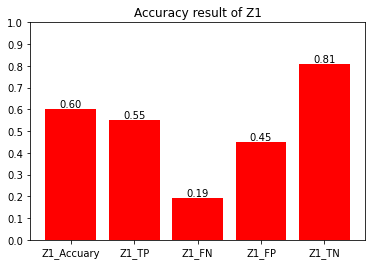

In [54]:
Z1_table = pd.DataFrame({'Accuracy Result of Z1' : \
                         [Z1_auc, Z1_tp, Z1_fn, Z1_fp, Z1_tn]}, \
                        index = ['Z1_Accuary', 'Z1_TP', 'Z1_FN', 'Z1_FP', 'Z1_TN'])

PMT1 = plt.bar(Z1_table.index, Z1_table['Accuracy Result of Z1'], label='a', color='r')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy result of Z1')

for a,b in zip(Z1_table.index,Z1_table['Accuracy Result of Z1']):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10)

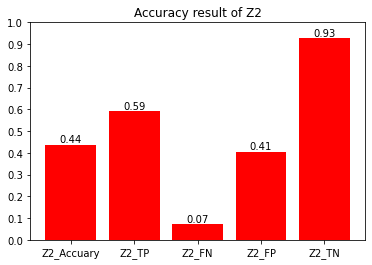

In [55]:
Z2_table = pd.DataFrame({'Accuracy Result of Z2' : \
                         [Z2_auc, Z2_tp, Z2_fn, Z2_fp, Z2_tn]}, \
                        index = ['Z2_Accuary', 'Z2_TP', 'Z2_FN', 'Z2_FP', 'Z2_TN'])

PMT2 = plt.bar(Z2_table.index, Z2_table['Accuracy Result of Z2'], label='a', color='r')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy result of Z2')

for a,b in zip(Z2_table.index,Z2_table['Accuracy Result of Z2']):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10)

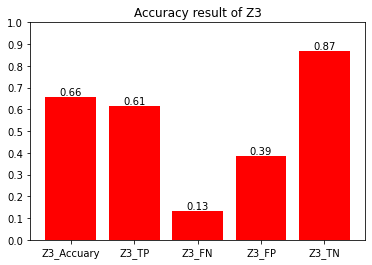

In [56]:
Z3_table = pd.DataFrame({'Accuracy Result of Z3' : \
                         [Z3_auc, Z3_tp, Z3_fn, Z3_fp, Z3_tn]}, \
                        index = ['Z3_Accuary', 'Z3_TP', 'Z3_FN', 'Z3_FP', 'Z3_TN'])

PMT3 = plt.bar(Z3_table.index, Z3_table['Accuracy Result of Z3'], label='a', color='r')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy result of Z3')

for a,b in zip(Z3_table.index,Z3_table['Accuracy Result of Z3']):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10)

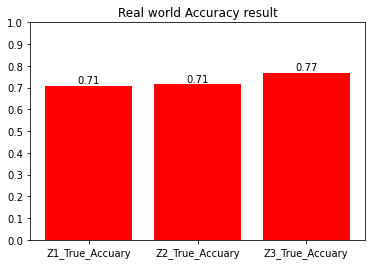

In [57]:
Z_table = pd.DataFrame({'True Accuracy Result' : \
                         [Z1_tauc, Z2_tauc, Z3_tauc]}, \
                        index = ['Z1_True_Accuary', 'Z2_True_Accuary', 'Z3_True_Accuary'])

PMT4 = plt.bar(Z_table.index, Z_table['True Accuracy Result'], label='a', color='r')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Real world Accuracy result')

for a,b in zip(Z_table.index,Z_table['True Accuracy Result']):
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10)

# 3. ML methods

In [58]:
distress = pd.DataFrame(data_all_features['true_distress']).reset_index().iloc[:,1]

In [59]:
data_all_features.head()

,Stkcd,net_profit_2017,net_profit_2018,net_profit_2019,working_capital,total_assets,book_value_of_equity,sales,retained_earnings,EBIT,...,Z2_accuary,Z2_tp,Z2_fn,Z2_fp,Z2_tn,Z3_accuary,Z3_tp,Z3_fn,Z3_fp,Z3_tn
3,CRSP,66858000.0,-164981000.0,-68357000.0,464410000.0,518903000.0,417314000.0,35334000.0,-243979000.0,-113816000.0,...,0,0,0,0,0,1,0,0,0,1
6,DX,-6195557.0,-6271723.0,-6959232.0,200906.0,2713395.0,127354.0,31686.0,-16745999.0,-4292059.0,...,1,1,0,0,0,1,1,0,0,0
9,PRTA,-77677000.0,-155645000.0,-153237000.0,433281000.0,524626000.0,339650000.0,990000.0,-575534000.0,-134205000.0,...,1,1,0,0,0,0,0,0,0,0
11,SNDX,-56047000.0,-73961000.0,-60802000.0,78830000.0,96467000.0,64274000.0,2331000.0,-420586000.0,-55124000.0,...,1,1,0,0,0,1,1,0,0,0
14,KDNY,-82372000.0,-95357000.0,-91863000.0,256878000.0,369024000.0,157695000.0,16085000.0,-378212000.0,-69481000.0,...,1,1,0,0,0,1,1,0,0,0


In [60]:
data_all_features.isna().any()

Stkcd              False
net_profit_2017    False
net_profit_2018    False
net_profit_2019    False
working_capital    False
                   ...  
Z3_accuary         False
Z3_tp              False
Z3_fn              False
Z3_fp              False
Z3_tn              False
Length: 71, dtype: bool

### Data scaling

In [61]:
data_all_features.columns

Index(['Stkcd', 'net_profit_2017', 'net_profit_2018', 'net_profit_2019',
       'working_capital', 'total_assets', 'book_value_of_equity', 'sales',
       'retained_earnings', 'EBIT', 'book_value_of_total_debt',
       'market_value_of_equity', 'EPS', 'net_asset_per_share',
       'net_cash_flow_per_share', 'ROA', 'ROE', 'ROIC',
       'operating_profit / total_operating income',
       'operating_cost / total_operating income',
       'net_profit / total_operating income', 'assets / liabilities',
       'net_assets / liabilities', 'current_assets / total_assets',
       'current_liabilities / total_liabilities', 'current_ratio',
       'operating_profits / current_liabilities',
       'net_cash_flow_from_operation / current_liabilities',
       'net_liability_ratio', 'Long-Term_Debt / Working Capital Ratio',
       'Current_Assets_Turnover', 'Fixed_Assets_Turnover',
       'Total_Assets_Turnover', 'EPS(YOY_growth)',
       'Total_operating_income(YOY_growth)', 'Operating_profit(YOY_gr

In [112]:
data_all_features_scaled = data_all_features.iloc[:,1:].reset_index()

In [113]:
data_all_features_scaled.shape

(1042, 71)

In [114]:
data_all_features_scaled

,index,net_profit_2017,net_profit_2018,net_profit_2019,working_capital,total_assets,book_value_of_equity,sales,retained_earnings,EBIT,...,Z2_accuary,Z2_tp,Z2_fn,Z2_fp,Z2_tn,Z3_accuary,Z3_tp,Z3_fn,Z3_fp,Z3_tn
0,3,66858000.0,-164981000.0,-68357000.0,464410000.0,518903000.0,417314000.0,35334000.0,-2.439790e+08,-113816000.0,...,0,0,0,0,0,1,0,0,0,1
1,6,-6195557.0,-6271723.0,-6959232.0,200906.0,2713395.0,127354.0,31686.0,-1.674600e+07,-4292059.0,...,1,1,0,0,0,1,1,0,0,0
2,9,-77677000.0,-155645000.0,-153237000.0,433281000.0,524626000.0,339650000.0,990000.0,-5.755340e+08,-134205000.0,...,1,1,0,0,0,0,0,0,0,0
3,11,-56047000.0,-73961000.0,-60802000.0,78830000.0,96467000.0,64274000.0,2331000.0,-4.205860e+08,-55124000.0,...,1,1,0,0,0,1,1,0,0,0
4,14,-82372000.0,-95357000.0,-91863000.0,256878000.0,369024000.0,157695000.0,16085000.0,-3.782120e+08,-69481000.0,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,3885,-89860000.0,-54629000.0,-27826000.0,134213000.0,147674000.0,135910000.0,29508000.0,-1.766710e+08,-35130000.0,...,0,0,1,0,0,0,0,1,0,0
1038,3986,-33226000.0,-95304000.0,68271000.0,100857000.0,269006000.0,65742000.0,117101000.0,-2.941300e+08,-27228000.0,...,0,0,0,1,0,0,0,0,1,0
1039,4111,-78254000.0,-44348000.0,-27236000.0,62867000.0,71277000.0,63681000.0,5370000.0,-1.019630e+08,-29450000.0,...,0,0,0,0,0,0,0,1,0,0
1040,4112,-411472000.0,-346028000.0,-314670000.0,610796000.0,929079000.0,760213000.0,74173000.0,-1.012839e+09,-254234000.0,...,1,1,0,0,0,0,0,1,0,0


In [115]:
data_ML_features = data_all_features_scaled[['EPS', 'net_asset_per_share',
       'net_cash_flow_per_share', 'ROA', 'ROE', 'ROIC',
       'operating_profit / total_operating income',
       'operating_cost / total_operating income',
       'net_profit / total_operating income',
       'assets / liabilities',
       'net_assets / liabilities', 'current_assets / total_assets',
       'current_liabilities / total_liabilities', 'current_ratio',
       'operating_profits / current_liabilities',
       'net_cash_flow_from_operation / current_liabilities',
       'net_liability_ratio', 'Long-Term_Debt / Working Capital Ratio',
       'Current_Assets_Turnover', 'Fixed_Assets_Turnover',
       'Total_Assets_Turnover', 'EPS(YOY_growth)',
       'Total_operating_income(YOY_growth)', 
       'Operating_profit(YOY_growth)',
       'Total_profit(YOY_growth)', 'Net_profit / Total_profit',
       'Net_profit / Operating_profit', 'Gross Profit / EBIT',
       'Equity_Multiplier', 'EBIT / Total_operating_income',
       'Total_assets_turnover', 'Z1X1', 'Z1X2', 'Z1X3', 'Z1X4', 'Z1X5', 'Z2X4']].reset_index()

In [116]:
data_ML_features

,index,EPS,net_asset_per_share,net_cash_flow_per_share,ROA,ROE,ROIC,operating_profit / total_operating income,operating_cost / total_operating income,net_profit / total_operating income,...,Gross Profit / EBIT,Equity_Multiplier,EBIT / Total_operating_income,Total_assets_turnover,Z1X1,Z1X2,Z1X3,Z1X4,Z1X5,Z2X4
0,0,-2.51,8.094622,-1.316413,-37.6160,-28.130137,-38.7976,-3779.1625,3879.1625,-3901.3293,...,100.0000,1.3059,-3782.5191,0.0076,0.894984,-0.470182,-0.219340,14.582644,0.068094,4.107866
1,1,-0.35,0.010056,-0.246300,-215.7964,-3394.911035,-147.8925,-14764.0470,15032.0098,-14863.7067,...,100.7338,1.8542,-14755.4284,0.0079,0.074042,-6.171604,-1.581804,7.446069,0.011678,0.049247
2,2,-3.38,8.520281,-0.176200,-35.9395,-39.212130,-35.6661,-17884.3627,17984.3627,-17501.1827,...,100.0000,1.3670,-17635.3482,0.0015,0.825885,-1.097037,-0.255811,2.219727,0.001887,1.836184
3,3,-2.21,2.672364,-2.223907,-65.3930,-85.764073,-65.3930,-4968.6292,5068.6292,-4843.9367,...,100.0000,1.3859,-4843.9367,0.0097,0.817171,-4.359895,-0.571429,3.433044,0.024164,1.996521
4,4,-0.88,1.986837,-0.852540,-35.1653,-43.778814,-34.9406,-595.0036,695.0036,-559.9562,...,100.0000,2.0603,-563.5575,0.0303,0.696101,-1.024898,-0.188283,0.994039,0.043588,0.746206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1037,-0.98,3.653102,-1.369584,-24.5478,-25.847988,-24.5478,-166.5184,266.5184,-157.8593,...,100.0000,1.1884,-157.8593,0.1309,0.908847,-1.196358,-0.237889,13.237363,0.199819,11.553043
1038,1038,-0.84,1.776235,-1.572193,-35.9868,-47.830915,-17.2300,-35.8292,145.0303,-38.1850,...,127.8280,3.4515,-33.0642,0.3153,0.374925,-1.093396,-0.101217,0.473608,0.435310,0.323432
1039,1039,-1.49,2.881726,-1.130996,-51.6585,-46.246133,-51.6585,-775.6687,875.6687,-757.4588,...,100.0000,1.1170,-757.4588,0.0611,0.882010,-1.430518,-0.413177,23.803229,0.075340,8.383491
1040,1040,-4.45,13.069280,-3.958092,-44.7707,-33.442469,-44.7707,-413.4014,513.4014,-394.9327,...,100.0000,1.3590,-394.9327,0.0834,0.657421,-1.090154,-0.273641,15.896996,0.079835,4.501871


In [117]:
data_ML_features.isna().any()

index                                                 False
EPS                                                   False
net_asset_per_share                                   False
net_cash_flow_per_share                               False
ROA                                                   False
ROE                                                   False
ROIC                                                  False
operating_profit / total_operating income             False
operating_cost / total_operating income               False
net_profit / total_operating income                   False
assets / liabilities                                  False
net_assets / liabilities                              False
current_assets / total_assets                         False
current_liabilities / total_liabilities               False
current_ratio                                         False
operating_profits / current_liabilities               False
net_cash_flow_from_operation / current_l

<AxesSubplot:title={'center':'Correlation Matrix'}>

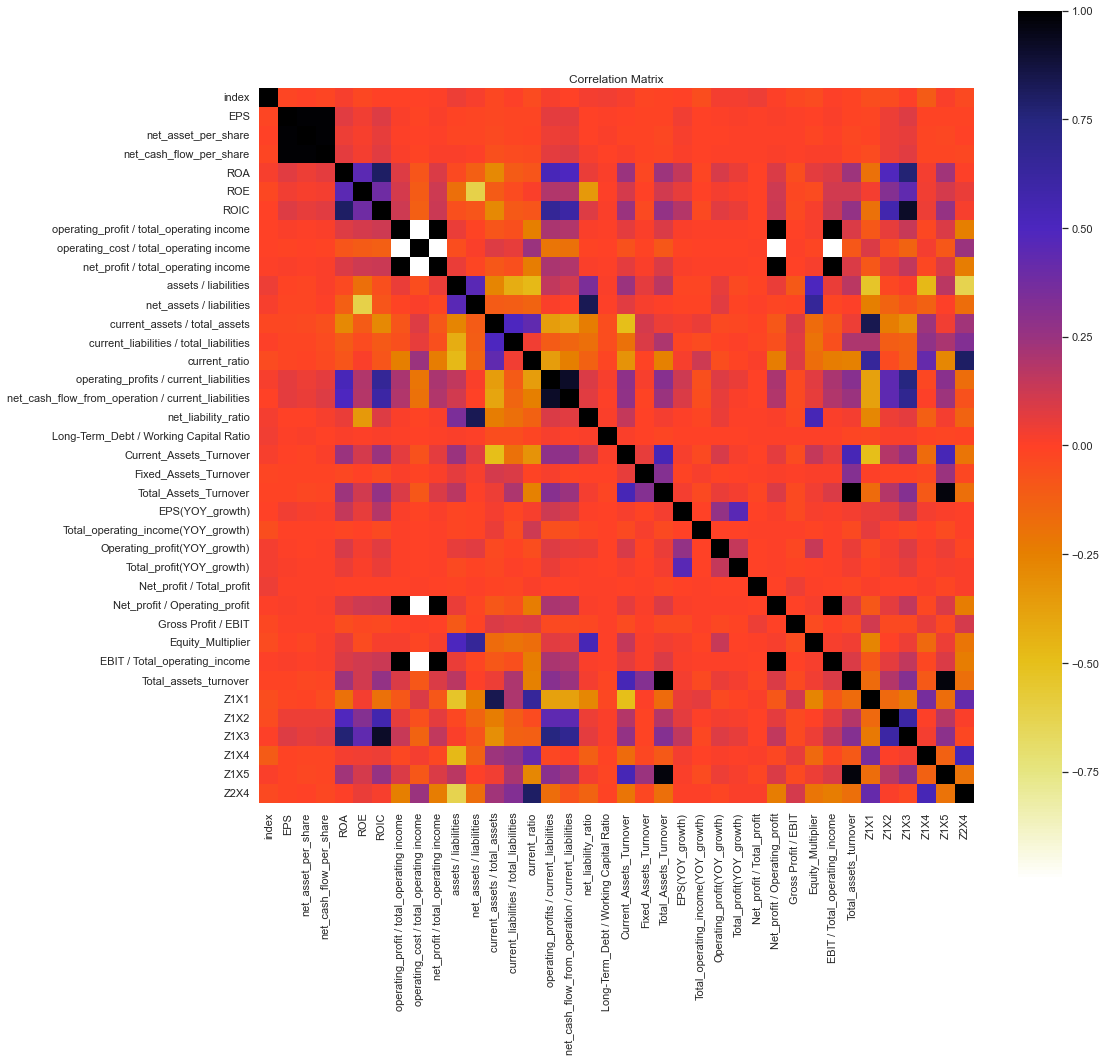

In [118]:
sns.set_theme(style = "white")

correlation = data_ML_features.corr()

plt.figure(figsize = (16, 16)
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            annot = False,
            cmap = 'CMRmap_r')

### Define X datasets and y datasets

In [119]:
# all features
X = data_ML_features
y = data_all_features['true_distress']

# z1-score model features
X1 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z1X4', 'Z1X5', 'Z2X4']]
y1 = data_all_features['true_distress']

# z2-score model features
X2 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z2X4', 'Z1X5']]
y2 = data_all_features['true_distress']

# z3-score model features
X3 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z2X4']]
y3 = data_all_features['true_distress']

# all z-score model features
X4 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z1X4', 'Z1X5', 'Z2X4']]
y4 = data_all_features['true_distress']

## (1) Quadratic Discriminant Analysis

### Function for Quadratic Discriminant Analysis

In [120]:
def QDA_default(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    #train
    QDA_model = QuadraticDiscriminantAnalysis()
    QDA_model.fit(X_train, y_train)
    
    #predict
    y_train_pred = QDA_model.predict(X_train)
    y_test_pred  = QDA_model.predict(X_test)
    
    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3. roc_auc
    preds_QDA_test = QDA_model.predict_proba(X_test)[:,1]
    preds_QDA_train = QDA_model.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_QDA_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_QDA_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 plot roc_auc
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred)) 
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
    print("Parameters:",
          QDA_model.get_params)
    print("----------------------------------------------------------")
    print("Default QDA AUC on Testing Set:",roc_auc_test)
    print("Default QDA AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("Default QDA Accuracy on Testing Set:",Acc_test)
    print("Default QDA Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("Default QDA Confusion Matrix on Testing Set:")
    print(CM_test)
    print("Default QDA Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("Default QDA Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("Default QDA Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)


In [121]:
X.isnull().any()

index                                                 False
EPS                                                   False
net_asset_per_share                                   False
net_cash_flow_per_share                               False
ROA                                                   False
ROE                                                   False
ROIC                                                  False
operating_profit / total_operating income             False
operating_cost / total_operating income               False
net_profit / total_operating income                   False
assets / liabilities                                  False
net_assets / liabilities                              False
current_assets / total_assets                         False
current_liabilities / total_liabilities               False
current_ratio                                         False
operating_profits / current_liabilities               False
net_cash_flow_from_operation / current_l

D:\Ananconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


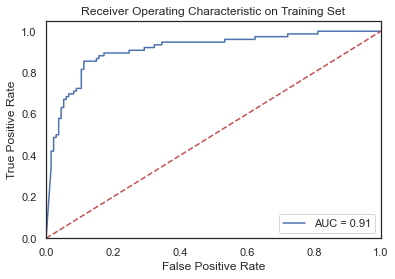

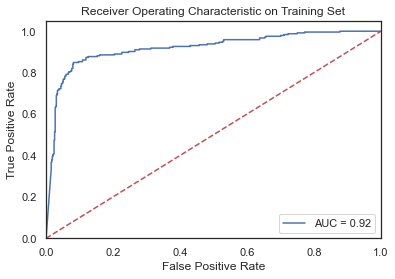

Parameters: <bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis()>
----------------------------------------------------------
Default QDA AUC on Testing Set: 0.9111594776414721
Default QDA AUC on Training Set: 0.9184437040122171
----------------------------------------------------------
Default QDA Accuracy on Testing Set: 0.8181818181818182
Default QDA Accuracy on Training Set: 0.8487394957983193
----------------------------------------------------------
Default QDA Confusion Matrix on Testing Set:
[[128   5]
 [ 33  43]]
Default QDA Confusion Matrix on Training Set:
[[572  16]
 [110 135]]
----------------------------------------------------------
Default QDA Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       133
           1       0.90      0.57      0.69        76

    accuracy                           0.82       209
   macro avg       0.85      0.76      0.78       209
w

In [122]:
QDA_default(X, test_size=0.20, random_state=634)

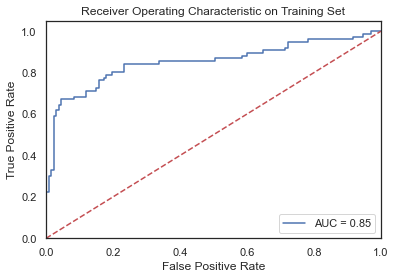

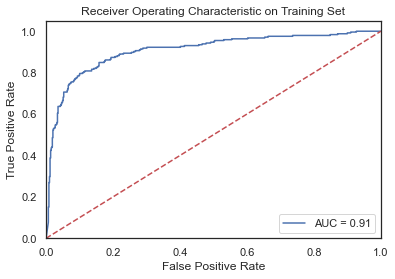

Parameters: <bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis()>
----------------------------------------------------------
Default QDA AUC on Testing Set: 0.850019786307875
Default QDA AUC on Training Set: 0.9073858114674441
----------------------------------------------------------
Default QDA Accuracy on Testing Set: 0.8421052631578947
Default QDA Accuracy on Training Set: 0.8643457382953181
----------------------------------------------------------
Default QDA Confusion Matrix on Testing Set:
[[129   4]
 [ 29  47]]
Default QDA Confusion Matrix on Training Set:
[[567  21]
 [ 92 153]]
----------------------------------------------------------
Default QDA Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       133
           1       0.92      0.62      0.74        76

    accuracy                           0.84       209
   macro avg       0.87      0.79      0.81       209
we

In [123]:
QDA_default(X1, test_size=0.20, random_state=634)

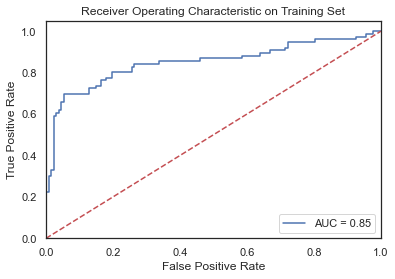

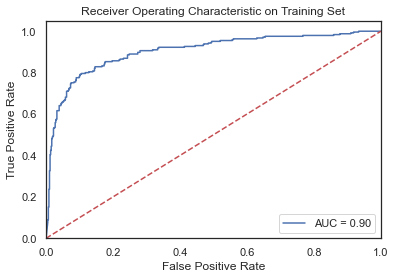

Parameters: <bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis()>
----------------------------------------------------------
Default QDA AUC on Testing Set: 0.8489315393747527
Default QDA AUC on Training Set: 0.9033423573511037
----------------------------------------------------------
Default QDA Accuracy on Testing Set: 0.8373205741626795
Default QDA Accuracy on Training Set: 0.8619447779111644
----------------------------------------------------------
Default QDA Confusion Matrix on Testing Set:
[[128   5]
 [ 29  47]]
Default QDA Confusion Matrix on Training Set:
[[565  23]
 [ 92 153]]
----------------------------------------------------------
Default QDA Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       133
           1       0.90      0.62      0.73        76

    accuracy                           0.84       209
   macro avg       0.86      0.79      0.81       209
w

In [124]:
QDA_default(X2, test_size=0.20, random_state=634)

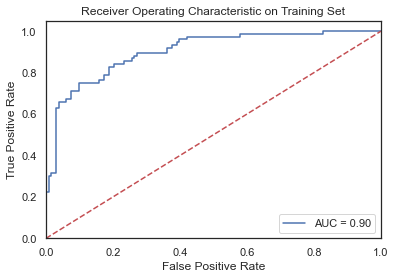

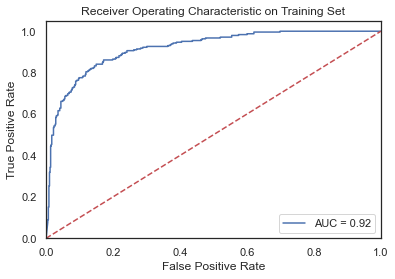

Parameters: <bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis()>
----------------------------------------------------------
Default QDA AUC on Testing Set: 0.9020577760189948
Default QDA AUC on Training Set: 0.9175794807719005
----------------------------------------------------------
Default QDA Accuracy on Testing Set: 0.8373205741626795
Default QDA Accuracy on Training Set: 0.8607442977190877
----------------------------------------------------------
Default QDA Confusion Matrix on Testing Set:
[[129   4]
 [ 30  46]]
Default QDA Confusion Matrix on Training Set:
[[567  21]
 [ 95 150]]
----------------------------------------------------------
Default QDA Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       133
           1       0.92      0.61      0.73        76

    accuracy                           0.84       209
   macro avg       0.87      0.79      0.81       209
w

In [125]:
QDA_default(X3, test_size=0.20, random_state=634)

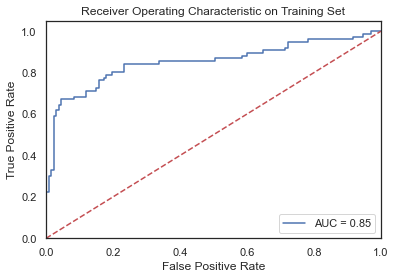

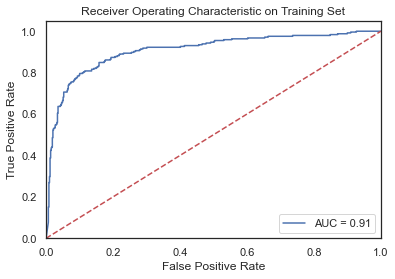

Parameters: <bound method BaseEstimator.get_params of QuadraticDiscriminantAnalysis()>
----------------------------------------------------------
Default QDA AUC on Testing Set: 0.850019786307875
Default QDA AUC on Training Set: 0.9073858114674441
----------------------------------------------------------
Default QDA Accuracy on Testing Set: 0.8421052631578947
Default QDA Accuracy on Training Set: 0.8643457382953181
----------------------------------------------------------
Default QDA Confusion Matrix on Testing Set:
[[129   4]
 [ 29  47]]
Default QDA Confusion Matrix on Training Set:
[[567  21]
 [ 92 153]]
----------------------------------------------------------
Default QDA Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       133
           1       0.92      0.62      0.74        76

    accuracy                           0.84       209
   macro avg       0.87      0.79      0.81       209
we

In [126]:
QDA_default(X4, test_size=0.20, random_state=634)

 ### Function for QDA with Tuning

QDA has essentially only one hyperparameter, which is 'reg_param', for regularization.

In [128]:
def QDA_w_tuning(X,test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    #tuning
    estimator = QuadraticDiscriminantAnalysis()
    parameters = {
        'reg_param': (0.0001, 0.001,0.01, 0.1,0.2,0.3,0.4,0.5),  
        'tol': (0.00001,0.0001, 0.001,0.01
               ), 
                       }
    grid_search_QDA = GridSearchCV(
        estimator=estimator,
        param_grid=parameters,
        scoring = 'roc_auc',
        n_jobs = -1,
        cv = 5
    )
    
    #train
    QDA_model_w_tuning = grid_search_QDA.fit(X_train, y_train)
    
    #predict
    y_train_pred = QDA_model_w_tuning.predict(X_train)
    y_test_pred  = QDA_model_w_tuning.predict(X_test)
    
    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_QDA_test = QDA_model_w_tuning.predict_proba(X_test)[:,1]
    preds_QDA_train = QDA_model_w_tuning.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_QDA_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_QDA_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
    print("Parameter setting that give best result:",
          grid_search_QDA.best_params_ )
    print("----------------------------------------------------------")
    print("QDA with tuning AUC on Testing Set:",roc_auc_test)
    print("QDA with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("QDA with tuning Accuracy on Testing Set:",Acc_test)
    print("QDA with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("QDA with tuning Confusion Matrix on Testing Set:")
    print(CM_test)
    print("QDA with tuning Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("QDA with tuning Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("QDA with tuning Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)



D:\Ananconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


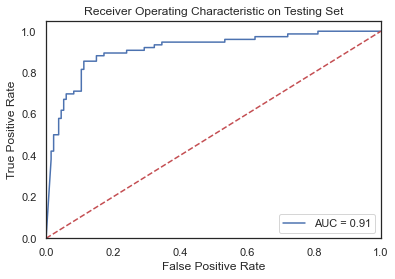

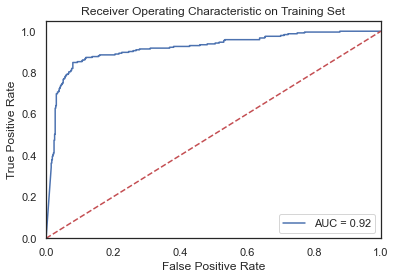

Parameter setting that give best result: {'reg_param': 0.0001, 'tol': 1e-05}
----------------------------------------------------------
QDA with tuning AUC on Testing Set: 0.911555203798971
QDA with tuning AUC on Training Set: 0.9184784117728724
----------------------------------------------------------
QDA with tuning Accuracy on Testing Set: 0.8325358851674641
QDA with tuning Accuracy on Training Set: 0.8643457382953181
----------------------------------------------------------
QDA with tuning Confusion Matrix on Testing Set:
[[126   7]
 [ 28  48]]
QDA with tuning Confusion Matrix on Training Set:
[[572  16]
 [ 97 148]]
----------------------------------------------------------
QDA with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       133
           1       0.87      0.63      0.73        76

    accuracy                           0.83       209
   macro avg       0.85      0.79     

In [129]:
QDA_w_tuning(X,test_size=0.20, random_state=634)

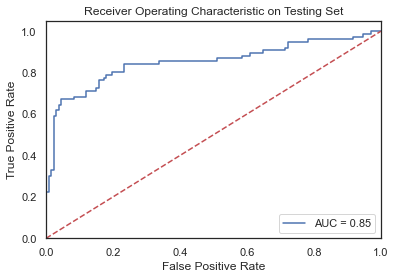

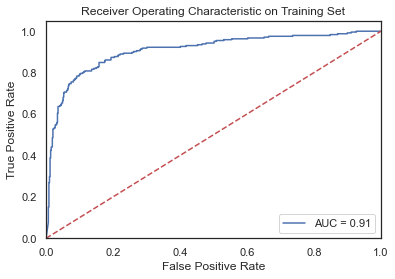

Parameter setting that give best result: {'reg_param': 0.0001, 'tol': 1e-05}
----------------------------------------------------------
QDA with tuning AUC on Testing Set: 0.8498219232291254
QDA with tuning AUC on Training Set: 0.9072816881854783
----------------------------------------------------------
QDA with tuning Accuracy on Testing Set: 0.8421052631578947
QDA with tuning Accuracy on Training Set: 0.8631452581032413
----------------------------------------------------------
QDA with tuning Confusion Matrix on Testing Set:
[[129   4]
 [ 29  47]]
QDA with tuning Confusion Matrix on Training Set:
[[567  21]
 [ 93 152]]
----------------------------------------------------------
QDA with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       133
           1       0.92      0.62      0.74        76

    accuracy                           0.84       209
   macro avg       0.87      0.79    

In [130]:
QDA_w_tuning(X1,test_size=0.20, random_state=634)

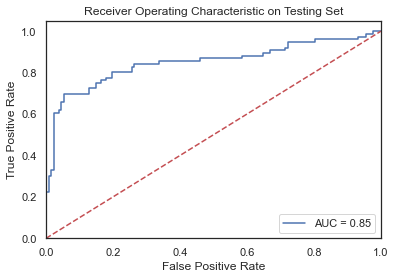

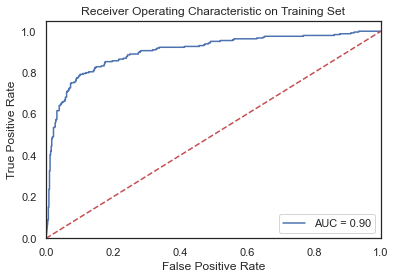

Parameter setting that give best result: {'reg_param': 0.0001, 'tol': 1e-05}
----------------------------------------------------------
QDA with tuning AUC on Testing Set: 0.8490304709141274
QDA with tuning AUC on Training Set: 0.9032798833819242
----------------------------------------------------------
QDA with tuning Accuracy on Testing Set: 0.8325358851674641
QDA with tuning Accuracy on Training Set: 0.8619447779111644
----------------------------------------------------------
QDA with tuning Confusion Matrix on Testing Set:
[[128   5]
 [ 30  46]]
QDA with tuning Confusion Matrix on Training Set:
[[565  23]
 [ 92 153]]
----------------------------------------------------------
QDA with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       133
           1       0.90      0.61      0.72        76

    accuracy                           0.83       209
   macro avg       0.86      0.78    

In [131]:
QDA_w_tuning(X2,test_size=0.20, random_state=634)

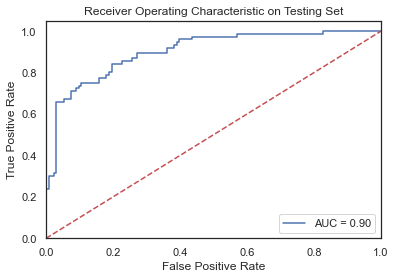

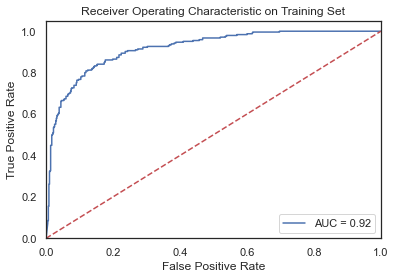

Parameter setting that give best result: {'reg_param': 0.001, 'tol': 1e-05}
----------------------------------------------------------
QDA with tuning AUC on Testing Set: 0.9021567075583697
QDA with tuning AUC on Training Set: 0.9175413022351798
----------------------------------------------------------
QDA with tuning Accuracy on Testing Set: 0.8373205741626795
QDA with tuning Accuracy on Training Set: 0.8547418967587035
----------------------------------------------------------
QDA with tuning Confusion Matrix on Testing Set:
[[129   4]
 [ 30  46]]
QDA with tuning Confusion Matrix on Training Set:
[[569  19]
 [102 143]]
----------------------------------------------------------
QDA with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       133
           1       0.92      0.61      0.73        76

    accuracy                           0.84       209
   macro avg       0.87      0.79     

In [132]:
QDA_w_tuning(X3,test_size=0.20, random_state=634)

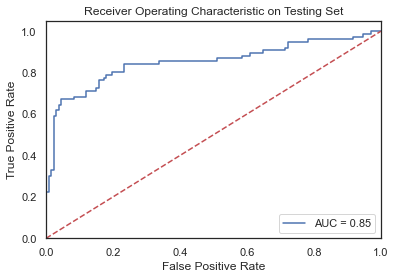

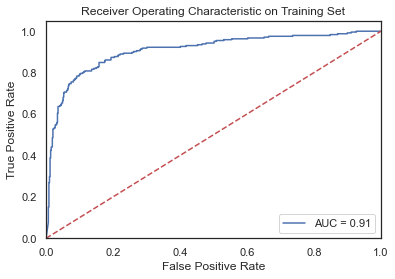

Parameter setting that give best result: {'reg_param': 0.0001, 'tol': 1e-05}
----------------------------------------------------------
QDA with tuning AUC on Testing Set: 0.8498219232291254
QDA with tuning AUC on Training Set: 0.9072816881854783
----------------------------------------------------------
QDA with tuning Accuracy on Testing Set: 0.8421052631578947
QDA with tuning Accuracy on Training Set: 0.8631452581032413
----------------------------------------------------------
QDA with tuning Confusion Matrix on Testing Set:
[[129   4]
 [ 29  47]]
QDA with tuning Confusion Matrix on Training Set:
[[567  21]
 [ 93 152]]
----------------------------------------------------------
QDA with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       133
           1       0.92      0.62      0.74        76

    accuracy                           0.84       209
   macro avg       0.87      0.79    

In [133]:
QDA_w_tuning(X4,test_size=0.20, random_state=634)

## (2) Random Forest

### Function for RF with step by step tuning

In [134]:
def RF_tuned_sbs(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    ##Tuning 
    
    #tune n_estimators
    param_test1 = {'n_estimators':range(10,71,5)}
    gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split = 8,
                                                               min_samples_leaf = 5,
                                                               max_depth = 3,
                                                               max_features = 'sqrt',
                                                               random_state = 10
                                                              ),
                            param_grid = param_test1, 
                            scoring='roc_auc',
                            cv=5)

    gsearch1.fit(X_train, y_train)
    
    n_estimators_value = list(gsearch1.best_params_.values())[0]
    
    #tune max_depth
    param_test2 = {'max_depth':range(2,16,1), 
                   'min_samples_split':range(2,16,2)
                  }

    gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= n_estimators_value,
                                                               min_samples_leaf=5,
                                                               max_features='sqrt' ,
                                                               random_state=10
                                                              ),
                            param_grid = param_test2, 
                            scoring='roc_auc',
                            cv=5)

    gsearch2.fit(X_train, y_train)
    
    max_depth_value = list(gsearch2.best_params_.values())[0]
    
    # tune min_samples_split and min_samples_leaf
    param_test3 = {'min_samples_split':range(2,18,2), 
                   'min_samples_leaf':range(2,10,2)
                  }

    gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= n_estimators_value, 
                                                               max_depth=max_depth_value,
                                                               max_features='sqrt' ,
                                                               random_state=10),
                            param_grid = param_test3, 
                            scoring='roc_auc',
                            cv=5)

    gsearch3.fit(X_train, y_train)
    
    min_samples_leaf_value = list(gsearch3.best_params_.values())[0]
    min_samples_split_value = list(gsearch3.best_params_.values())[1]
    
    #tune max_features
    param_test4 = {'max_features': [None,0.1,0.3,0.5,0.7,0.9,"sqrt"] }
    gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= n_estimators_value, 
                                                               max_depth=max_depth_value,
                                                               min_samples_leaf = min_samples_leaf_value,
                                                               min_samples_split = min_samples_split_value,
                                                               random_state=10
                                                              ),
                            param_grid = param_test4, 
                            scoring='roc_auc',
                            cv=5)

    gsearch4.fit(X_train, y_train)
    max_features_value = list(gsearch4.best_params_.values())[0]
    
    #final RF model
    RF_model_w_tuning = RandomForestClassifier(n_estimators= n_estimators_value,
                             max_depth=max_depth_value,
                             min_samples_leaf = min_samples_leaf_value,
                             min_samples_split = min_samples_split_value,
                             max_features = max_features_value,
                             random_state=10)

    
    #train
    RF_model_w_tuning.fit(X_train, y_train)

    #predict
    y_train_pred = RF_model_w_tuning.predict(X_train)
    y_test_pred  = RF_model_w_tuning.predict(X_test)

    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_RF_test = RF_model_w_tuning.predict_proba(X_test)[:,1]
    preds_RF_train = RF_model_w_tuning.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_RF_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_RF_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
    # feature importance 2
    importances = RF_model_w_tuning.feature_importances_
    sorted_idx = np.argsort(importances)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 30))
    plt.barh(pos, importances[sorted_idx], align='center')
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.xlabel("Mean decrease in impurity",fontsize = 25)
    plt.title("RF Feature importances using MDI",fontsize = 25)
    plt.show()
    
    print("Parameter setting that give best result:",
          RF_model_w_tuning.get_params)
    print("----------------------------------------------------------")
    print("RF with tuning AUC on Testing Set:",roc_auc_test)
    print("RF with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("RF with tuning Accuracy on Testing Set:",Acc_test)
    print("RF with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("RF with tuning Confusion Matrix on Testing Set:")
    print(CM_test)
    print("RF with tuning Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("RF with tuning Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("RF with tuning Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)


    

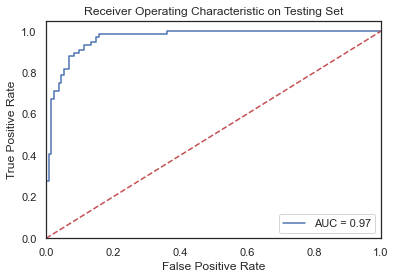

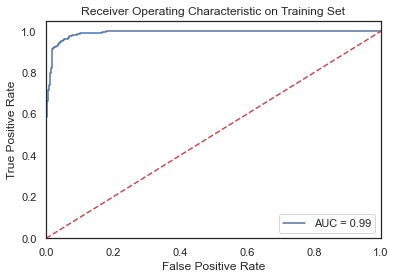

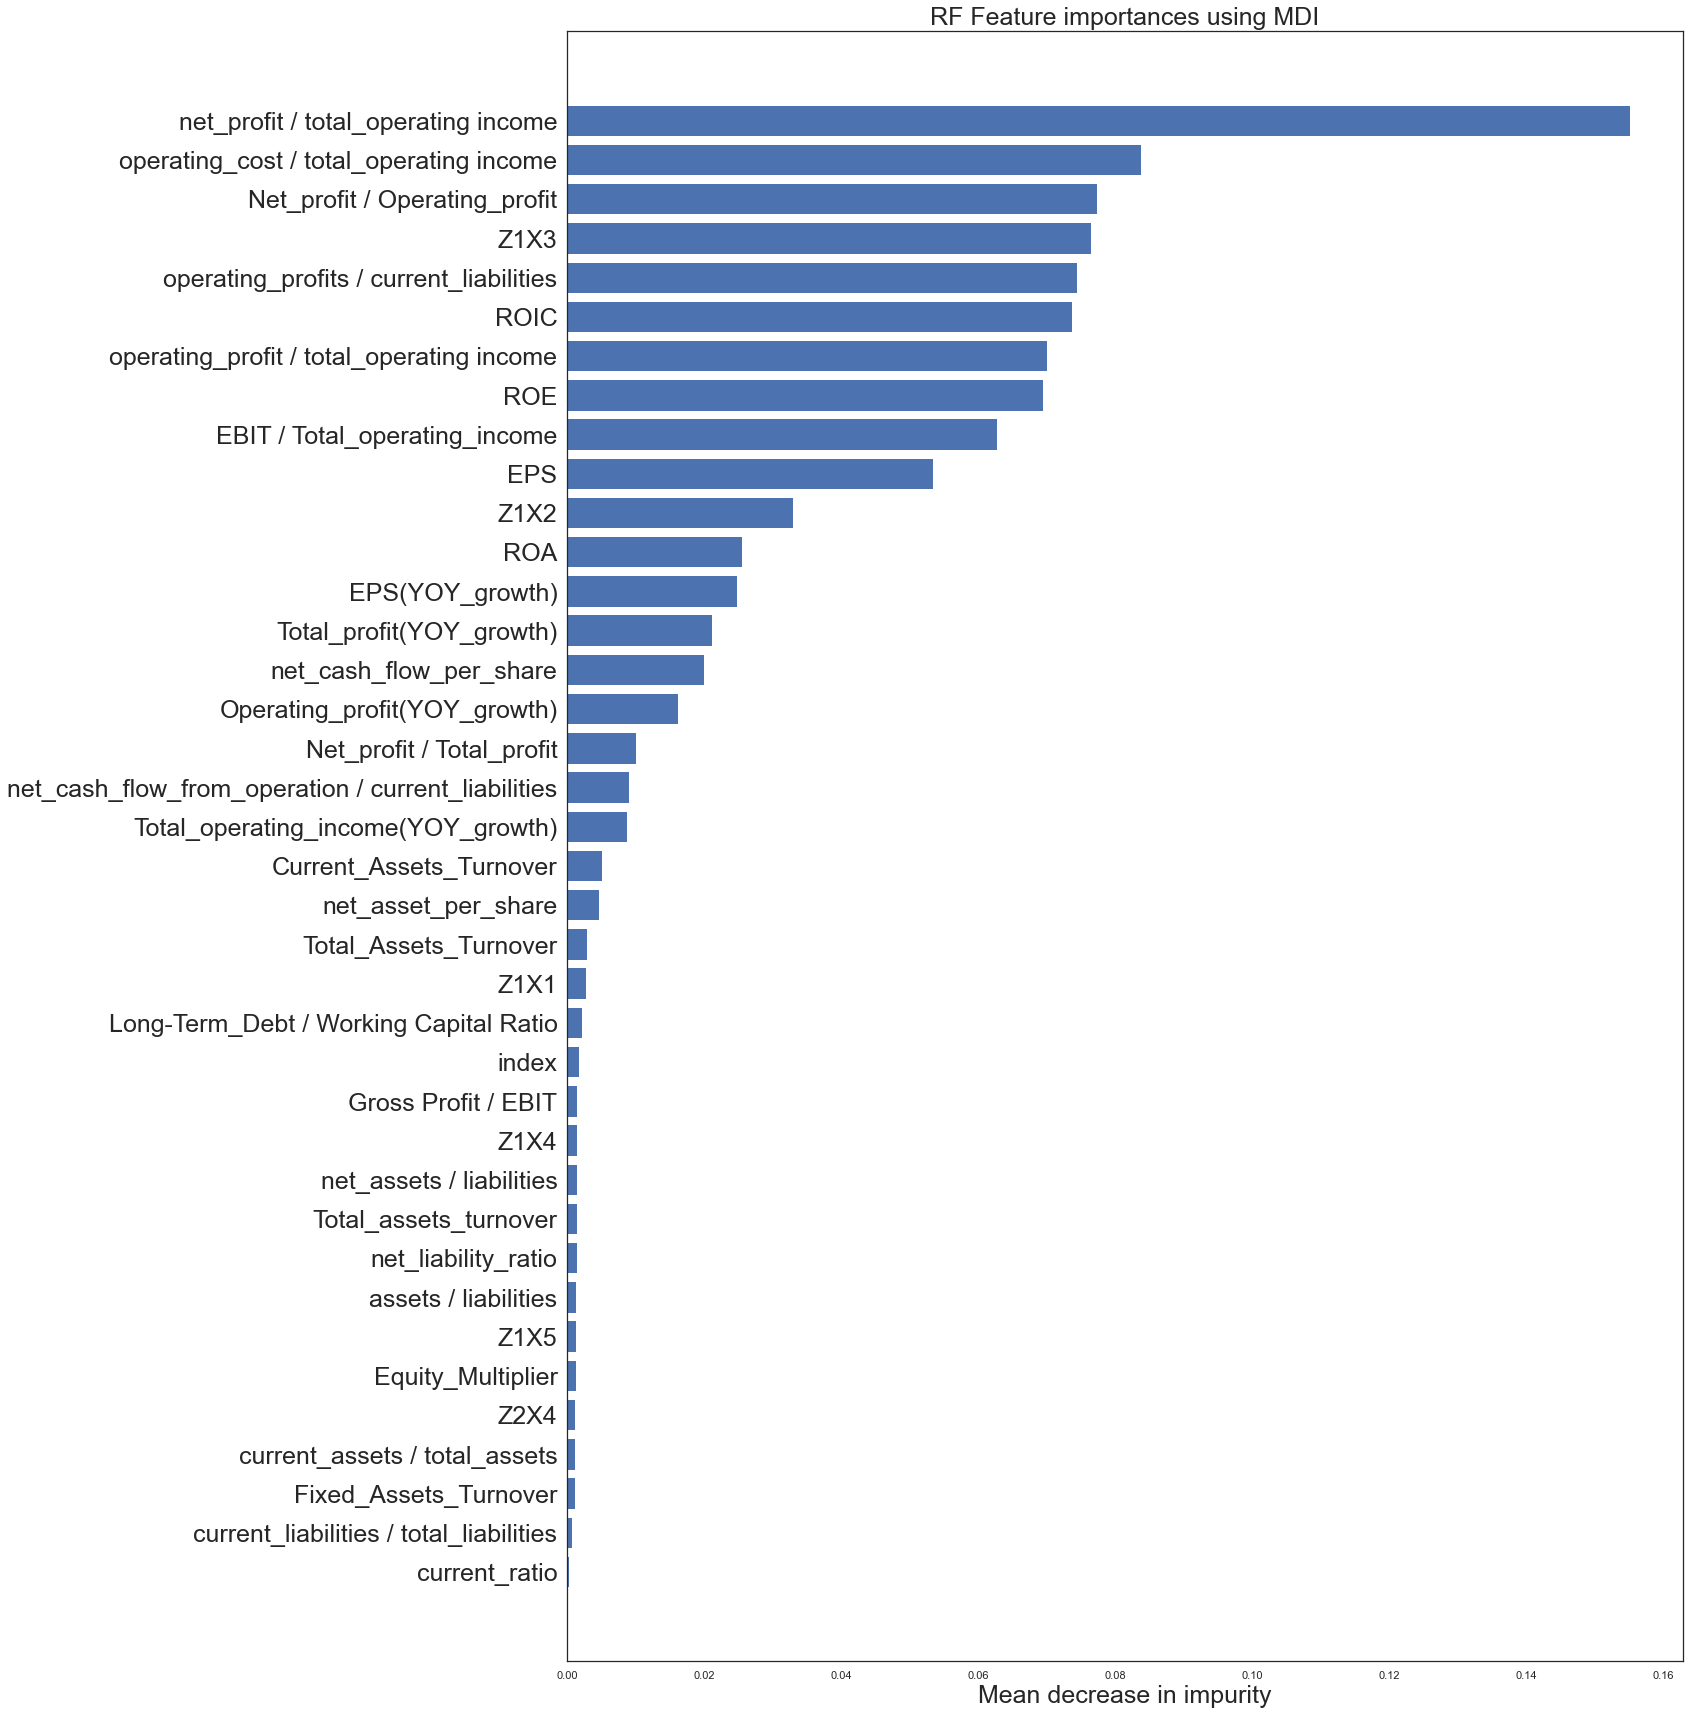

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=16,
                       n_estimators=70, random_state=10)>
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.967154728927582
RF with tuning AUC on Training Set: 0.9910106899902819
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.9090909090909091
RF with tuning Accuracy on Training Set: 0.9543817527010804
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[123  10]
 [  9  67]]
RF with tuning Confusion Matrix on Training Set:
[[565  23]
 [ 15 230]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       133
           1

In [135]:
RF_tuned_sbs(X, 0.2, 634)

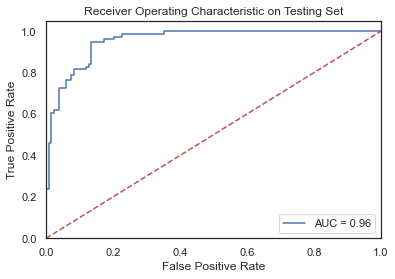

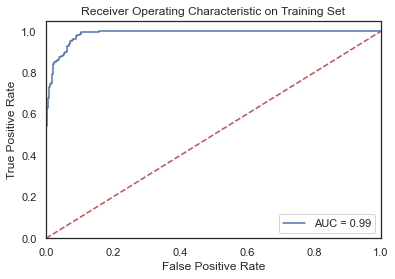

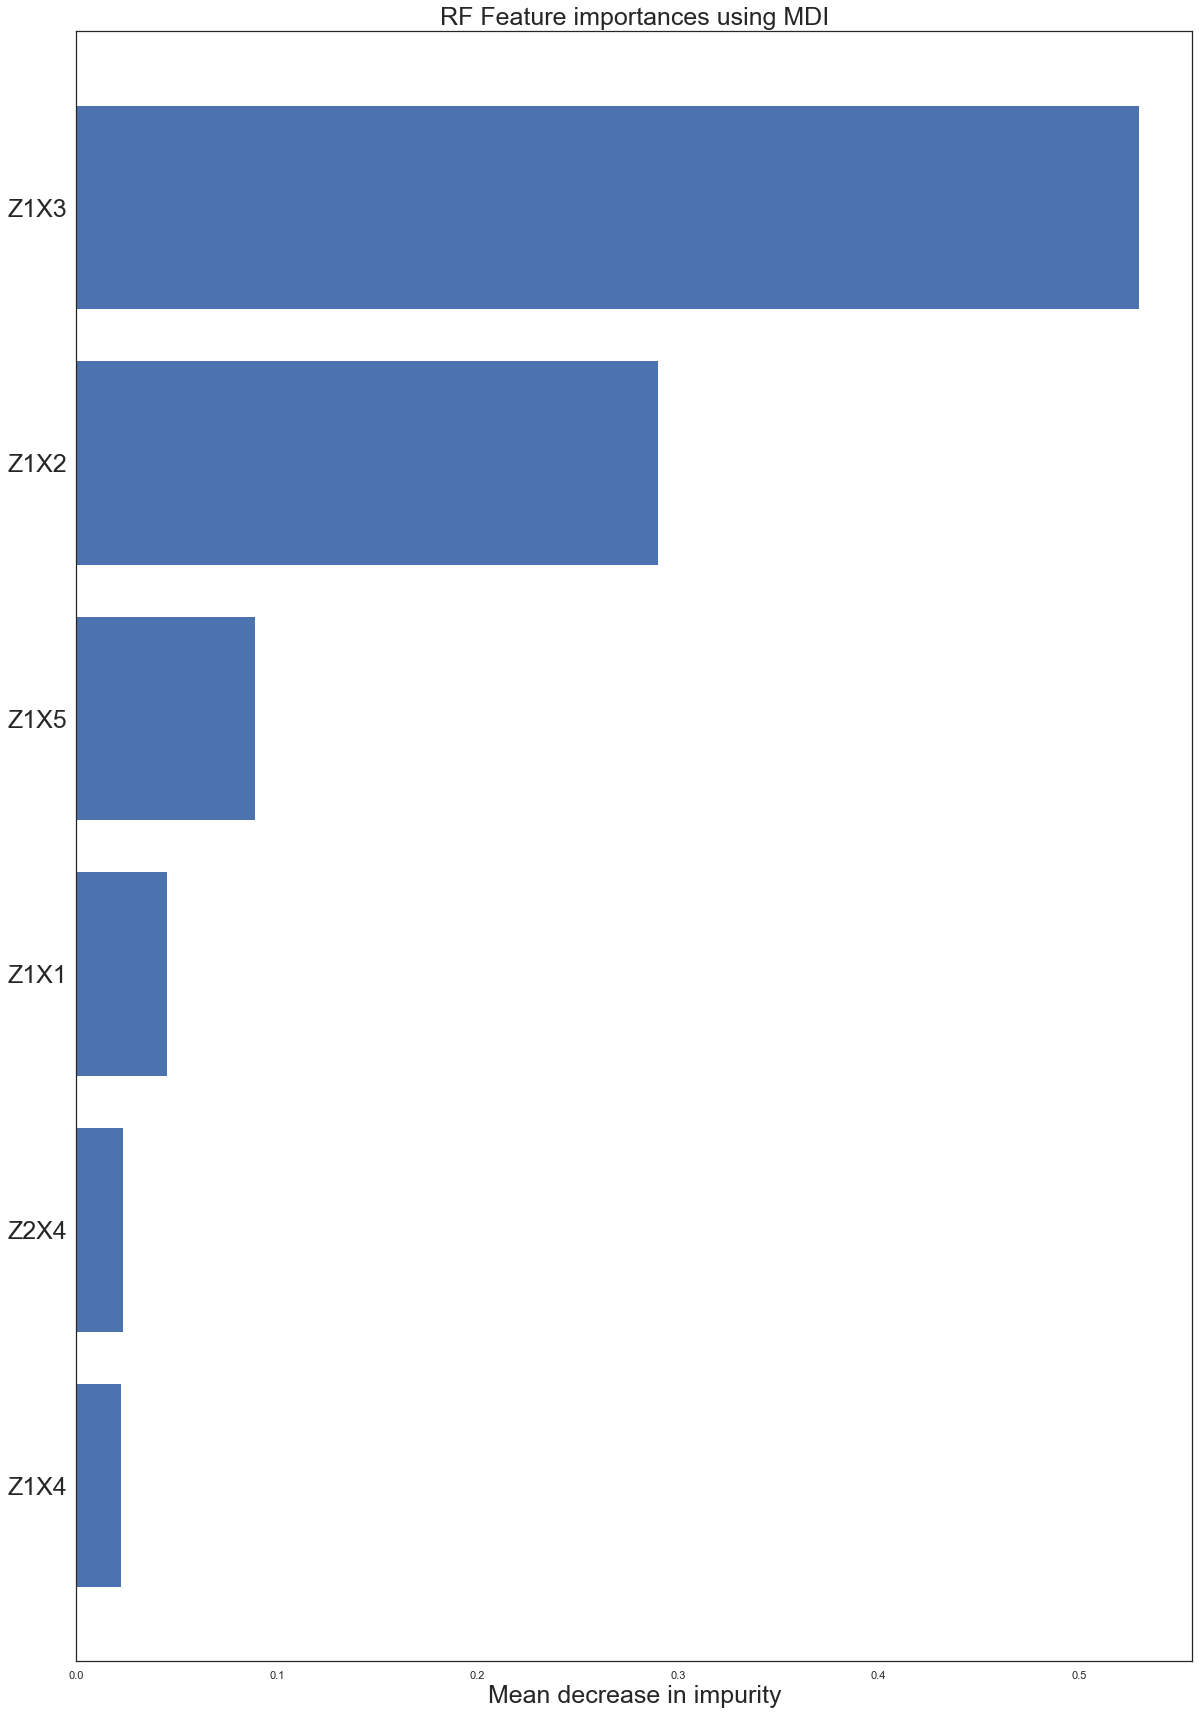

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=6, min_samples_leaf=6, n_estimators=70,
                       random_state=10)>
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9552829442026117
RF with tuning AUC on Training Set: 0.9866444536998473
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8755980861244019
RF with tuning Accuracy on Training Set: 0.929171668667467
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[121  12]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[555  33]
 [ 26 219]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       133
           1       0.84      0.82 

In [136]:
RF_tuned_sbs(X1, 0.2, 634)

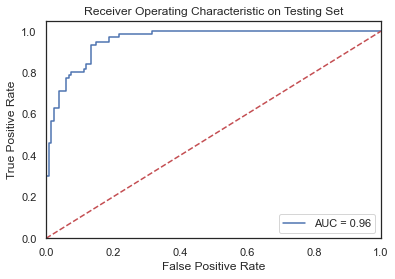

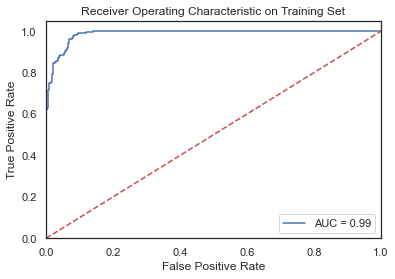

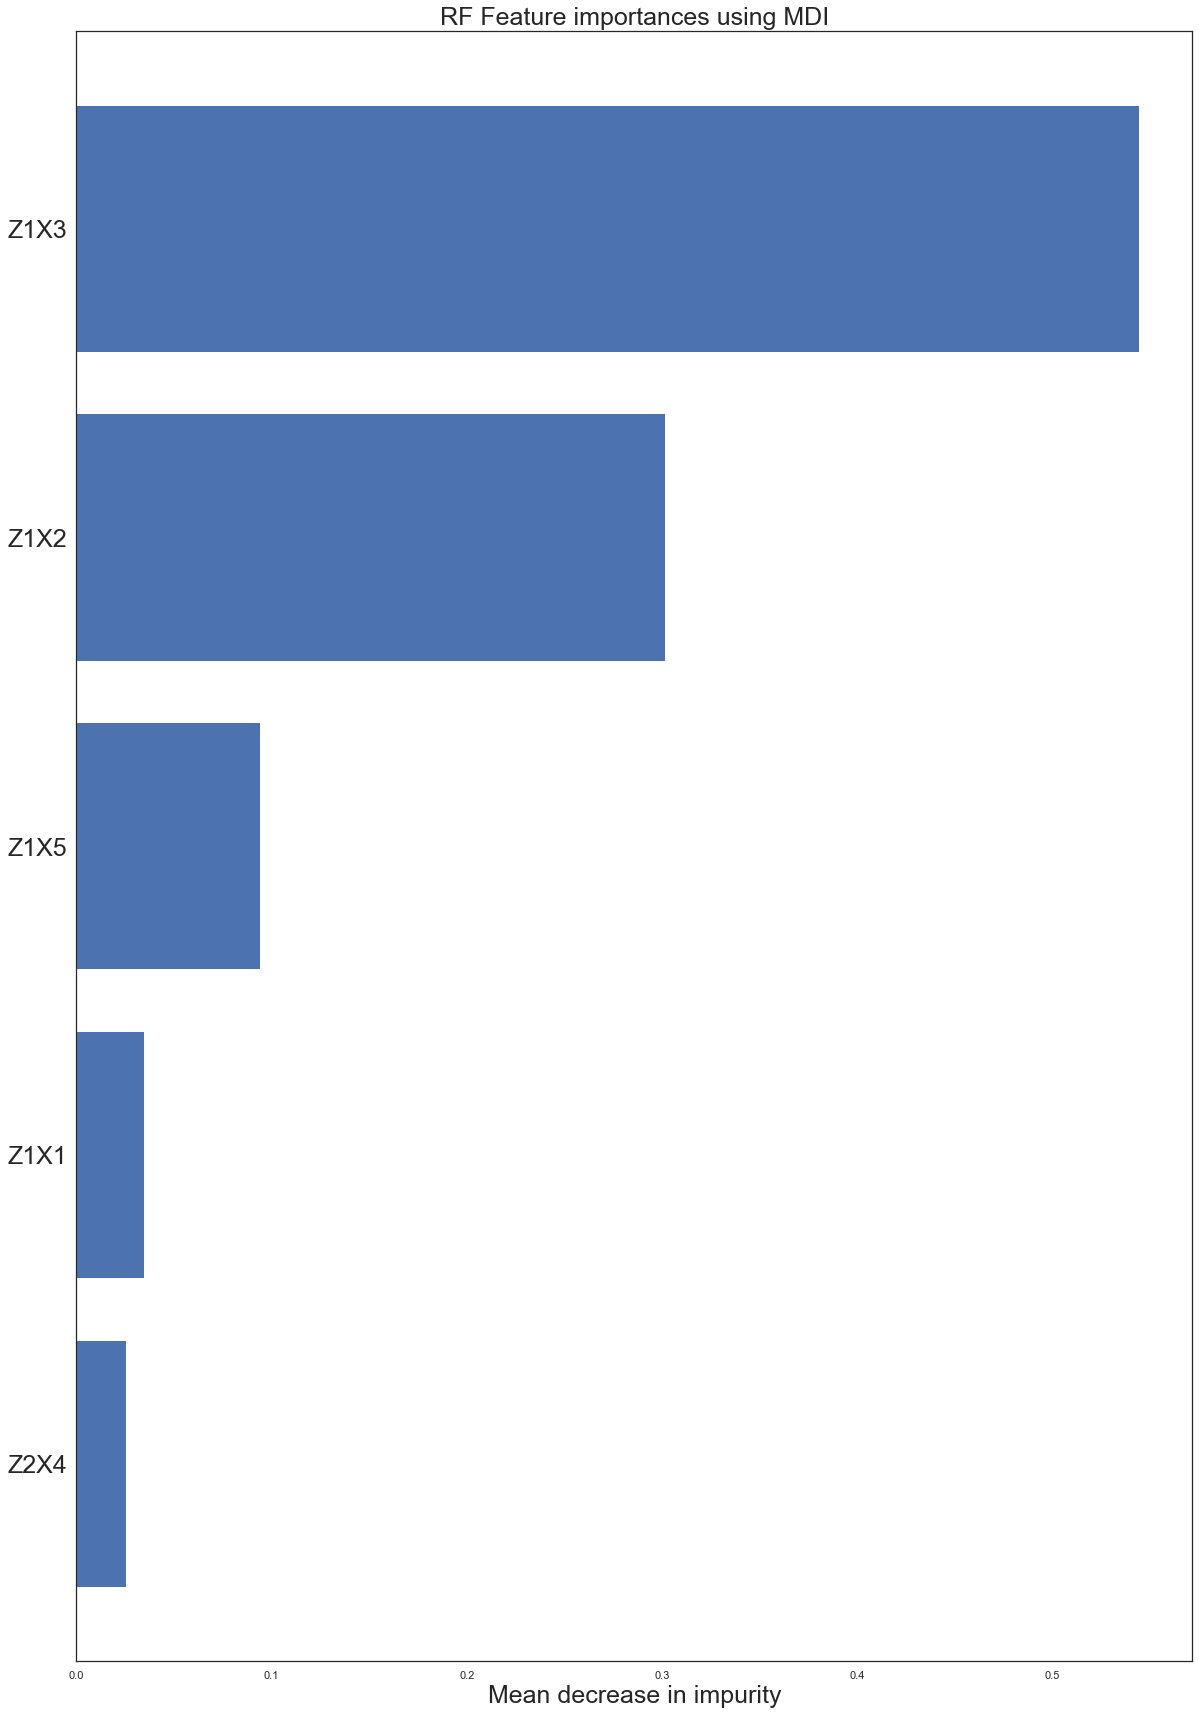

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_leaf=6,
                       n_estimators=55, random_state=10)>
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9558765334388603
RF with tuning AUC on Training Set: 0.9876509787588506
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.861244019138756
RF with tuning Accuracy on Training Set: 0.9303721488595438
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[118  15]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[556  32]
 [ 26 219]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       133
           1    

In [137]:
RF_tuned_sbs(X2, 0.2, 634)

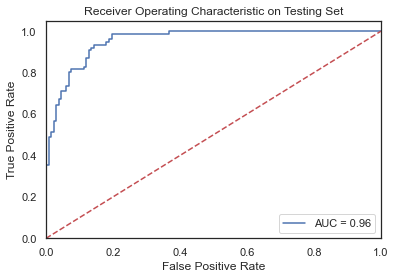

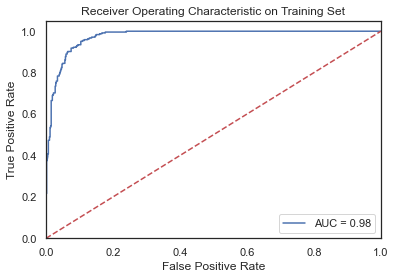

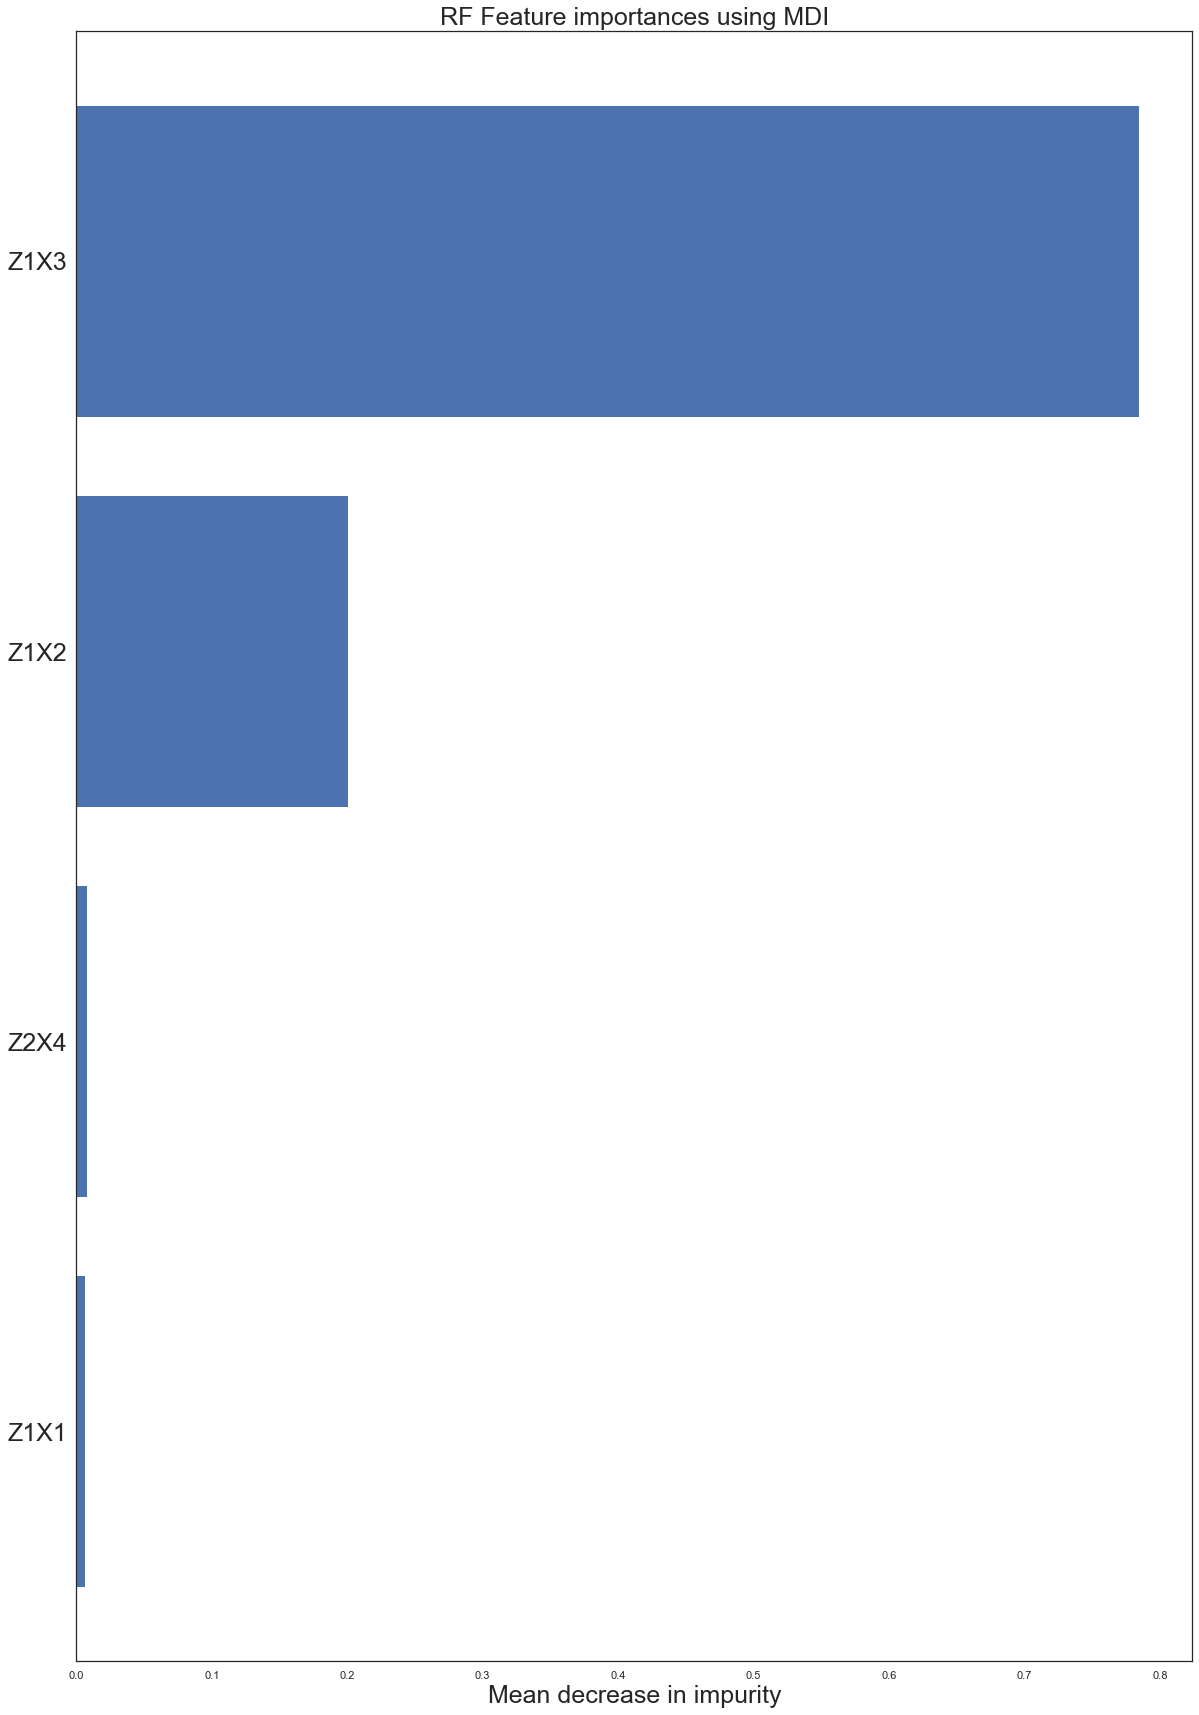

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=3, max_features=0.9, min_samples_leaf=6,
                       min_samples_split=16, n_estimators=70, random_state=10)>
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9554808072813613
RF with tuning AUC on Training Set: 0.9754824378731084
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8660287081339713
RF with tuning Accuracy on Training Set: 0.9243697478991597
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[118  15]
 [ 13  63]]
RF with tuning Confusion Matrix on Training Set:
[[553  35]
 [ 28 217]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89    

In [138]:
RF_tuned_sbs(X3, 0.2, 634)

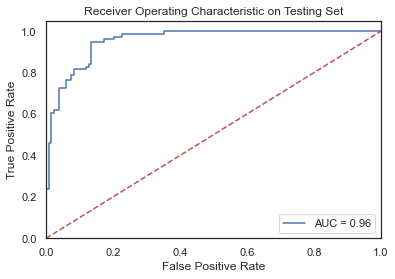

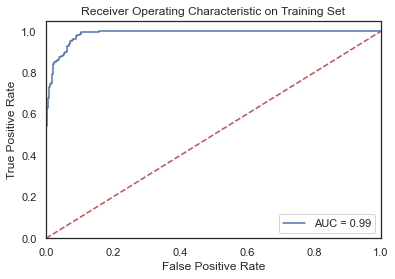

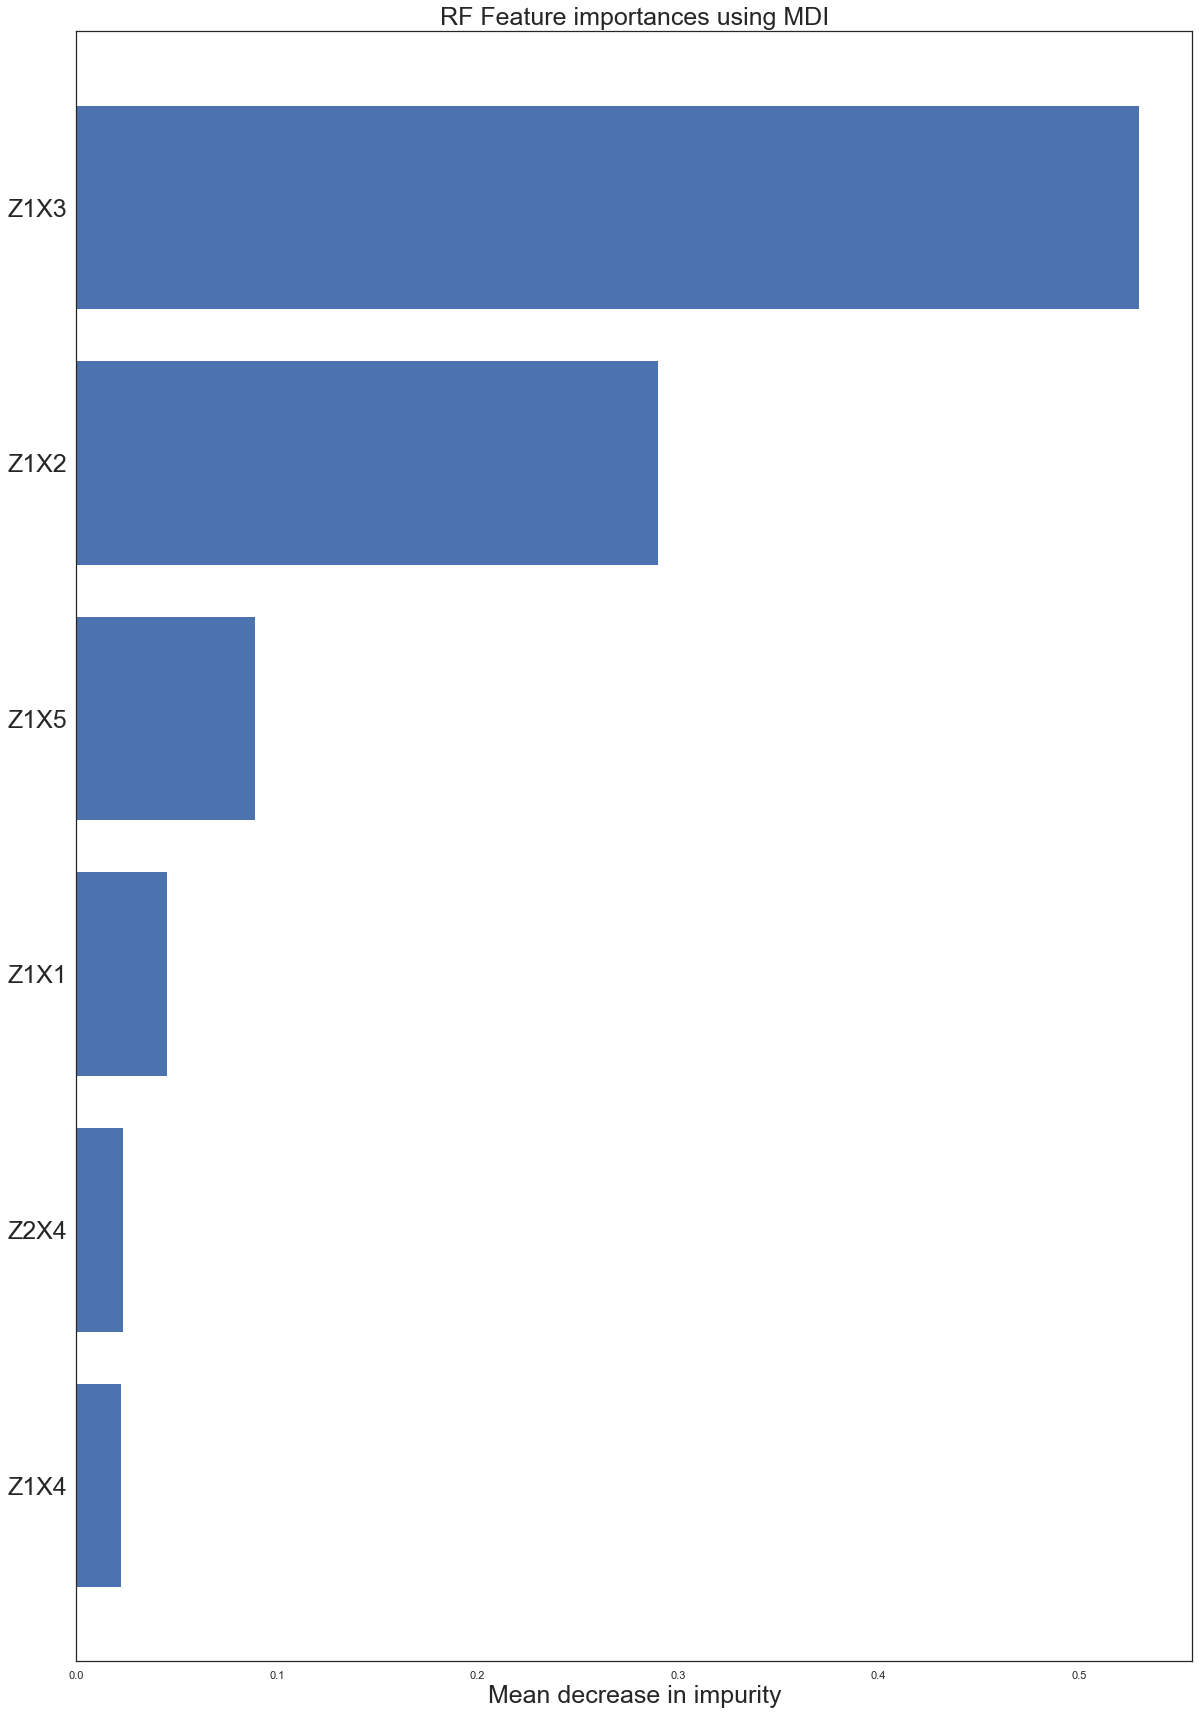

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=6, min_samples_leaf=6, n_estimators=70,
                       random_state=10)>
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9552829442026117
RF with tuning AUC on Training Set: 0.9866444536998473
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8755980861244019
RF with tuning Accuracy on Training Set: 0.929171668667467
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[121  12]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[555  33]
 [ 26 219]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       133
           1       0.84      0.82 

In [139]:
RF_tuned_sbs(X4, 0.2, 634)

### Function for RF with altogether tuning

In [140]:
def RF_tuned_tgt(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    #tuning
    estimator = RandomForestClassifier(random_state=10)
    parameters = {
        "n_estimators": [50,100,400,600],
        "max_depth": [3,5,15,40],
        "min_samples_leaf": [2,6,10],
        "min_samples_split": [5,10,15],
        "max_features": ["sqrt", "log2"]
    }

    grid_search = GridSearchCV(
        estimator = estimator,
        param_grid = parameters,
        scoring = "roc_auc",
        cv = 5
    )
    

    
    #train
    RF_model_w_tuning = grid_search.fit(X_train, y_train)
    RF_model_w_tuning.fit(X_train,y_train)
    
    #predict
    y_train_pred = RF_model_w_tuning.predict(X_train)
    y_test_pred  = RF_model_w_tuning.predict(X_test)


    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_RF_test = RF_model_w_tuning.predict_proba(X_test)[:,1]
    preds_RF_train = RF_model_w_tuning.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_RF_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_RF_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
#     # feature importance 2
#     importances = RF_model_w_tuning.feature_importances_
#     sorted_idx = np.argsort(importances)
#     pos = np.arange(sorted_idx.shape[0]) + .5
#     plt.figure(figsize=(20, 30))
#     plt.barh(pos, importances[sorted_idx], align='center')
#     plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
#     plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
#     plt.xlabel("Mean decrease in impurity",fontsize = 25)
#     plt.title("RF Feature importances using MDI",fontsize = 25)
#     plt.show()
    
    print("Parameter setting that give best result:",
          RF_model_w_tuning.best_params_)
    print("----------------------------------------------------------")
    print("RF with tuning AUC on Testing Set:",roc_auc_test)
    print("RF with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("RF with tuning Accuracy on Testing Set:",Acc_test)
    print("RF with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("RF with tuning Confusion Matrix on Testing Set:")
    print(CM_test)
    print("RF with tuning Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("RF with tuning Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("RF with tuning Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)


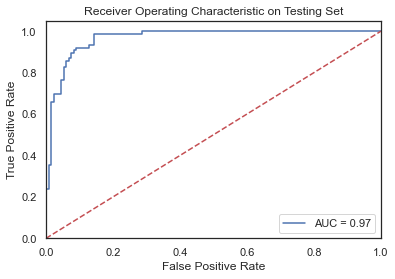

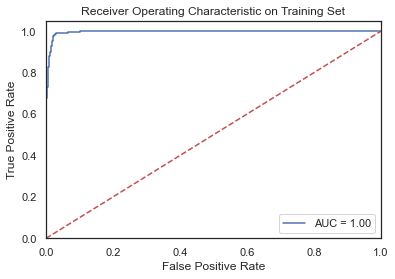

Parameter setting that give best result: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9675504550850811
RF with tuning AUC on Training Set: 0.9961821463279189
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.9090909090909091
RF with tuning Accuracy on Training Set: 0.9735894357743097
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[123  10]
 [  9  67]]
RF with tuning Confusion Matrix on Training Set:
[[576  12]
 [ 10 235]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       133
           1       0.87      0.88      0.88        76

    accuracy             

In [141]:
RF_tuned_tgt(X, 0.2, 634)

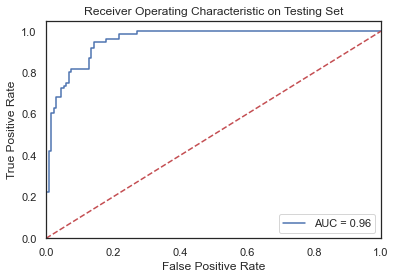

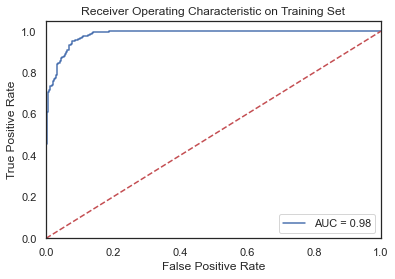

Parameter setting that give best result: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 600}
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9564701226751089
RF with tuning AUC on Training Set: 0.9833610995418575
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8708133971291866
RF with tuning Accuracy on Training Set: 0.9255702280912365
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[120  13]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[556  32]
 [ 30 215]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       133
           1       0.83      0.82      0.82        76

    accuracy           

In [142]:
RF_tuned_tgt(X1, 0.2, 634)

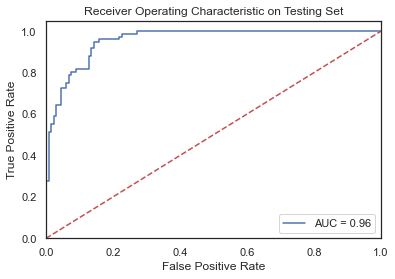

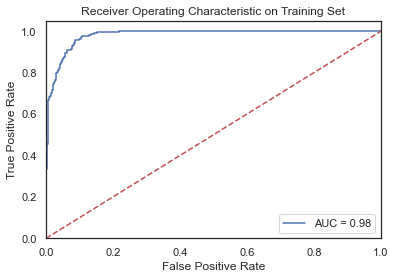

Parameter setting that give best result: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 600}
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9561733280569846
RF with tuning AUC on Training Set: 0.9808760238789394
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8660287081339713
RF with tuning Accuracy on Training Set: 0.9243697478991597
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[119  14]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[555  33]
 [ 30 215]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       133
           1       0.82      0.82      0.82        76

    accuracy            

In [143]:
RF_tuned_tgt(X2, 0.2, 634)

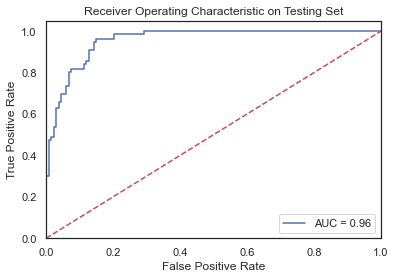

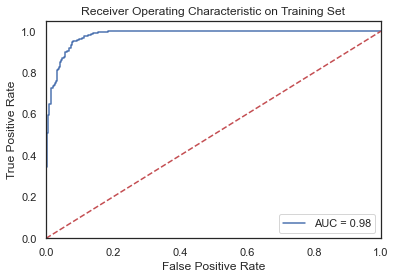

Parameter setting that give best result: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 400}
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9558765334388604
RF with tuning AUC on Training Set: 0.9809315562959877
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8660287081339713
RF with tuning Accuracy on Training Set: 0.9255702280912365
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[119  14]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[554  34]
 [ 28 217]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       133
           1       0.82      0.82      0.82        76

    accuracy            

In [144]:
RF_tuned_tgt(X3, 0.2, 634)

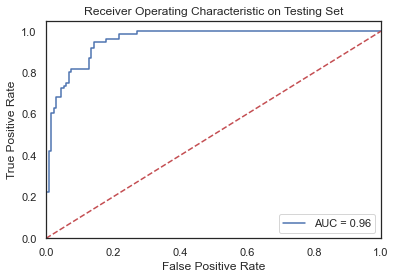

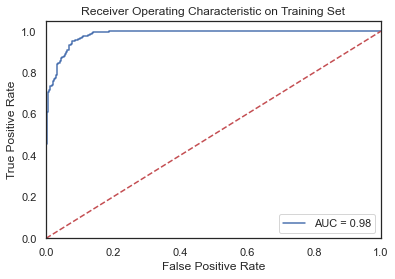

Parameter setting that give best result: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 600}
----------------------------------------------------------
RF with tuning AUC on Testing Set: 0.9564701226751089
RF with tuning AUC on Training Set: 0.9833610995418575
----------------------------------------------------------
RF with tuning Accuracy on Testing Set: 0.8708133971291866
RF with tuning Accuracy on Training Set: 0.9255702280912365
----------------------------------------------------------
RF with tuning Confusion Matrix on Testing Set:
[[120  13]
 [ 14  62]]
RF with tuning Confusion Matrix on Training Set:
[[556  32]
 [ 30 215]]
----------------------------------------------------------
RF with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       133
           1       0.83      0.82      0.82        76

    accuracy           

In [145]:
RF_tuned_tgt(X4, 0.2, 634)

### Function for RF without tuning

In [146]:
def RF_for_Features(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]

    #train
    RF_model = RandomForestClassifier(random_state=10)
    RF_model.fit(X_train,y_train)
    
    #predict
    y_train_pred = RF_model.predict(X_train)
    y_test_pred  = RF_model.predict(X_test)

    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_RF_test = RF_model.predict_proba(X_test)[:,1]
    preds_RF_train = RF_model.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_RF_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_RF_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
    # feature importance 2
    importances = RF_model.feature_importances_
    sorted_idx = np.argsort(importances)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 30))
    plt.barh(pos, importances[sorted_idx], align='center')
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.xlabel("Mean decrease in impurity",fontsize = 25)
    plt.title("RF Feature importances using MDI",fontsize = 25)
    plt.show()
    
    print("Parameter setting that give best result:",
          RF_model.get_params)
    print("----------------------------------------------------------")
    print("Default RF AUC on Testing Set:",roc_auc_test)
    print("RF with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("Default RF Accuracy on Testing Set:",Acc_test)
    print("RF with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("Default RF Confusion Matrix on Testing Set:")
    print(CM_test)
    print("Default RF Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("Default RF Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("Default RF Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)
    

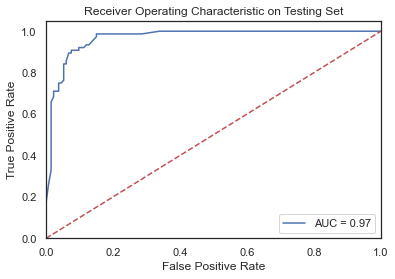

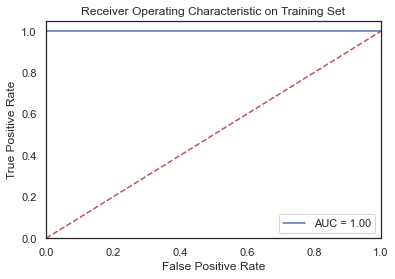

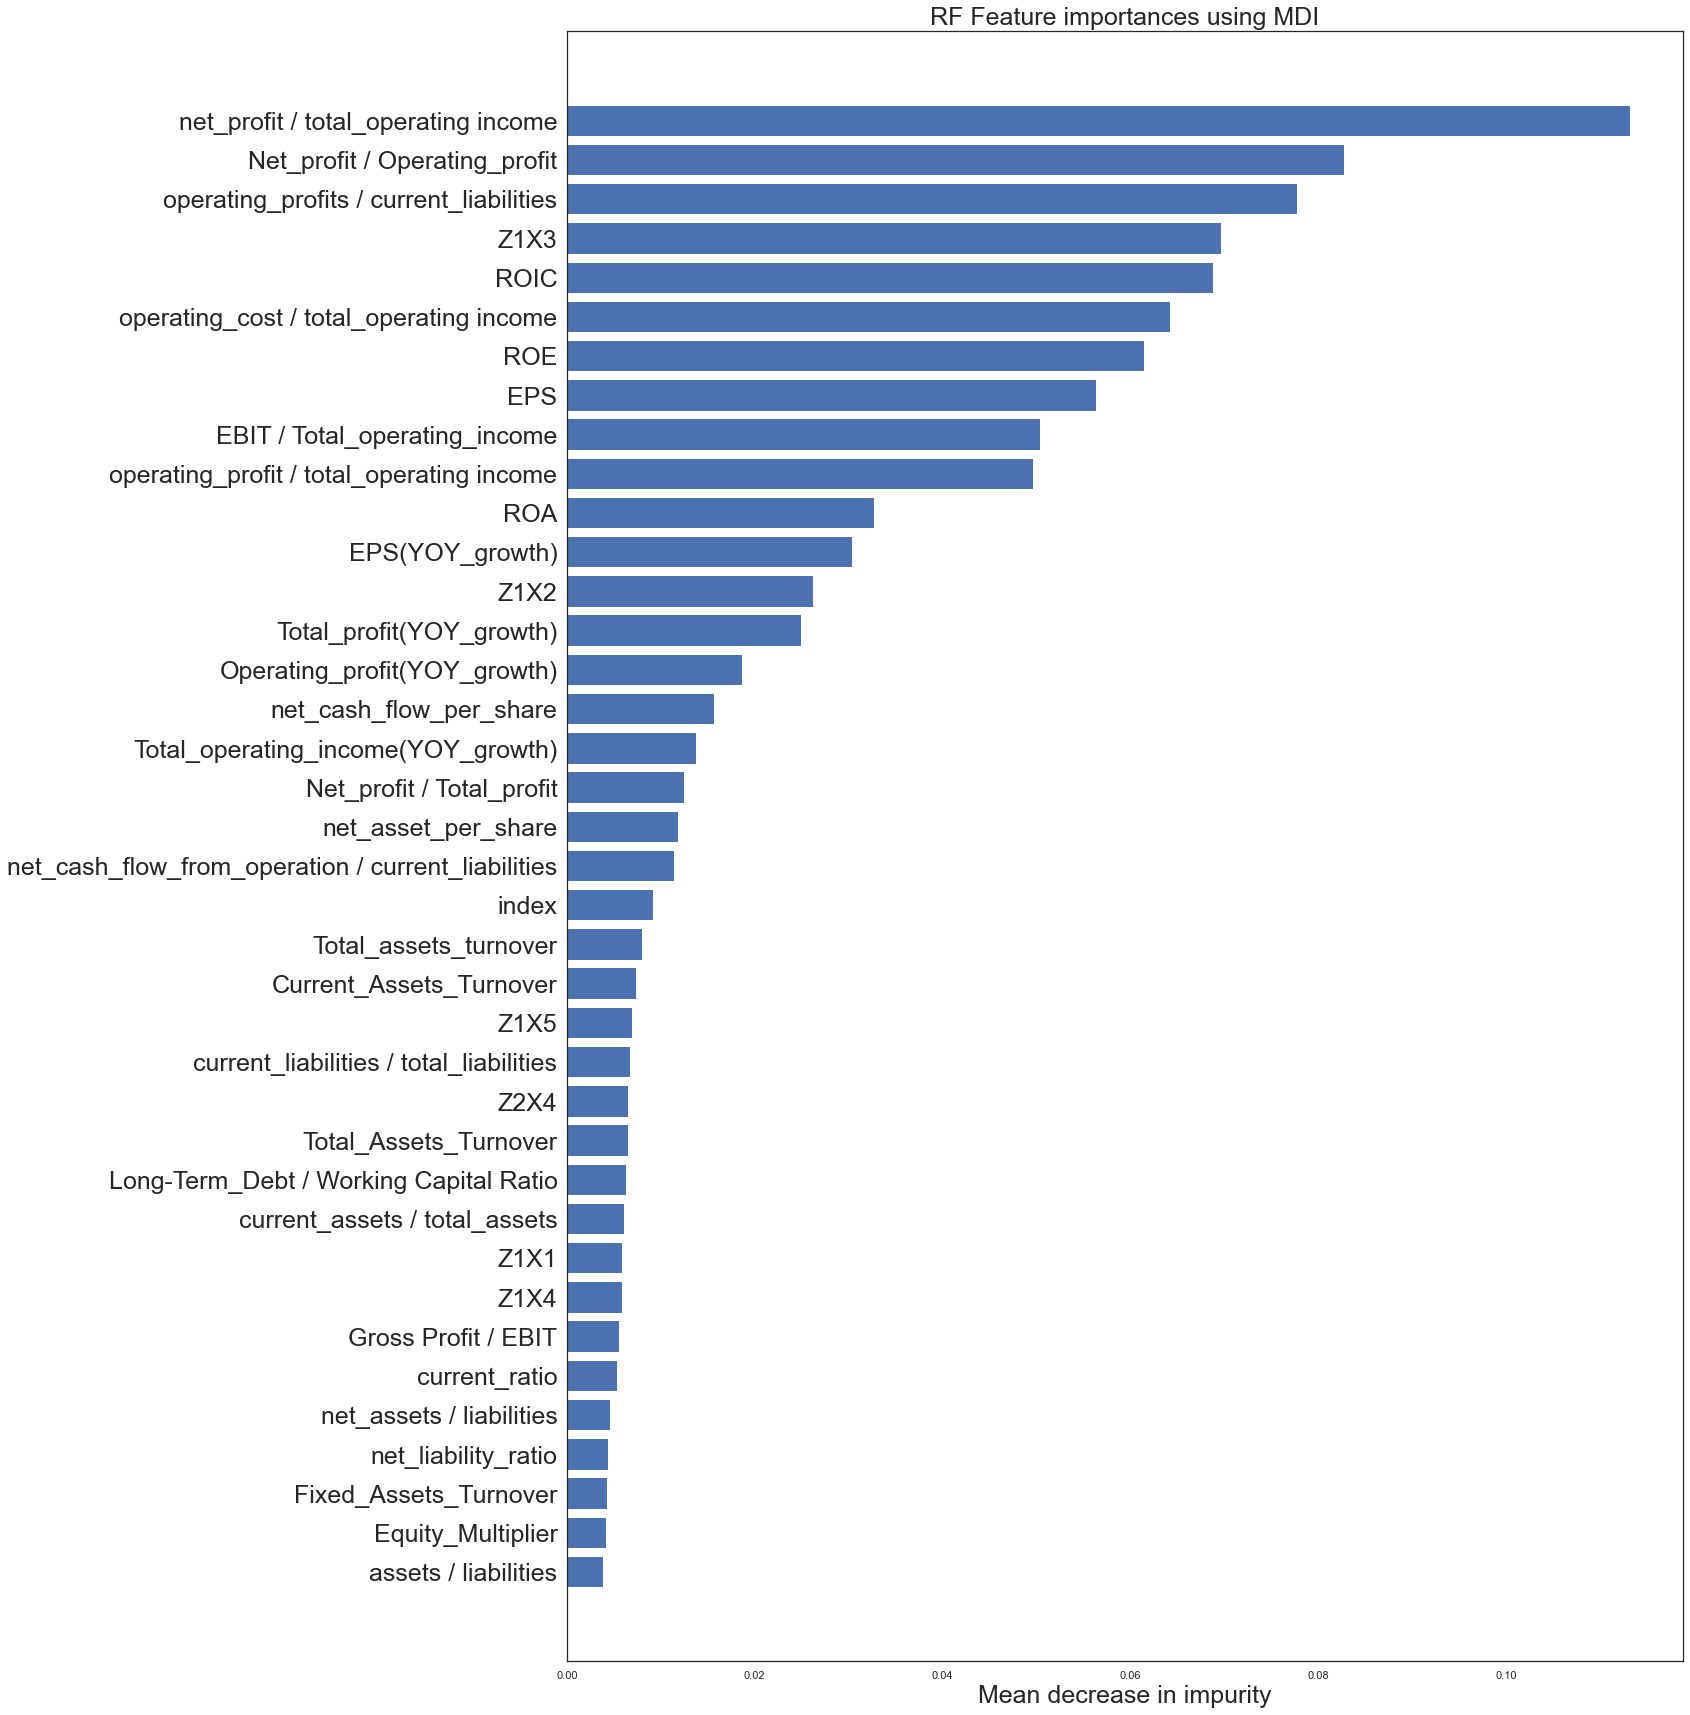

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=10)>
----------------------------------------------------------
Default RF AUC on Testing Set: 0.9678967154728928
RF with tuning AUC on Training Set: 0.9999999999999999
----------------------------------------------------------
Default RF Accuracy on Testing Set: 0.9186602870813397
RF with tuning Accuracy on Training Set: 1.0
----------------------------------------------------------
Default RF Confusion Matrix on Testing Set:
[[124   9]
 [  8  68]]
Default RF Confusion Matrix on Training Set:
[[588   0]
 [  0 245]]
----------------------------------------------------------
Default RF Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       133
           1       0.88      0.89      0.89        76

    accuracy                           0.92       209
   macro avg       0.91      0.9

In [147]:
RF_for_Features(X, 0.2, 634)

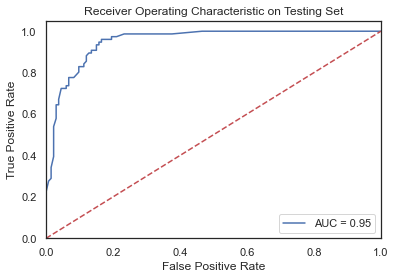

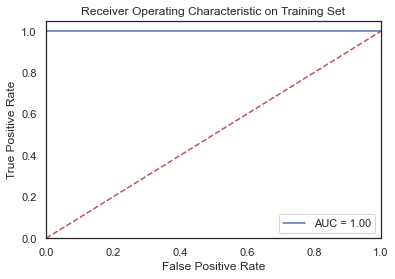

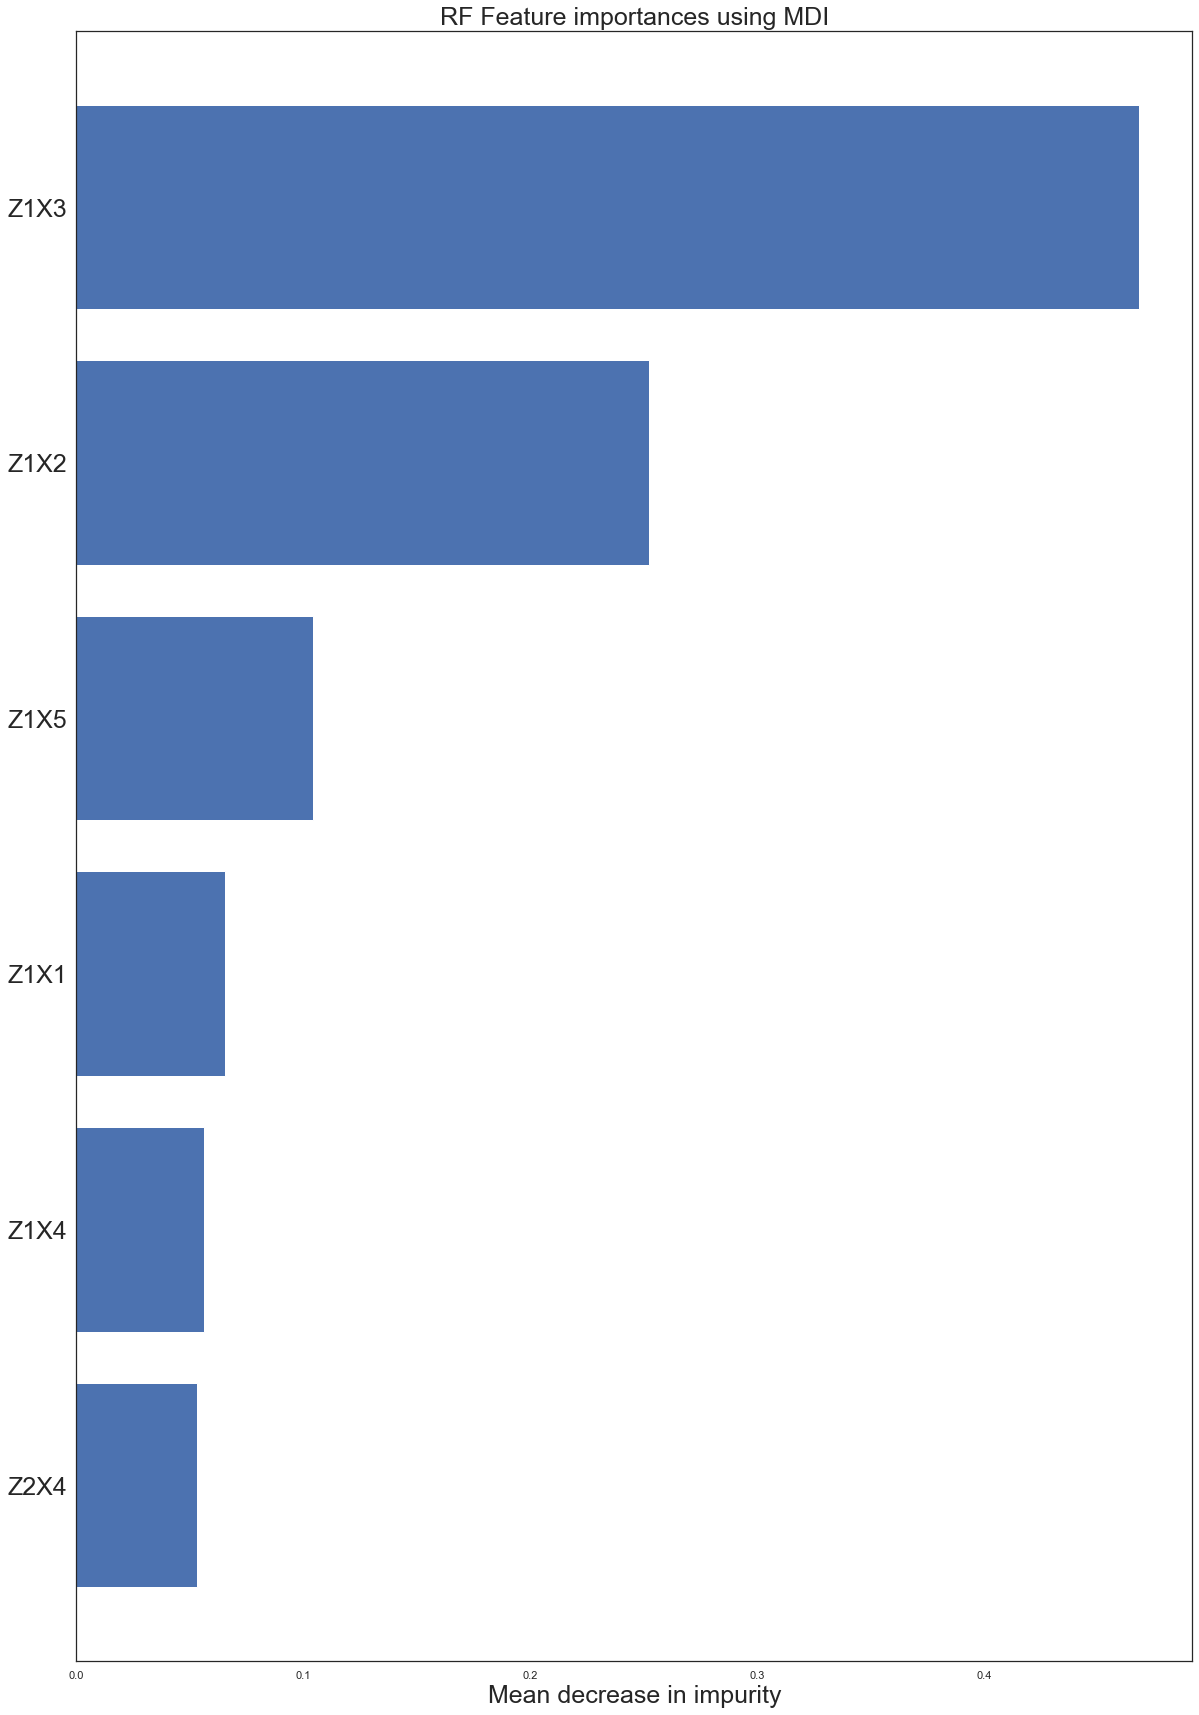

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=10)>
----------------------------------------------------------
Default RF AUC on Testing Set: 0.9511772853185596
RF with tuning AUC on Training Set: 1.0
----------------------------------------------------------
Default RF Accuracy on Testing Set: 0.8708133971291866
RF with tuning Accuracy on Training Set: 1.0
----------------------------------------------------------
Default RF Confusion Matrix on Testing Set:
[[120  13]
 [ 14  62]]
Default RF Confusion Matrix on Training Set:
[[588   0]
 [  0 245]]
----------------------------------------------------------
Default RF Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       133
           1       0.83      0.82      0.82        76

    accuracy                           0.87       209
   macro avg       0.86      0.86      0.86    

In [148]:
RF_for_Features(X1, 0.2, 634)

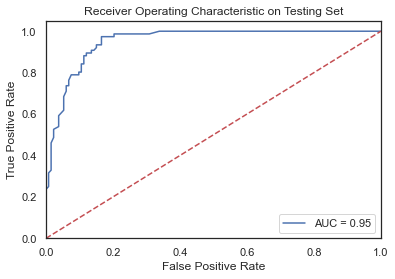

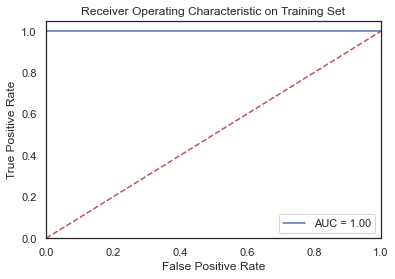

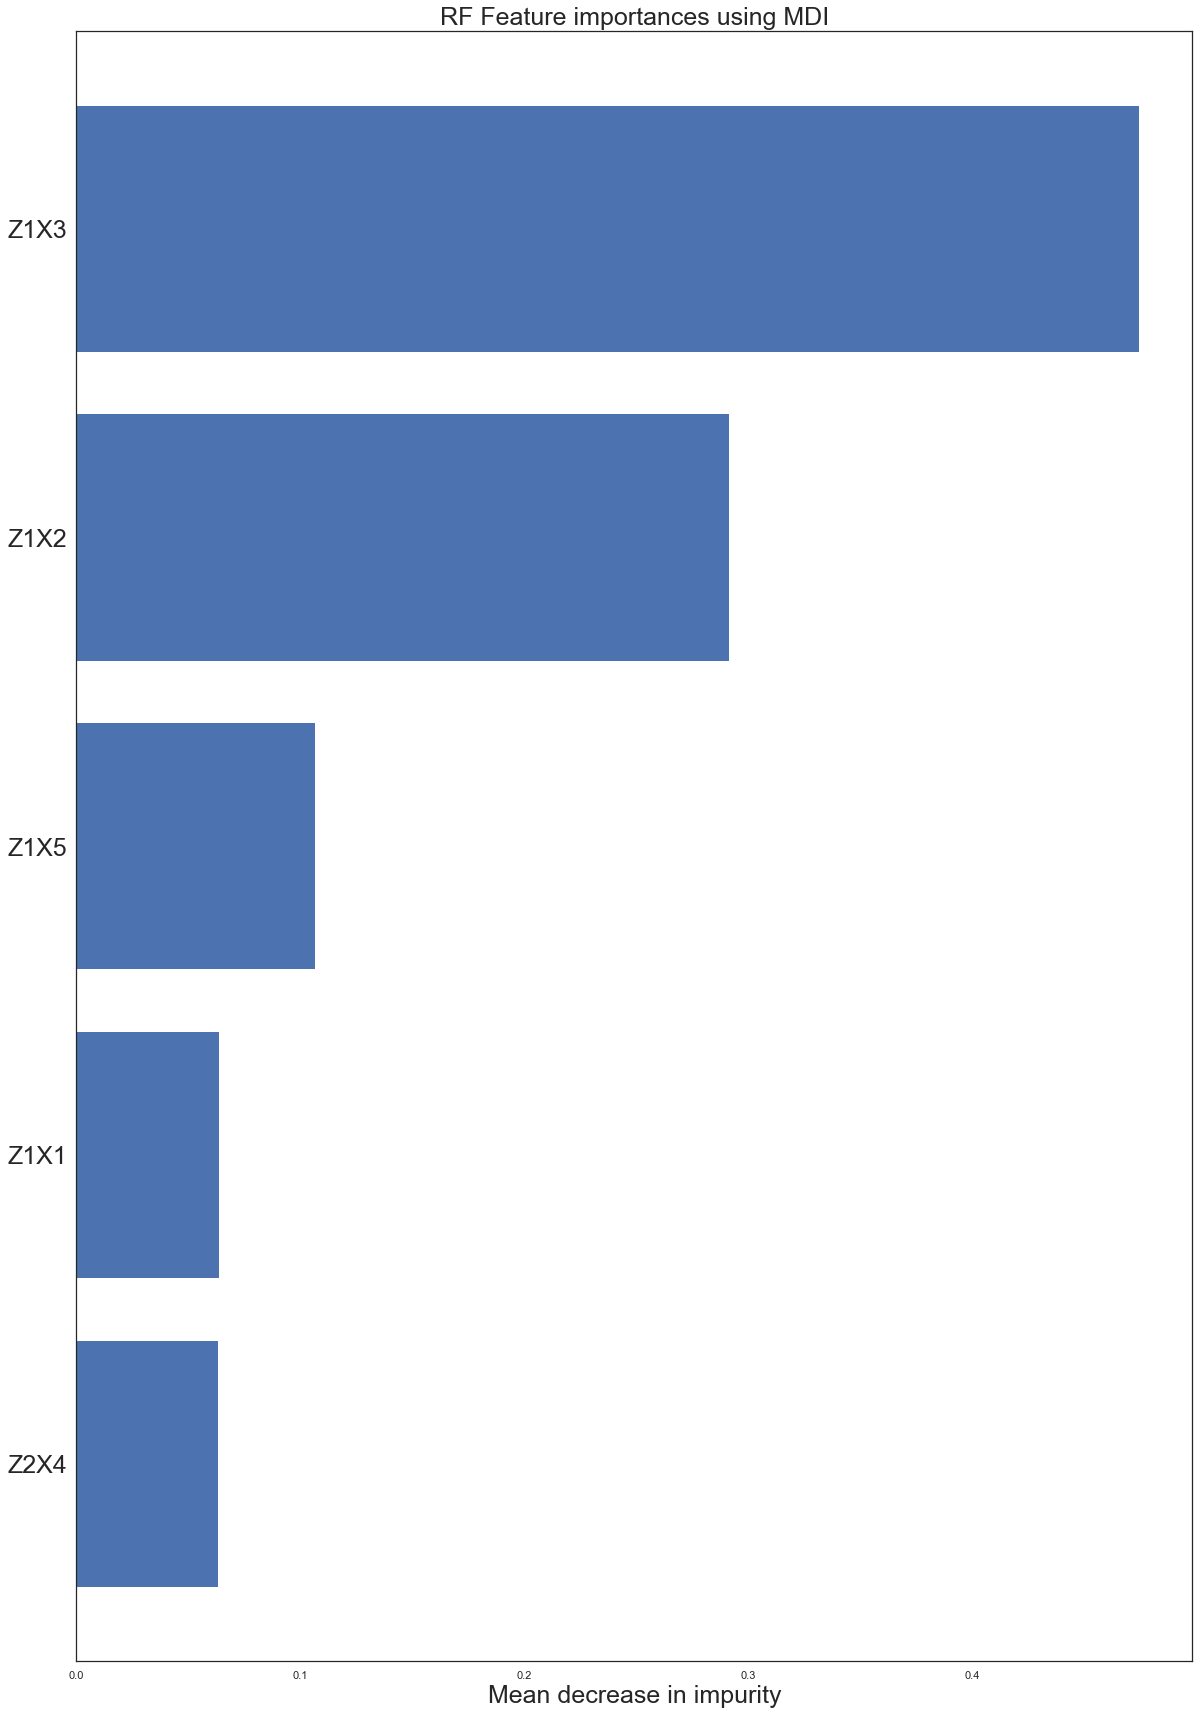

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=10)>
----------------------------------------------------------
Default RF AUC on Testing Set: 0.9515730114760586
RF with tuning AUC on Training Set: 1.0
----------------------------------------------------------
Default RF Accuracy on Testing Set: 0.861244019138756
RF with tuning Accuracy on Training Set: 1.0
----------------------------------------------------------
Default RF Confusion Matrix on Testing Set:
[[119  14]
 [ 15  61]]
Default RF Confusion Matrix on Training Set:
[[588   0]
 [  0 245]]
----------------------------------------------------------
Default RF Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       133
           1       0.81      0.80      0.81        76

    accuracy                           0.86       209
   macro avg       0.85      0.85      0.85     

In [149]:
RF_for_Features(X2, 0.2, 634)

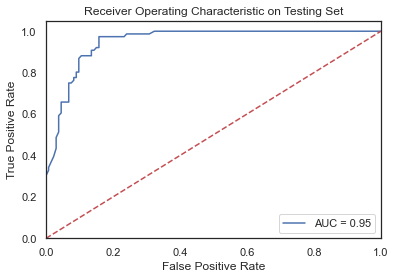

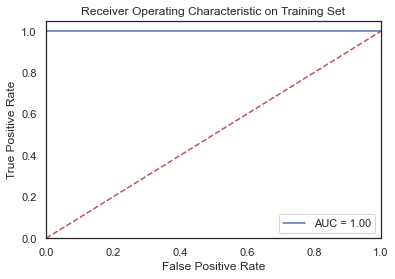

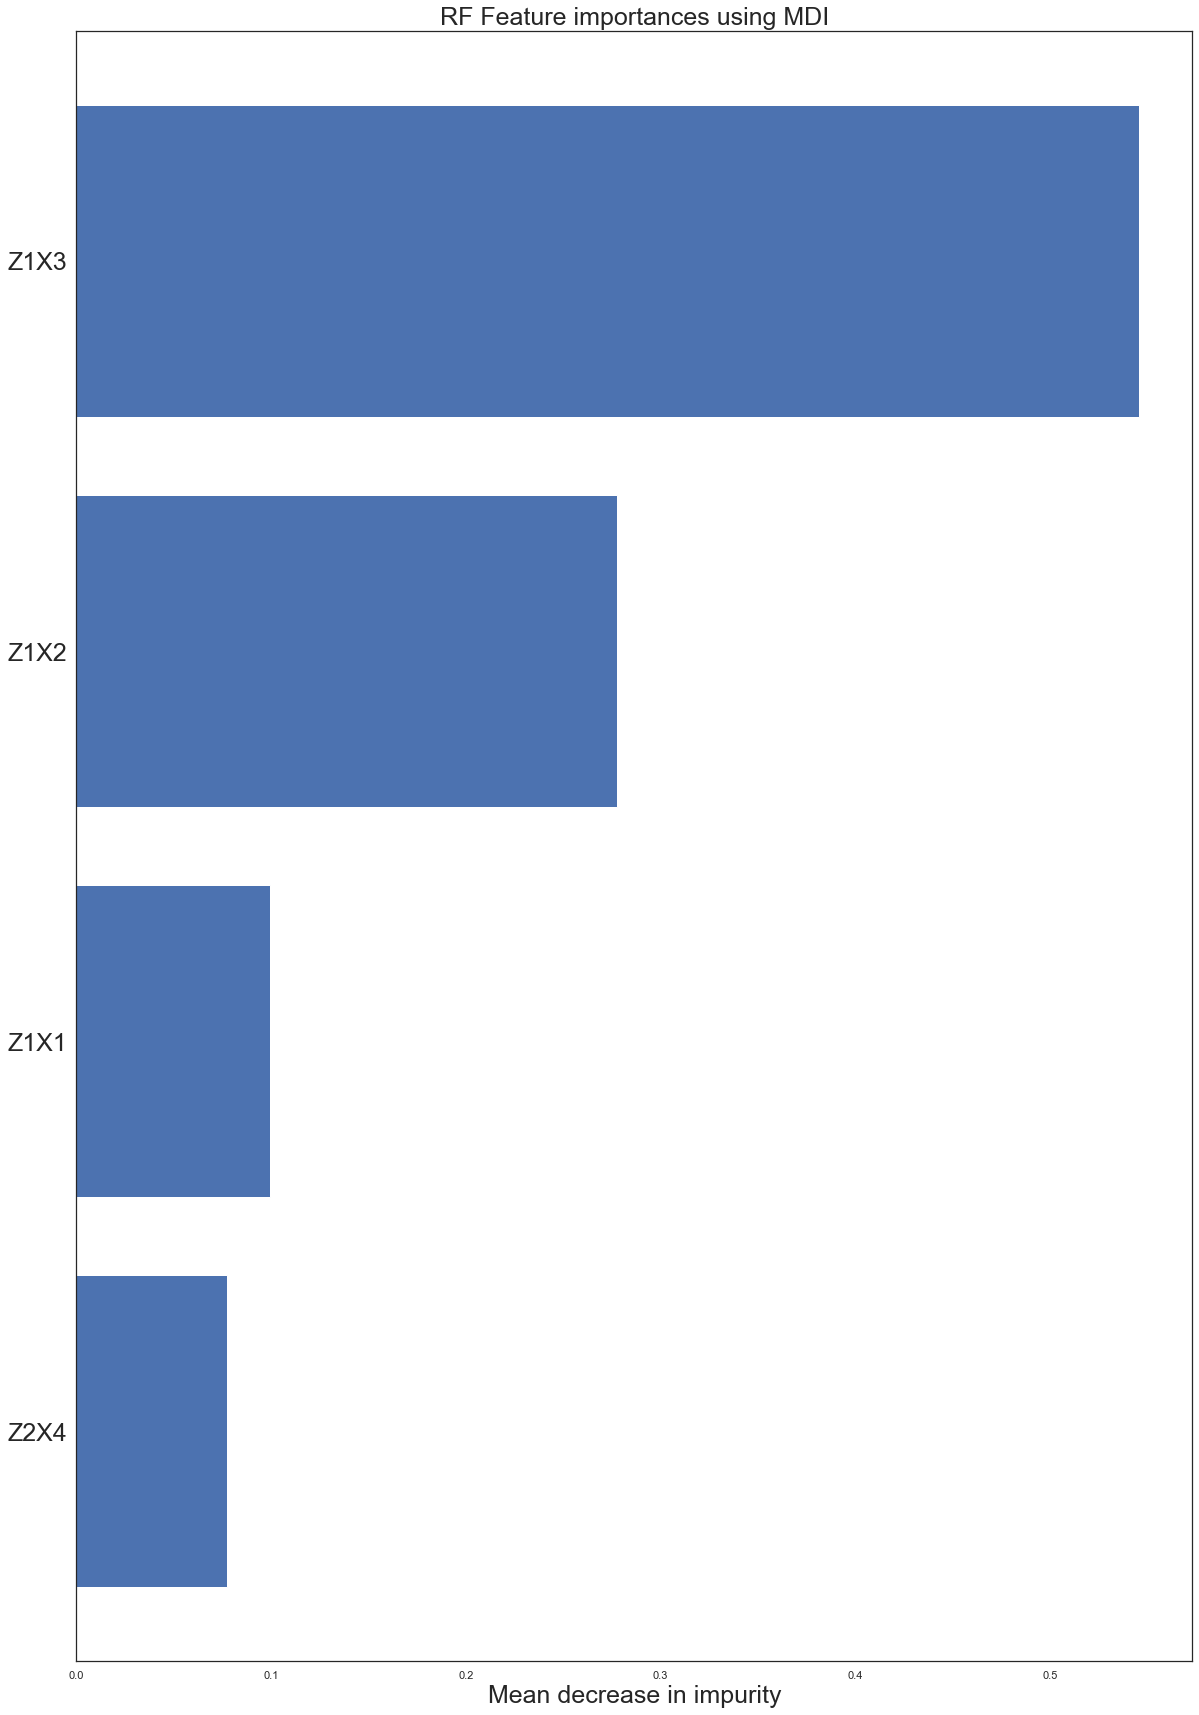

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=10)>
----------------------------------------------------------
Default RF AUC on Testing Set: 0.9500395726157498
RF with tuning AUC on Training Set: 1.0
----------------------------------------------------------
Default RF Accuracy on Testing Set: 0.8851674641148325
RF with tuning Accuracy on Training Set: 1.0
----------------------------------------------------------
Default RF Confusion Matrix on Testing Set:
[[120  13]
 [ 11  65]]
Default RF Confusion Matrix on Training Set:
[[588   0]
 [  0 245]]
----------------------------------------------------------
Default RF Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       133
           1       0.83      0.86      0.84        76

    accuracy                           0.89       209
   macro avg       0.87      0.88      0.88    

In [150]:
RF_for_Features(X3, 0.2, 634)

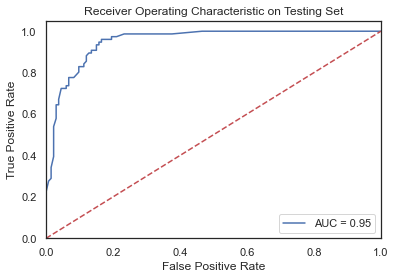

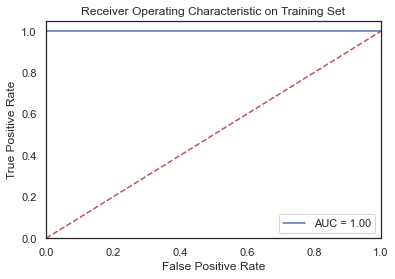

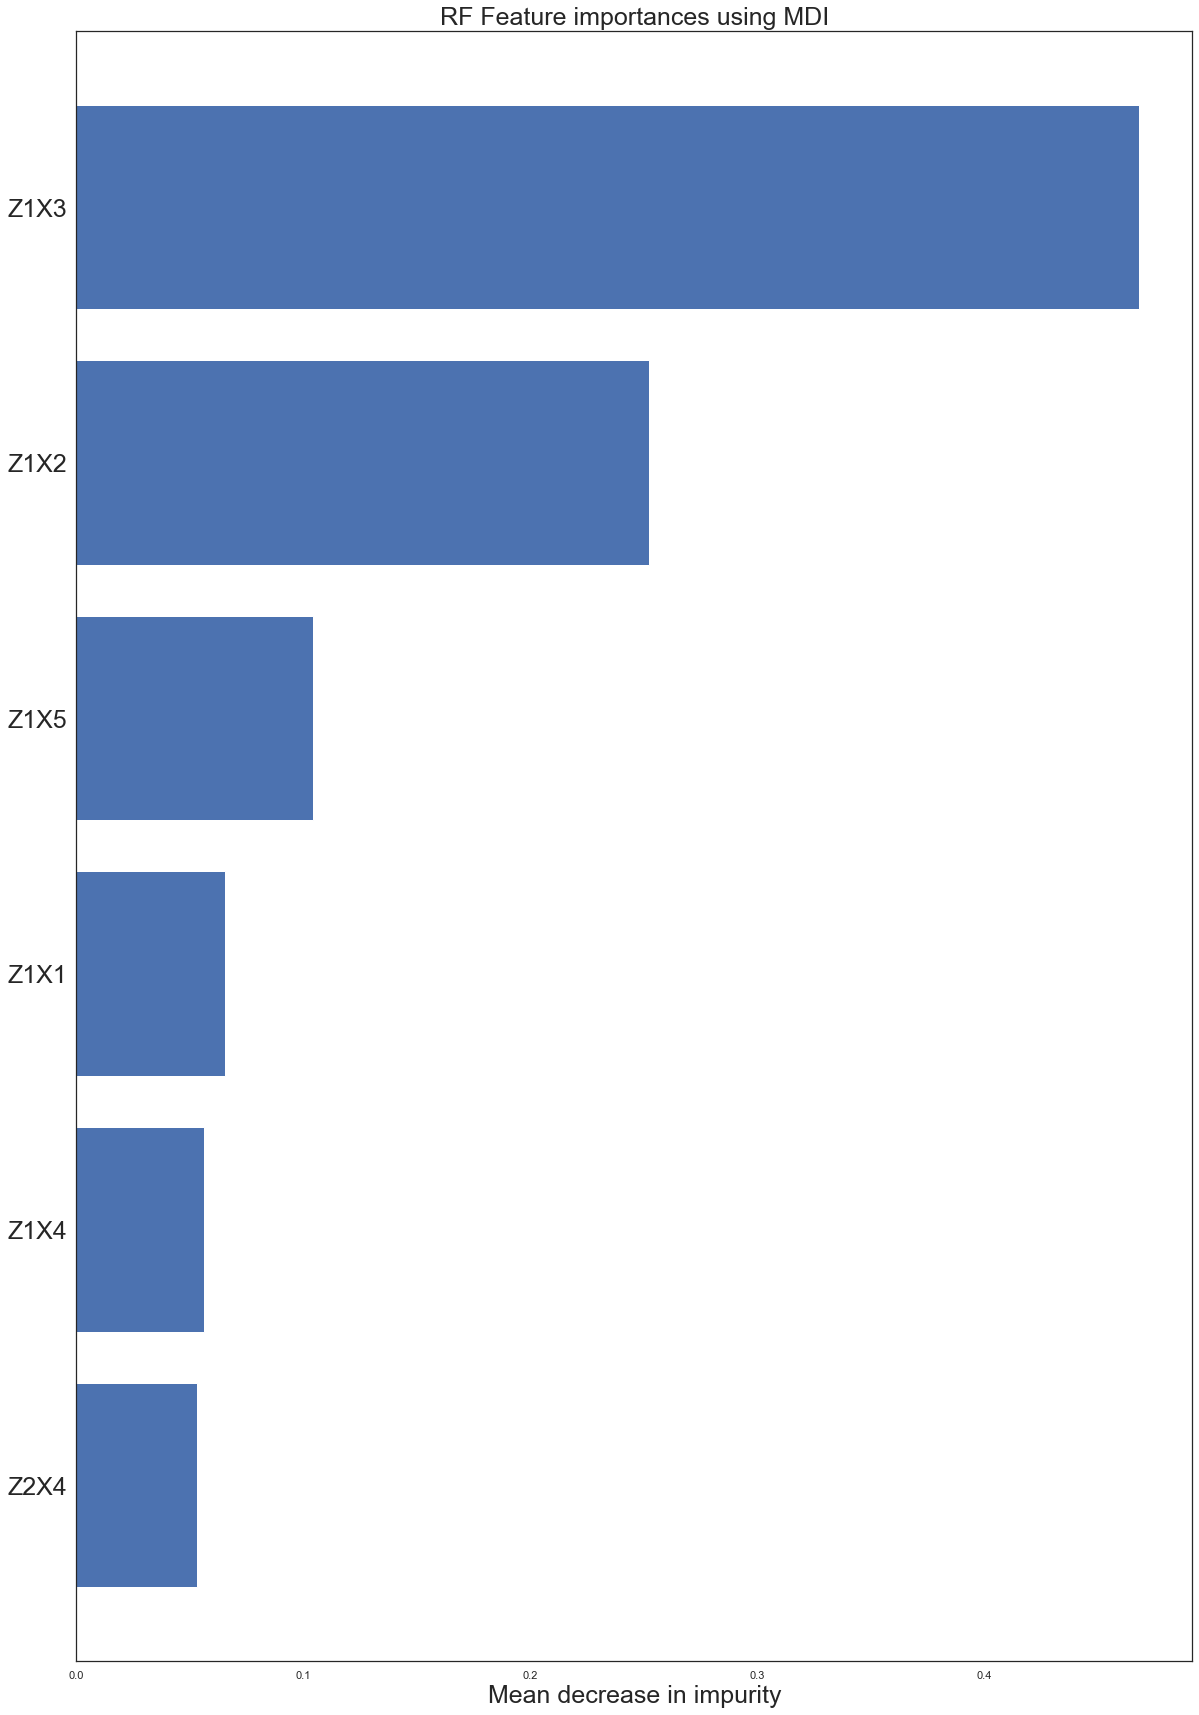

Parameter setting that give best result: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=10)>
----------------------------------------------------------
Default RF AUC on Testing Set: 0.9511772853185596
RF with tuning AUC on Training Set: 1.0
----------------------------------------------------------
Default RF Accuracy on Testing Set: 0.8708133971291866
RF with tuning Accuracy on Training Set: 1.0
----------------------------------------------------------
Default RF Confusion Matrix on Testing Set:
[[120  13]
 [ 14  62]]
Default RF Confusion Matrix on Training Set:
[[588   0]
 [  0 245]]
----------------------------------------------------------
Default RF Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       133
           1       0.83      0.82      0.82        76

    accuracy                           0.87       209
   macro avg       0.86      0.86      0.86    

In [151]:
RF_for_Features(X4, 0.2, 634)

## (3) Gradient Boosting

### Function for GB with step by step tuning

In [152]:
def GB_tuned_sbs(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    ##tuning
    
    # tune the n_estimators, range from.
    # set initial value of learning rate = 0.1
    param_test1 = {'n_estimators':range(10,150,10)}
    gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                                    min_samples_split=8,
                                                                    min_samples_leaf=5,
                                                                    max_depth=3,
                                                                    max_features='sqrt', 
                                                                    subsample=0.8,
                                                                    random_state=10
                                                                  ), 
                             param_grid = param_test1, 
                             scoring='roc_auc',    #parameter3
                             n_jobs = 4,
                             cv=5)

    gsearch1.fit(X_train, y_train)
    n_estimators_value = list(gsearch1.best_params_.values())[0]
    
    # tune max_depth
    param_test2 = {'max_depth':range(5,15,1), 
                   'min_samples_split':range(2,16,1)}
    gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                                   n_estimators = n_estimators_value,
                                                                   min_samples_leaf=5,
                                                                   max_features='sqrt', 
                                                                   subsample=0.8,
                                                                   random_state=10
                                                                  ), 
                            param_grid = param_test2, 
                            scoring='roc_auc',
                            n_jobs=4,
                            cv=5)

    gsearch2.fit(X_train, y_train)
    max_depth_value = list(gsearch2.best_params_.values())[0]
    
    #tune min_samples_split and min_samples_leaf
    param_test3 = {'min_samples_split':range(2,16,2), 
                   'min_samples_leaf':range(10,26,2)}
    gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                                                   n_estimators = n_estimators_value,
                                                                   max_depth = max_depth_value,
                                                                   max_features='sqrt', 
                                                                   subsample=0.8,
                                                                   random_state=10
                                                                  ), 
                            param_grid = param_test3, 
                            scoring='roc_auc',
                            cv=5)

    gsearch3.fit(X_train, y_train)
    min_samples_leaf_value = list(gsearch3.best_params_.values())[0]
    min_samples_split_value = list(gsearch3.best_params_.values())[1]
    
    #Tune max_features
    param_test4 = {'max_features':[None, 0.1,0.3,0.5,0.7,0.9]}
    gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                                                   n_estimators = n_estimators_value,
                                                                   max_depth = max_depth_value,
                                                                   min_samples_leaf = min_samples_leaf_value,
                                                                   min_samples_split = min_samples_split_value,
                                                                   max_features='sqrt', 
                                                                   subsample=0.8,
                                                                   random_state=10
                                                                  ), 
                           param_grid = param_test4, 
                            scoring='roc_auc',
                            cv=5)

    gsearch4.fit(X_train, y_train)
    max_features_values = list(gsearch4.best_params_.values())[0]
    
    #Tune subsample
    param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
    gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                                                   n_estimators = n_estimators_value,
                                                                   max_depth = max_depth_value,
                                                                   min_samples_leaf = min_samples_leaf_value,
                                                                   min_samples_split = min_samples_split_value,
                                                                   max_features= max_features_values, 
                                                                   random_state=10
                                                                  ), 
                            param_grid = param_test5, 
                            scoring='roc_auc',
                            cv=5)

    gsearch5.fit(X_train, y_train)
    subsample_values = list(gsearch5.best_params_.values())[0]

    #tune learning rate
    GB_model_w_tuning = GradientBoostingClassifier(learning_rate = 0.02,
                                       n_estimators = 5 * n_estimators_value,
                                       max_depth = max_depth_value,
                                       min_samples_leaf = min_samples_leaf_value,
                                       min_samples_split = min_samples_split_value,
                                       max_features = max_features_values, 
                                       subsample = subsample_values,
                                       random_state=10
                                      )
    
    #train
    GB_model_w_tuning.fit(X_train, y_train)
        
    #predict
    y_train_pred = GB_model_w_tuning.predict(X_train)
    y_test_pred  = GB_model_w_tuning.predict(X_test)
    
    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_GB_test = GB_model_w_tuning.predict_proba(X_test)[:,1]
    preds_GB_train = GB_model_w_tuning.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_GB_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_GB_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
#     # feature importance 2
#     importances = GB_model_w_tuning.feature_importances_
#     sorted_idx = np.argsort(importances)
#     pos = np.arange(sorted_idx.shape[0]) + .5
#     plt.figure(figsize=(20, 30))
#     plt.barh(pos, importances[sorted_idx], align='center')
#     plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
#     plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
#     plt.xlabel("Mean decrease in impurity",fontsize = 25)
#     plt.title("RF Feature importances using MDI",fontsize = 25)
#     plt.show()
    
    print("Parameter setting that give best result:",
          GB_model_w_tuning.get_params)
    print("----------------------------------------------------------")
    print("GB with tuning AUC on Testing Set:",roc_auc_test)
    print("GB with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("GB with tuning Accuracy on Testing Set:",Acc_test)
    print("GB with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("GB with tuning Confusion Matrix on Testing Set:")
    print(CM_test)
    print("GB with tuning Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("GB with tuning Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("GB with tuning Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)


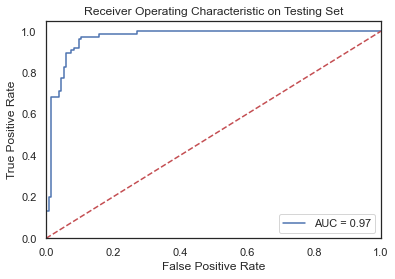

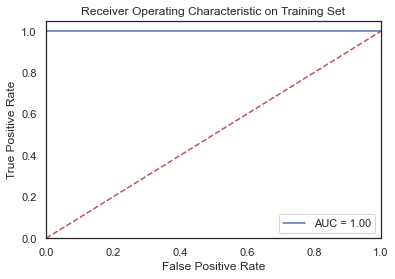

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.02, max_depth=13, max_features=0.1,
                           min_samples_leaf=14, n_estimators=700,
                           random_state=10, subsample=0.9)>
----------------------------------------------------------
GB with tuning AUC on Testing Set: 0.9685397704788287
GB with tuning AUC on Training Set: 1.0
----------------------------------------------------------
GB with tuning Accuracy on Testing Set: 0.9186602870813397
GB with tuning Accuracy on Training Set: 1.0
----------------------------------------------------------
GB with tuning Confusion Matrix on Testing Set:
[[123  10]
 [  7  69]]
GB with tuning Confusion Matrix on Training Set:
[[588   0]
 [  0 245]]
----------------------------------------------------------
GB with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.95   

In [153]:
GB_tuned_sbs(X, 0.2, 634)

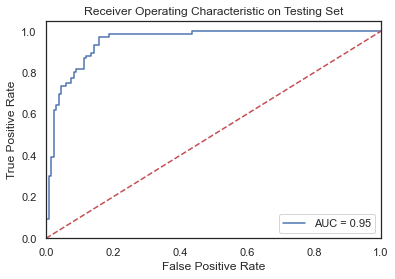

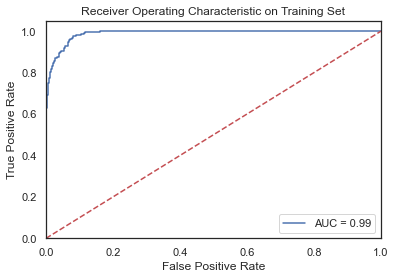

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.02, max_depth=10, max_features=0.9,
                           min_samples_leaf=18, random_state=10,
                           subsample=0.75)>
----------------------------------------------------------
GB with tuning AUC on Testing Set: 0.9519192718638703
GB with tuning AUC on Training Set: 0.9887408024434263
----------------------------------------------------------
GB with tuning Accuracy on Testing Set: 0.8708133971291866
GB with tuning Accuracy on Training Set: 0.9399759903961584
----------------------------------------------------------
GB with tuning Confusion Matrix on Testing Set:
[[120  13]
 [ 14  62]]
GB with tuning Confusion Matrix on Training Set:
[[562  26]
 [ 24 221]]
----------------------------------------------------------
GB with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0 

In [154]:
GB_tuned_sbs(X1, 0.2, 634)

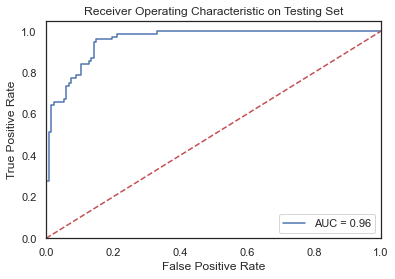

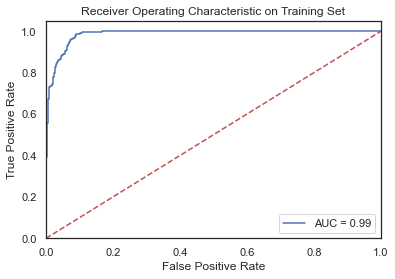

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.02, max_depth=9, max_features=0.5,
                           min_samples_leaf=22, n_estimators=150,
                           random_state=10, subsample=0.6)>
----------------------------------------------------------
GB with tuning AUC on Testing Set: 0.9552829442026118
GB with tuning AUC on Training Set: 0.9856032208801888
----------------------------------------------------------
GB with tuning Accuracy on Testing Set: 0.861244019138756
GB with tuning Accuracy on Training Set: 0.9303721488595438
----------------------------------------------------------
GB with tuning Confusion Matrix on Testing Set:
[[119  14]
 [ 15  61]]
GB with tuning Confusion Matrix on Training Set:
[[558  30]
 [ 28 217]]
----------------------------------------------------------
GB with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

In [155]:
GB_tuned_sbs(X2, 0.2, 634)

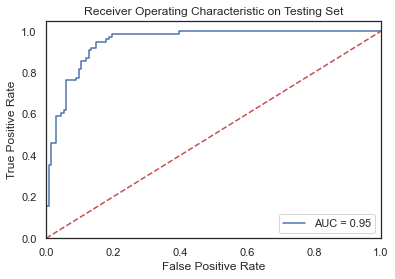

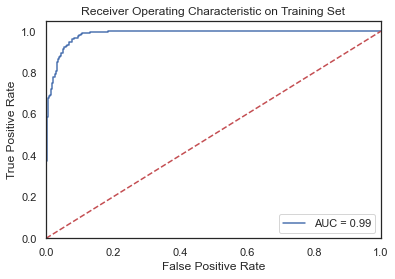

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.02, max_depth=5, max_features=0.5,
                           min_samples_leaf=16, random_state=10, subsample=0.7)>
----------------------------------------------------------
GB with tuning AUC on Testing Set: 0.948753462603878
GB with tuning AUC on Training Set: 0.9850270720533112
----------------------------------------------------------
GB with tuning Accuracy on Testing Set: 0.8660287081339713
GB with tuning Accuracy on Training Set: 0.9351740696278511
----------------------------------------------------------
GB with tuning Confusion Matrix on Testing Set:
[[120  13]
 [ 15  61]]
GB with tuning Confusion Matrix on Training Set:
[[560  28]
 [ 26 219]]
----------------------------------------------------------
GB with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90

In [156]:
GB_tuned_sbs(X3, 0.2, 634)

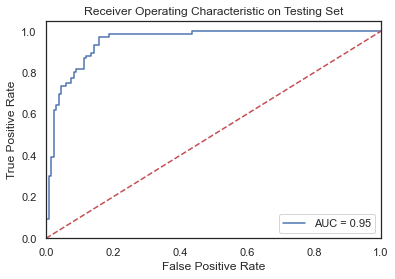

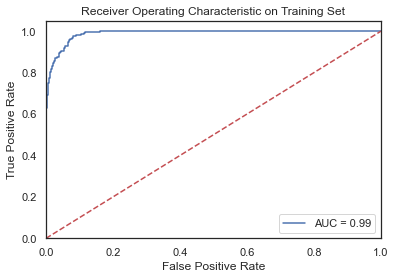

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.02, max_depth=10, max_features=0.9,
                           min_samples_leaf=18, random_state=10,
                           subsample=0.75)>
----------------------------------------------------------
GB with tuning AUC on Testing Set: 0.9519192718638703
GB with tuning AUC on Training Set: 0.9887408024434263
----------------------------------------------------------
GB with tuning Accuracy on Testing Set: 0.8708133971291866
GB with tuning Accuracy on Training Set: 0.9399759903961584
----------------------------------------------------------
GB with tuning Confusion Matrix on Testing Set:
[[120  13]
 [ 14  62]]
GB with tuning Confusion Matrix on Training Set:
[[562  26]
 [ 24 221]]
----------------------------------------------------------
GB with tuning Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0 

In [157]:
GB_tuned_sbs(X4, 0.2, 634)

### Function for GB with altogher tuning

In [158]:
def GB_tuned_tgt(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    ##tuning
    estimator =  GradientBoostingClassifier(random_state=10)
    parameters = {"n_estimators": [100,200,500,1000],
                  "learning_rate": [0.1,0.05,0.02,0.001],
                  "max_depth": [5,10,15],
                  "min_samples_split":[5,10,15],
                  'min_samples_leaf':[15,20,25],
                  'subsample':[0.6,0.7,0.8]
                 }
    
    grid_search = GridSearchCV(
        estimator = estimator,
        param_grid = parameters,
        scoring = "roc_auc",
        cv = 5
    )
    
    #train
    GB_model_w_tuning = grid_search.fit(X_train, y_train)
    GB_model_w_tuning.fit(X_train,y_train)
    
    #predict
    y_train_pred = GB_model_w_tuning.predict(X_train)
    y_test_pred  = GB_model_w_tuning.predict(X_test)
    
    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_GB_test = GB_model_w_tuning.predict_proba(X_test)[:,1]
    preds_GB_train = GB_model_w_tuning.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_GB_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_GB_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
    # feature importance 2
    importances = GB_model_w_tuning.feature_importances_
    sorted_idx = np.argsort(importances)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 30))
    plt.barh(pos, importances[sorted_idx], align='center')
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.xlabel("Mean decrease in impurity",fontsize = 25)
    plt.title("RF Feature importances using MDI",fontsize = 25)
    plt.show()
    
    print("Parameter setting that give best result:",
          GB_model_w_tuning.best_params_)
    print("----------------------------------------------------------")
    print("GB with tuning AUC on Testing Set:",roc_auc_test)
    print("GB with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("GB with tuning Accuracy on Testing Set:",Acc_test)
    print("GB with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("GB with tuning Confusion Matrix on Testing Set:")
    print(CM_test)
    print("GB with tuning Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("GB with tuning Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("GB with tuning Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)


### Do not run GB_tuned_tgt, it takes forever

### Function for GB w/o tuning

In [160]:
def GB_for_Features(X, test_size=0.20, random_state=634):
    df=pd.concat([distress, X],axis=1)
    
    #split the data
    Train, Test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]

    #train
    GB_model = GradientBoostingClassifier(random_state=10)
    GB_model.fit(X_train, y_train)
    
        
    #predict
    y_train_pred = GB_model.predict(X_train)
    y_test_pred  = GB_model.predict(X_test)

    #performance measure
    ## 1. accuracy
    Acc_test = metrics.accuracy_score(y_test, y_test_pred)
    Acc_train = metrics.accuracy_score(y_train, y_train_pred)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_test_pred)
    CM_train = confusion_matrix(y_train, y_train_pred)
    ## 3-1 roc_auc calculation
    preds_GB_test = GB_model.predict_proba(X_test)[:,1]
    preds_GB_train = GB_model.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_GB_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_GB_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test) 
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 roc-auc on testing set plot
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Testing Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_train_pred))
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_test_pred)
    ClfRprt_train = classification_report(y_train, y_train_pred)
    
    # feature importance 2
    importances = GB_model.feature_importances_
    sorted_idx = np.argsort(importances)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 30))
    plt.barh(pos, importances[sorted_idx], align='center')
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.yticks(pos, X_train.keys()[sorted_idx], fontsize = 25)
    plt.xlabel("Mean decrease in impurity",fontsize = 25)
    plt.title("GB Feature importances using MDI",fontsize = 25)
    plt.show()
    
    print("Parameter setting that give best result:",
          GB_model.get_params)
    print("----------------------------------------------------------")
    print("Default GB AUC on Testing Set:",roc_auc_test)
    print("GB with tuning AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("Default GB Accuracy on Testing Set:",Acc_test)
    print("GB with tuning Accuracy on Training Set:",Acc_train)    
    print("----------------------------------------------------------")
    print("Default GB Confusion Matrix on Testing Set:")
    print(CM_test)
    print("Default GB Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("Default GB Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("Default GB Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)
    

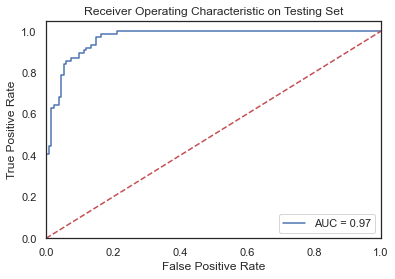

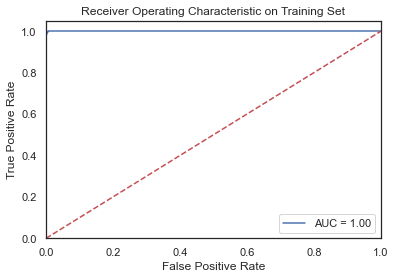

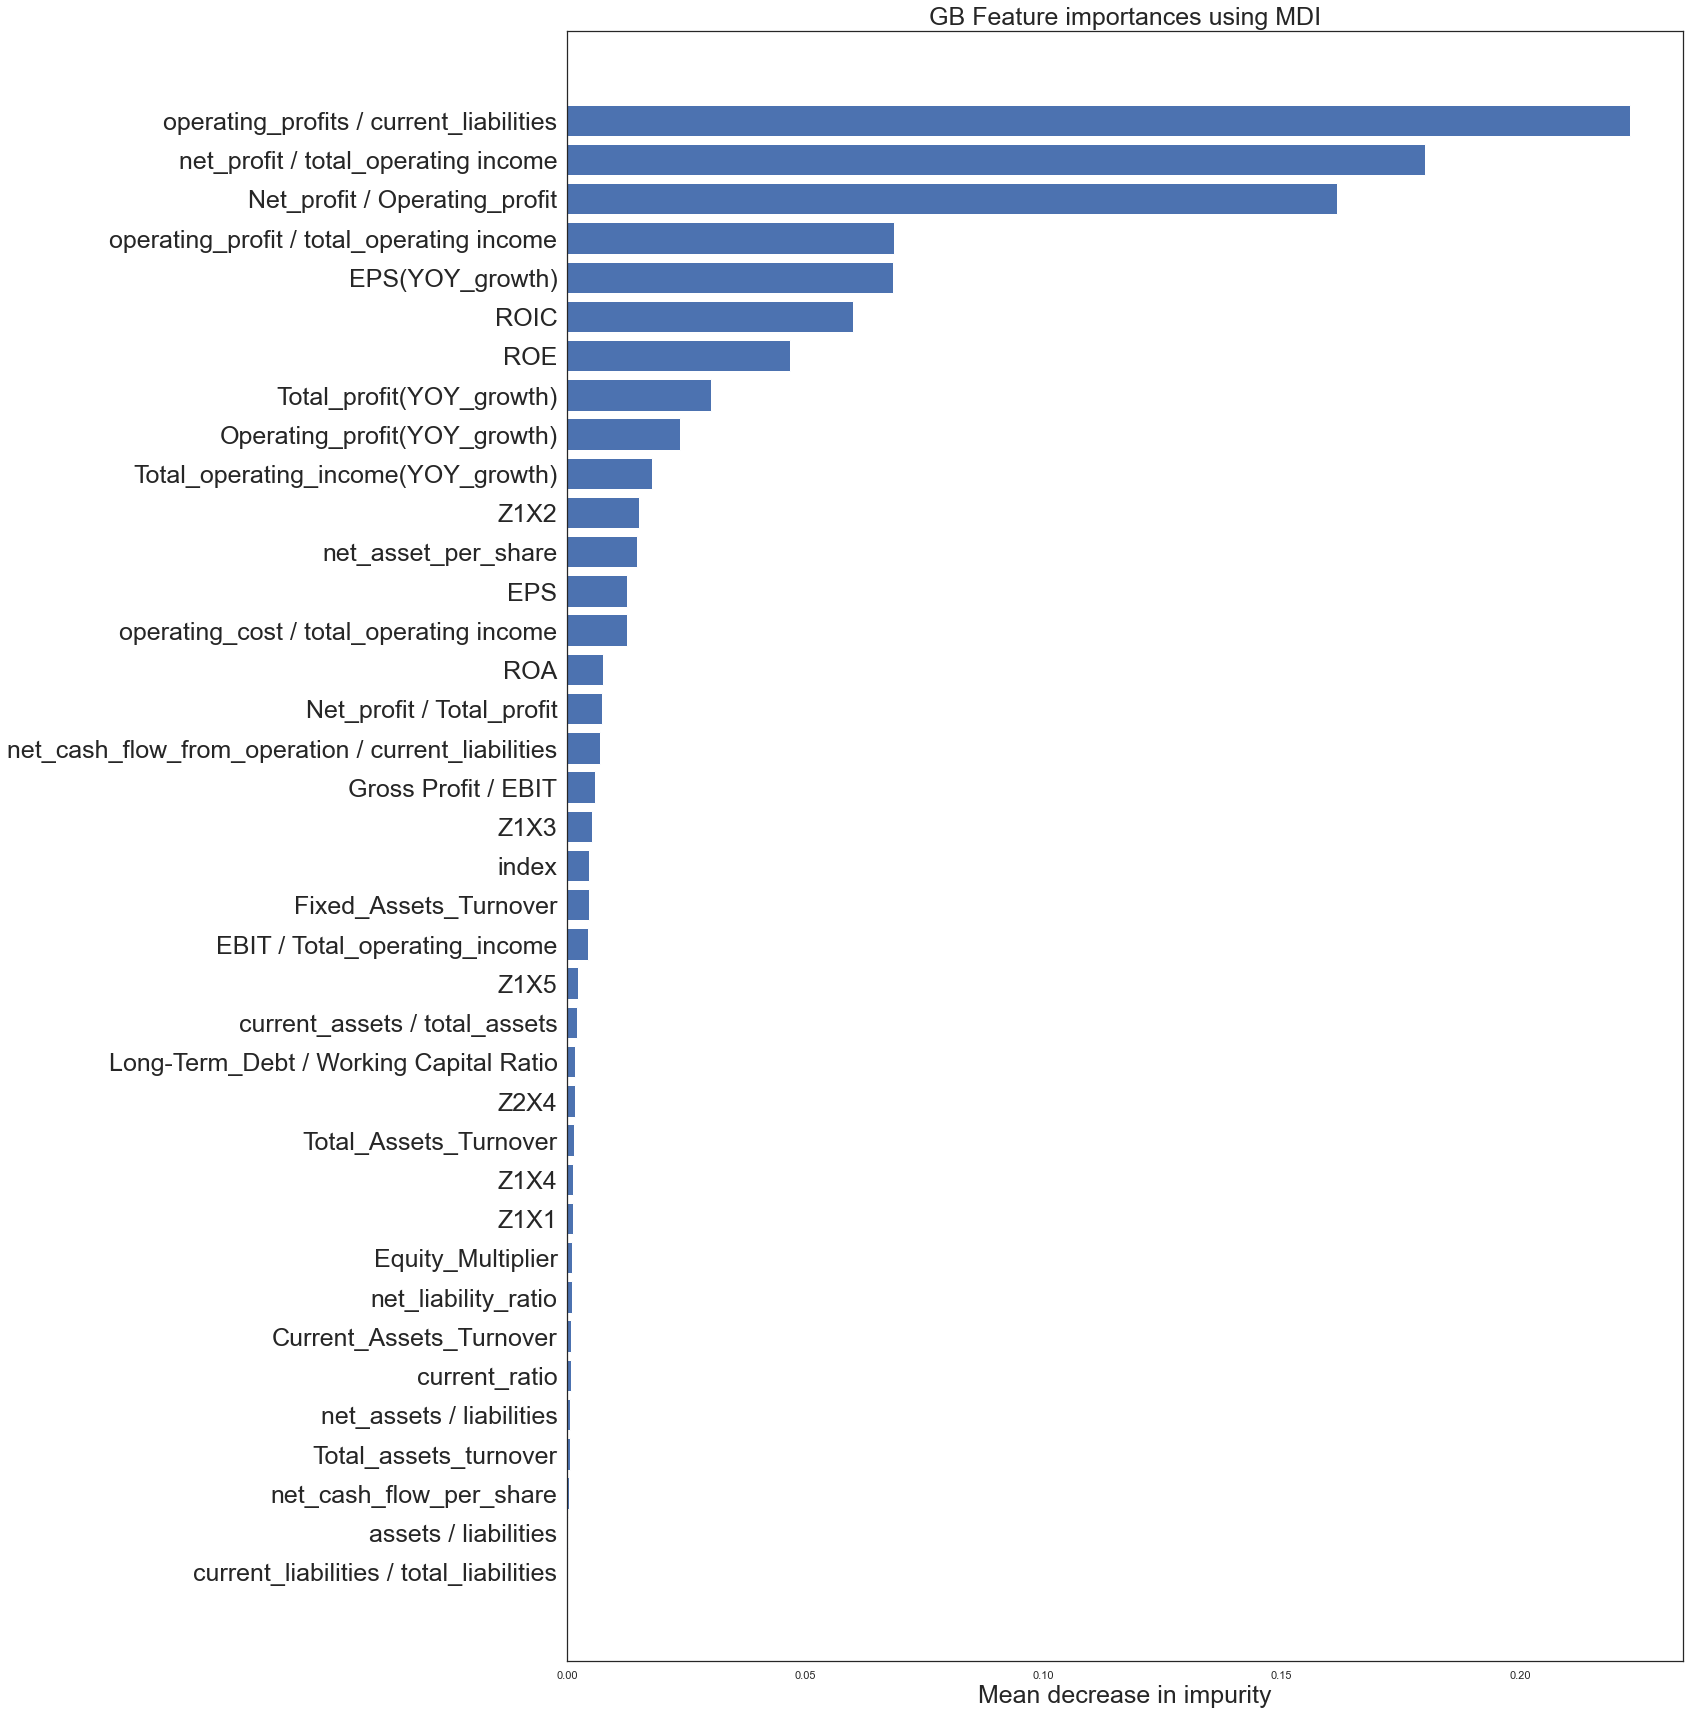

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=10)>
----------------------------------------------------------
Default GB AUC on Testing Set: 0.9675504550850811
GB with tuning AUC on Training Set: 0.9999652922393447
----------------------------------------------------------
Default GB Accuracy on Testing Set: 0.8995215311004785
GB with tuning Accuracy on Training Set: 0.9963985594237695
----------------------------------------------------------
Default GB Confusion Matrix on Testing Set:
[[122  11]
 [ 10  66]]
Default GB Confusion Matrix on Training Set:
[[586   2]
 [  1 244]]
----------------------------------------------------------
Default GB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.86      0.87      0.86        76

    accuracy                           0.90       209
   macro avg 

In [161]:
GB_for_Features(X, 0.2, 634)

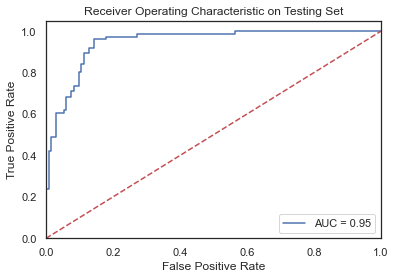

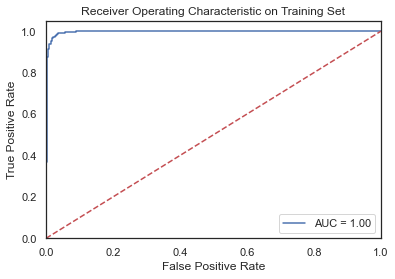

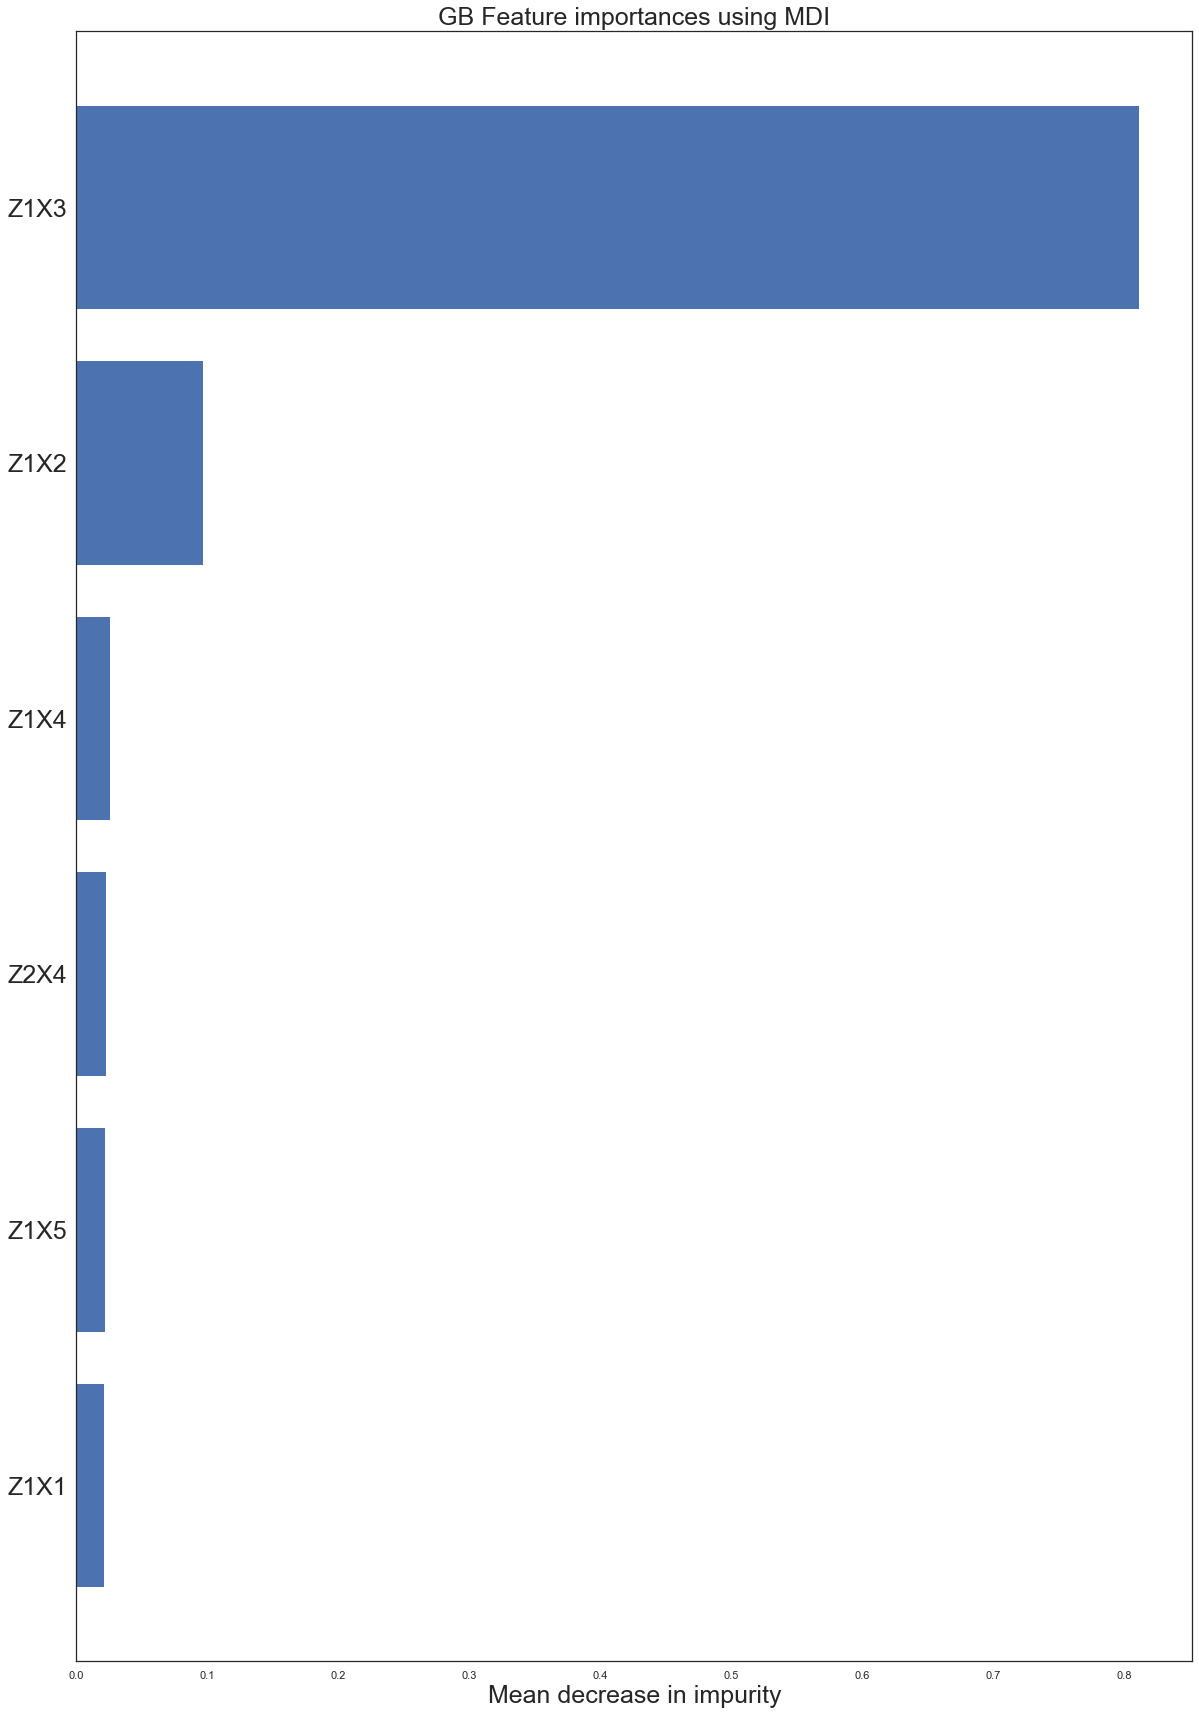

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=10)>
----------------------------------------------------------
Default GB AUC on Testing Set: 0.9463791056588841
GB with tuning AUC on Training Set: 0.9967930029154519
----------------------------------------------------------
Default GB Accuracy on Testing Set: 0.8755980861244019
GB with tuning Accuracy on Training Set: 0.9735894357743097
----------------------------------------------------------
Default GB Confusion Matrix on Testing Set:
[[118  15]
 [ 11  65]]
Default GB Confusion Matrix on Training Set:
[[573  15]
 [  7 238]]
----------------------------------------------------------
Default GB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       133
           1       0.81      0.86      0.83        76

    accuracy                           0.88       209
   macro avg 

In [162]:
GB_for_Features(X1, 0.2, 634)

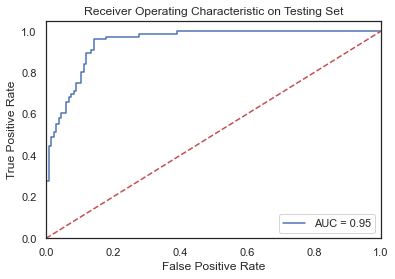

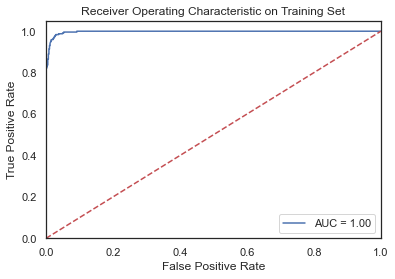

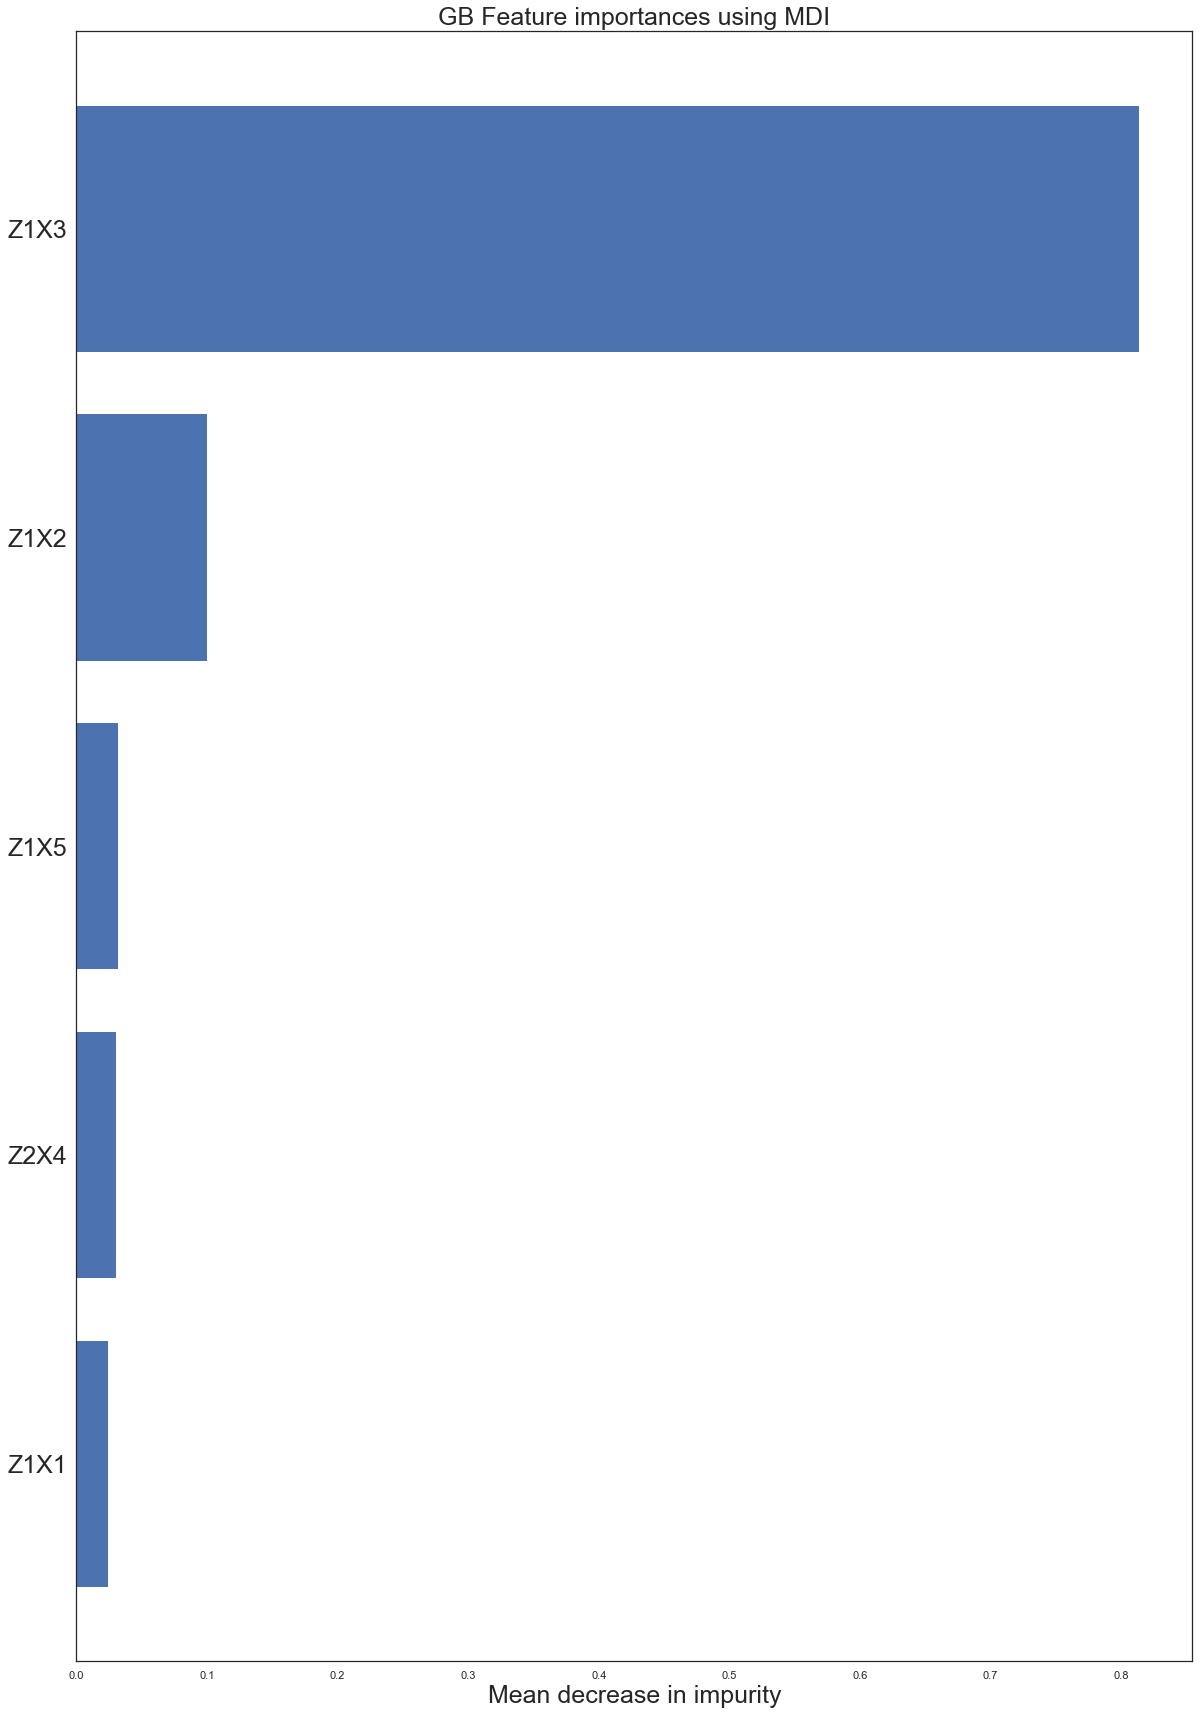

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=10)>
----------------------------------------------------------
Default GB AUC on Testing Set: 0.9467748318163831
GB with tuning AUC on Training Set: 0.9973448563098709
----------------------------------------------------------
Default GB Accuracy on Testing Set: 0.8708133971291866
GB with tuning Accuracy on Training Set: 0.9735894357743097
----------------------------------------------------------
Default GB Confusion Matrix on Testing Set:
[[118  15]
 [ 12  64]]
Default GB Confusion Matrix on Training Set:
[[575  13]
 [  9 236]]
----------------------------------------------------------
Default GB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       133
           1       0.81      0.84      0.83        76

    accuracy                           0.87       209
   macro avg 

In [163]:
GB_for_Features(X2, 0.2, 634)

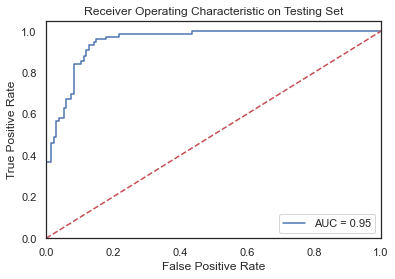

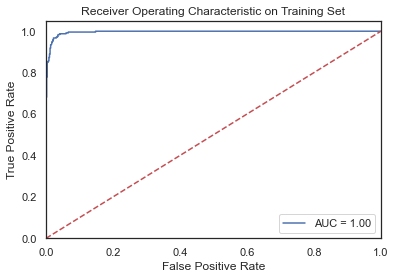

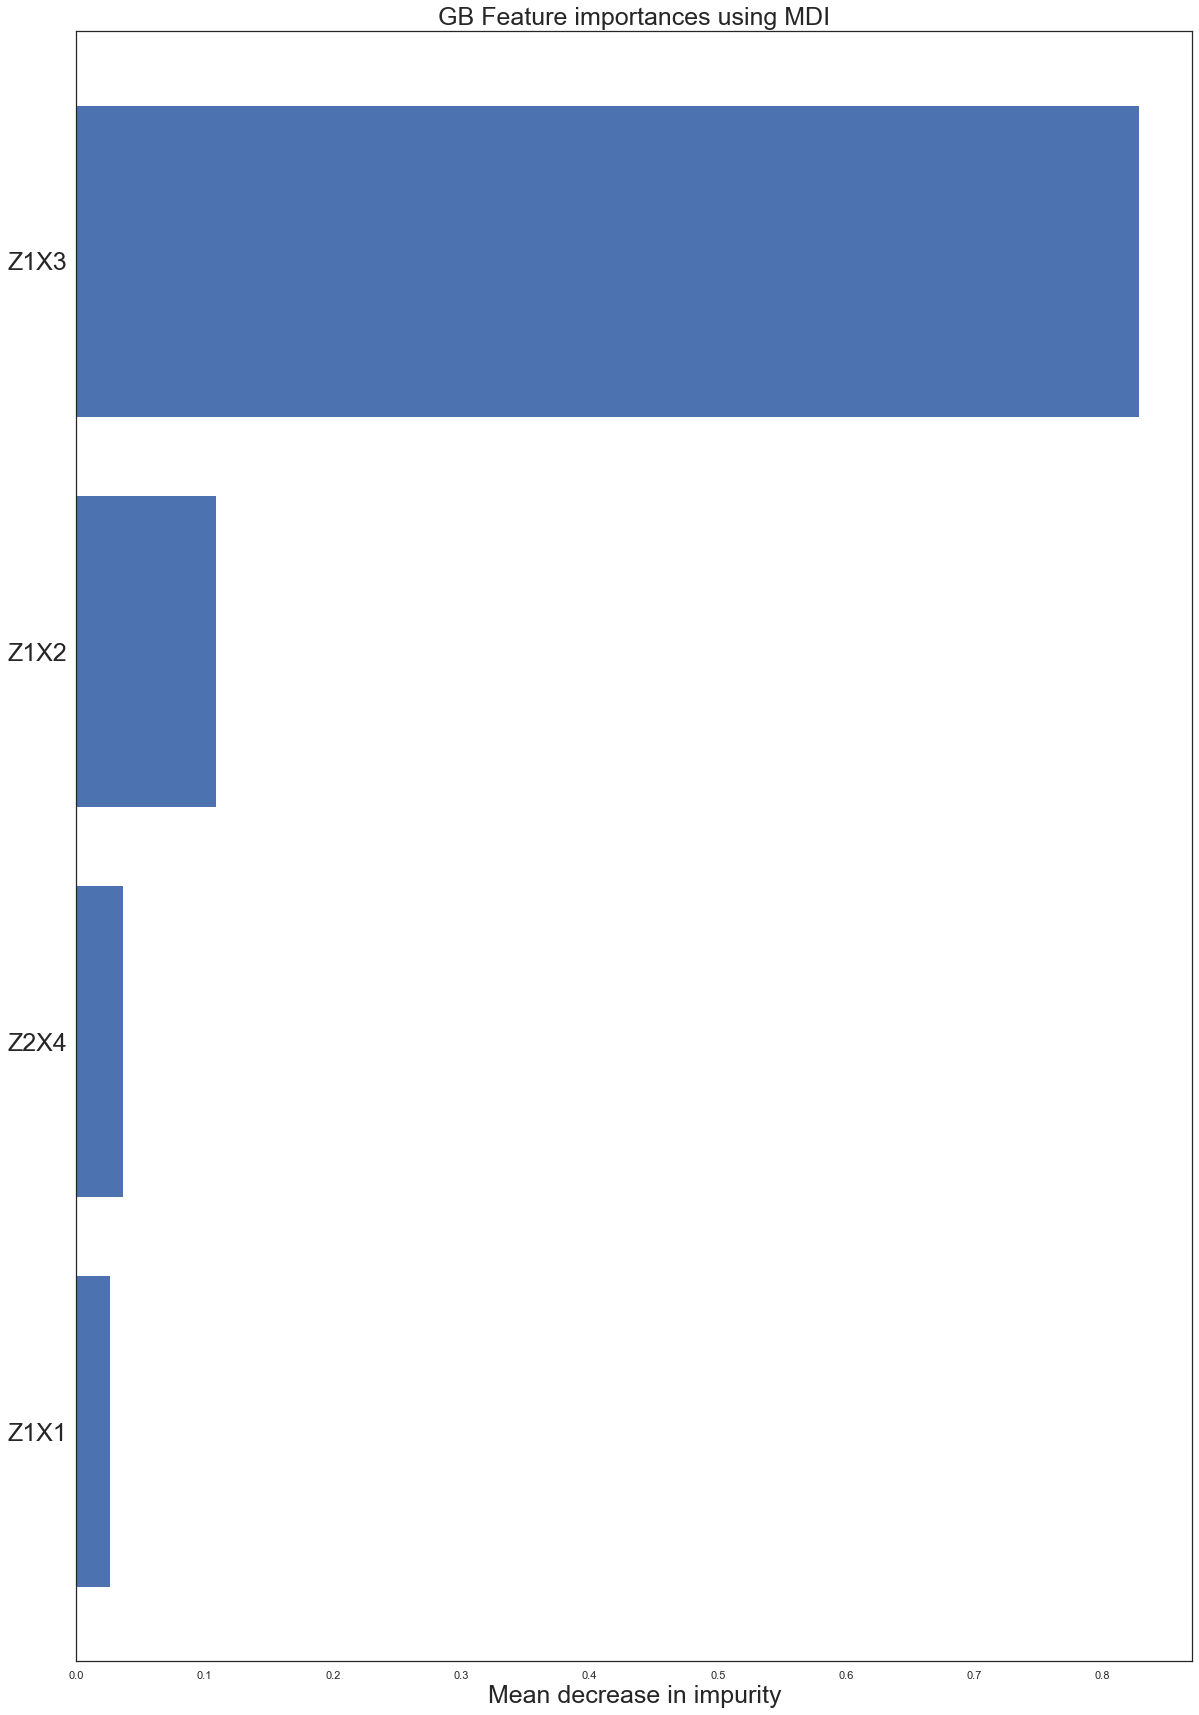

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=10)>
----------------------------------------------------------
Default GB AUC on Testing Set: 0.9503363672338742
GB with tuning AUC on Training Set: 0.9962133833125086
----------------------------------------------------------
Default GB Accuracy on Testing Set: 0.8803827751196173
GB with tuning Accuracy on Training Set: 0.9747899159663865
----------------------------------------------------------
Default GB Confusion Matrix on Testing Set:
[[120  13]
 [ 12  64]]
Default GB Confusion Matrix on Training Set:
[[575  13]
 [  8 237]]
----------------------------------------------------------
Default GB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       133
           1       0.83      0.84      0.84        76

    accuracy                           0.88       209
   macro avg 

In [164]:
GB_for_Features(X3, 0.2, 634)

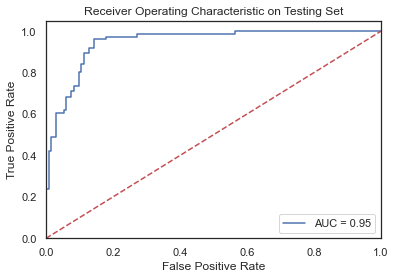

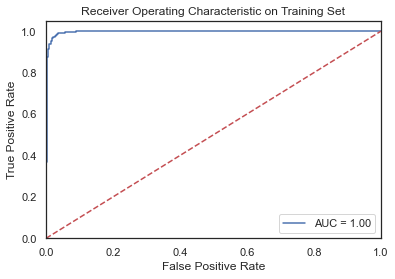

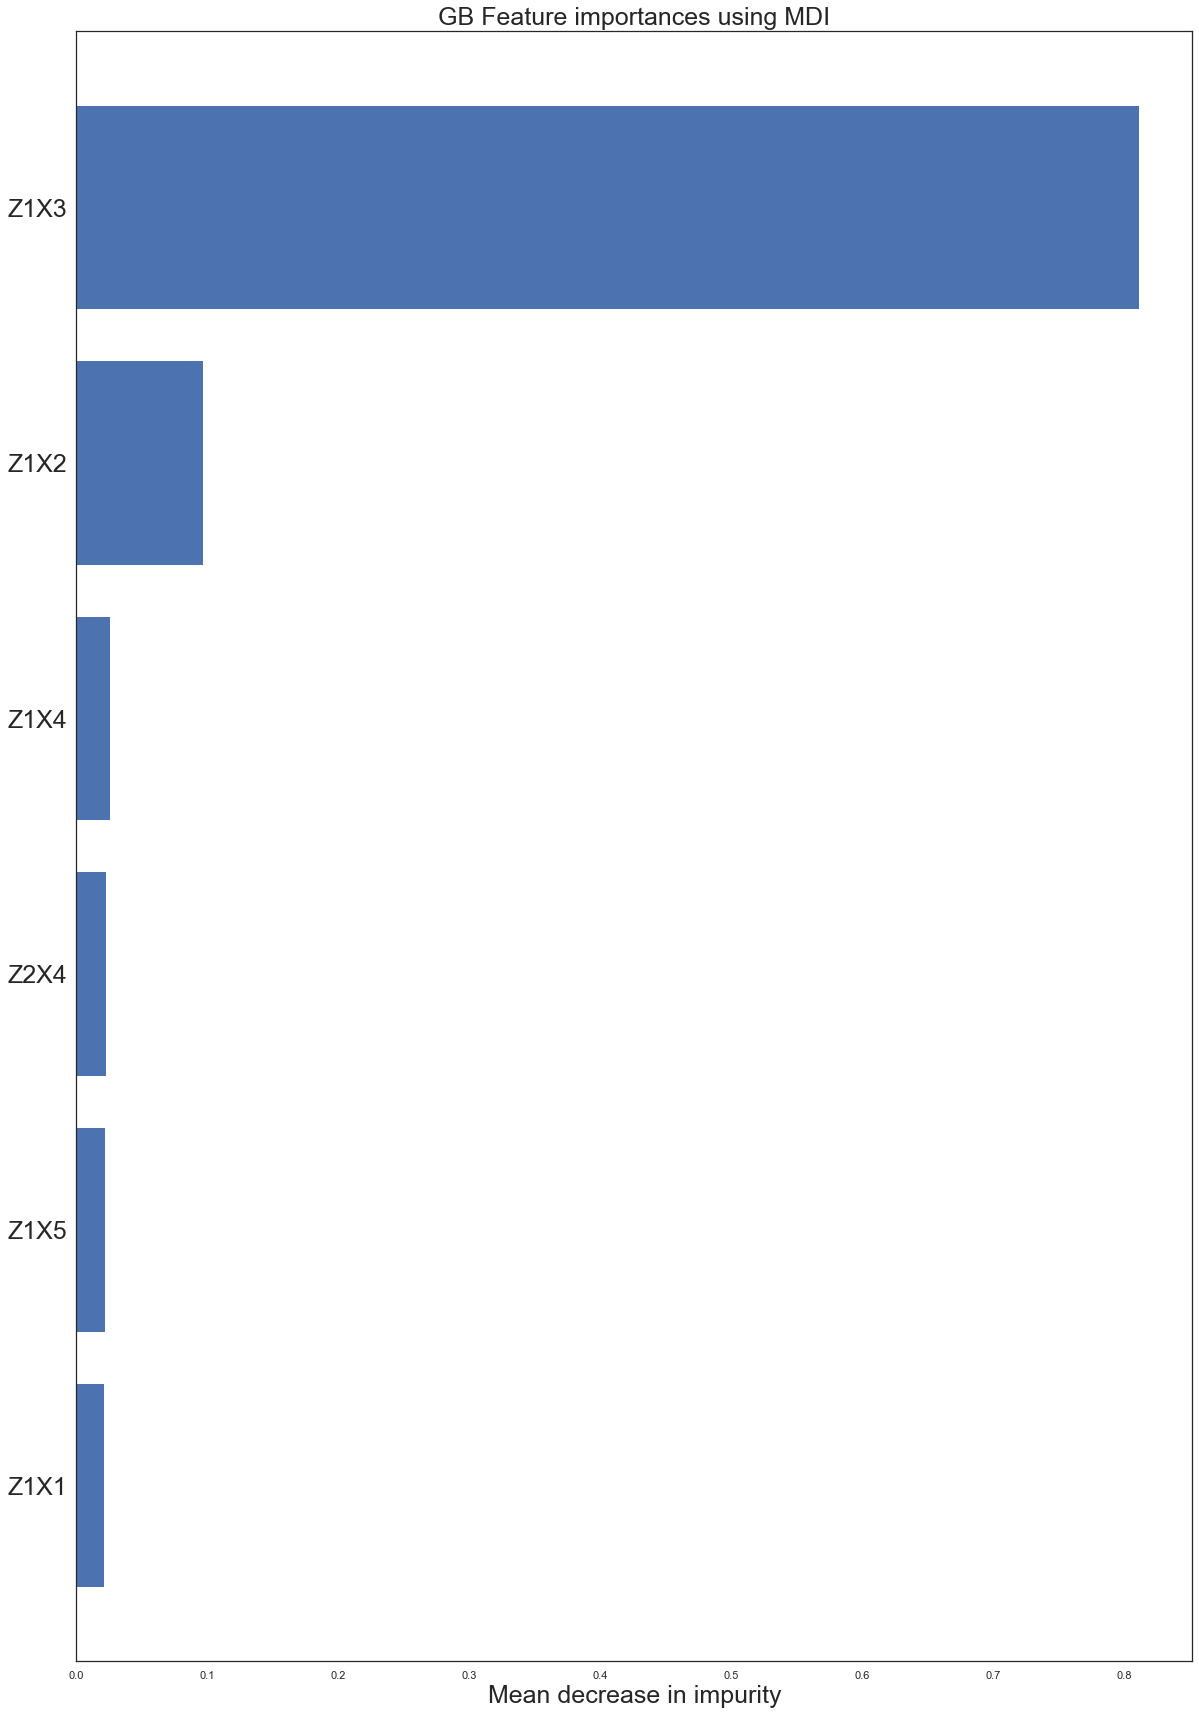

Parameter setting that give best result: <bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=10)>
----------------------------------------------------------
Default GB AUC on Testing Set: 0.9463791056588841
GB with tuning AUC on Training Set: 0.9967930029154519
----------------------------------------------------------
Default GB Accuracy on Testing Set: 0.8755980861244019
GB with tuning Accuracy on Training Set: 0.9735894357743097
----------------------------------------------------------
Default GB Confusion Matrix on Testing Set:
[[118  15]
 [ 11  65]]
Default GB Confusion Matrix on Training Set:
[[573  15]
 [  7 238]]
----------------------------------------------------------
Default GB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       133
           1       0.81      0.86      0.83        76

    accuracy                           0.88       209
   macro avg 

In [165]:
GB_for_Features(X4, 0.2, 634)

## (4) XG Boost

## Hyperparameter tuning

### Grid Search

In [168]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'subsample':[0.6, 0.8, 1.0],
           'colsample_bytree': [0.5, 0.7]}
xgbclf = XGBClassifier(**params)
clf = GridSearchCV(estimator=xgbclf, 
                   param_grid=params,
                   scoring='recall', 
                   verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Highest Recall: ", clf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 1.0}
Highest Recall:  0.9067307692307693


### Random Search

In [169]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.6, 1.0, 0.1),
           'colsample_bytree': np.arange(0.5, 1.0, 0.1)}
xgbclf = XGBClassifier(**params)
clf = RandomizedSearchCV(estimator=xgbclf,
                         param_distributions=params,
                         scoring='recall',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Highest Recall: ", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999}
Highest Recall:  0.8848557692307694


## Define sets of features

In [170]:
X1 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z1X4', 'Z1X5']]
y1 = data_all_features['true_distress']

X2 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z2X4', 'Z1X5']]
y2 = data_all_features['true_distress']

X3 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z2X4']]
y3 = data_all_features['true_distress']

X4 = data_all_features_scaled[['Z1X1', 'Z1X2', 'Z1X3', 'Z1X4', 'Z1X5', 'Z2X4']]
y4 = data_all_features['true_distress']

## Put features into machine

In [171]:
def XGB_for_Z_Features(X, test_size=0.20, random_state=634):
    RF=pd.concat([distress, X],axis=1)
    
    Train, Test = train_test_split(RF,
                                   test_size=test_size,
                                   random_state=random_state)

    X_train, y_train = Train.iloc[:,1:], Train.iloc[:,0]
    X_test, y_test = Test.iloc[:,1:], Test.iloc[:,0]
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    
    params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  
    'num_class': 10,               
    'gamma': 0.1, 
    'max_depth': 3,               
    'lambda': 2,                   
    'subsample': 0.8,              
    'colsample_bytree': 0.7,       
    'min_child_weight': 3,
#     'silent': 1,                   
    'eta': 0.01,                  
    'seed': 1000,
    'nthread': 4,                  
    'eval_metric':'auc'
    }
    plst = list(params.items())
    
    
    num_round = 10
    bst = xgb.train(plst, dtrain, num_round)
#     bst = xgb.train(plst, dtrain, num_round, evallist)

    # predict
    y_pred_XGB_test = bst.predict(dtest)
    y_pred_XGB_train = bst.predict(dtrain)
    
    #performance measures
    ## 1. Accuracy
    Accuracy_XGB_test = metrics.accuracy_score(y_test, y_pred_XGB_test)
    Accuracy_XGB_train = metrics.accuracy_score(y_train, y_pred_XGB_train)
    ## 2. confusion matrix
    CM_test = confusion_matrix(y_test, y_pred_XGB_test)
    CM_train = confusion_matrix(y_train, y_pred_XGB_train)
        # fit model 
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    ## 3. roc_auc
    preds_XGB_test = model.predict_proba(X_test)[:,1]
    preds_XGB_train = model.predict_proba(X_train)[:,1]
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, preds_XGB_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, preds_XGB_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    # 3-2 plot roc_auc
    plt.figure()
    plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    plt.figure()
    plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic on Training Set')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    ## 4. rmse
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_XGB_test))
    rmse_train =np.sqrt(mean_squared_error(y_train,y_pred_XGB_train)) 
    ## 5. classification report
    ClfRprt_test = classification_report(y_test, y_pred_XGB_test)
    ClfRprt_train = classification_report(y_train, y_pred_XGB_train)
 
    print("----------------------------------------------------------")
    print("Default XGB AUC on Testing Set:",roc_auc_test)
    print("Default XGB AUC on Training Set:",roc_auc_train)
    print("----------------------------------------------------------")
    print("Default XGB Accuracy on Testing Set:",Accuracy_XGB_test)
    print("Default XGB Accuracy on Training Set:",Accuracy_XGB_train)    
    print("----------------------------------------------------------")
    print("Default XGB Confusion Matrix on Testing Set:")
    print(CM_test)
    print("Default XGB Confusion Matrix on Training Set:")
    print(CM_train)
    print("----------------------------------------------------------")
    print("Default XGB Classification Reoport on Testing set:")
    print(ClfRprt_test)
    print("Default XGB Classification Reoport on Training set:")
    print(ClfRprt_train)
    print("----------------------------------------------------------")
    print("RMSE on Testing Set:", rmse_test)
    print("RMSE on Training Set:", rmse_train)
    

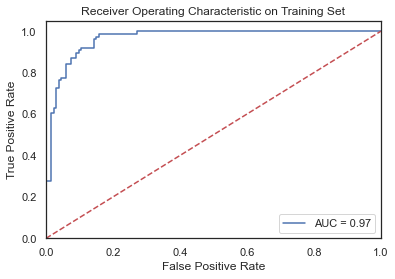

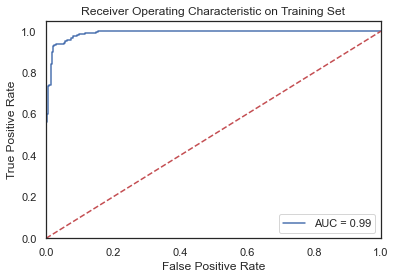

----------------------------------------------------------
Default XGB AUC on Testing Set: 0.9653739612188366
Default XGB AUC on Training Set: 0.9903651256420936
----------------------------------------------------------
Default XGB Accuracy on Testing Set: 0.8947368421052632
Default XGB Accuracy on Training Set: 0.9459783913565426
----------------------------------------------------------
Default XGB Confusion Matrix on Testing Set:
[[119  14]
 [  8  68]]
Default XGB Confusion Matrix on Training Set:
[[559  29]
 [ 16 229]]
----------------------------------------------------------
Default XGB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       133
           1       0.83      0.89      0.86        76

    accuracy                           0.89       209
   macro avg       0.88      0.89      0.89       209
weighted avg       0.90      0.89      0.90       209

Default XGB Classification Reopor

In [172]:
XGB_for_Z_Features(X, 0.2, 634)

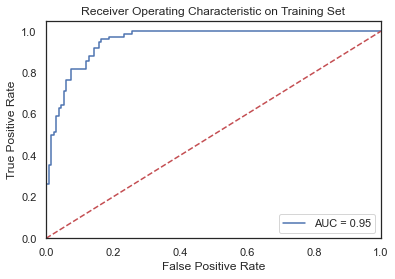

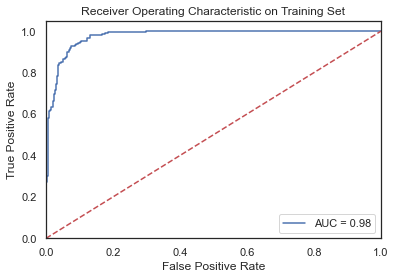

----------------------------------------------------------
Default XGB AUC on Testing Set: 0.952809655718243
Default XGB AUC on Training Set: 0.9765514369012911
----------------------------------------------------------
Default XGB Accuracy on Testing Set: 0.861244019138756
Default XGB Accuracy on Training Set: 0.9207683073229291
----------------------------------------------------------
Default XGB Confusion Matrix on Testing Set:
[[120  13]
 [ 16  60]]
Default XGB Confusion Matrix on Training Set:
[[555  33]
 [ 33 212]]
----------------------------------------------------------
Default XGB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       133
           1       0.82      0.79      0.81        76

    accuracy                           0.86       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.86      0.86      0.86       209

Default XGB Classification Reoport 

In [173]:
XGB_for_Z_Features(X1, 0.2, 634)

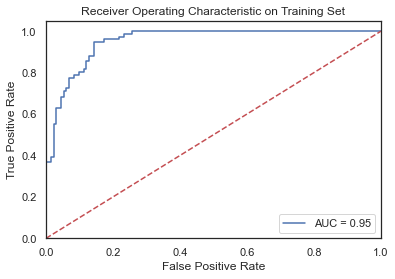

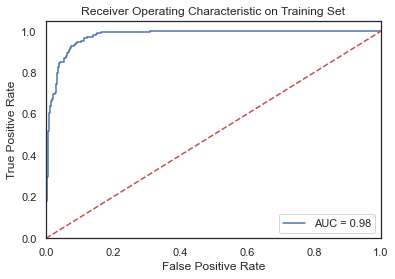

----------------------------------------------------------
Default XGB AUC on Testing Set: 0.9526117926394935
Default XGB AUC on Training Set: 0.9767388588088298
----------------------------------------------------------
Default XGB Accuracy on Testing Set: 0.861244019138756
Default XGB Accuracy on Training Set: 0.921968787515006
----------------------------------------------------------
Default XGB Confusion Matrix on Testing Set:
[[120  13]
 [ 16  60]]
Default XGB Confusion Matrix on Training Set:
[[556  32]
 [ 33 212]]
----------------------------------------------------------
Default XGB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       133
           1       0.82      0.79      0.81        76

    accuracy                           0.86       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.86      0.86      0.86       209

Default XGB Classification Reoport 

In [174]:
XGB_for_Z_Features(X2, 0.2, 634)

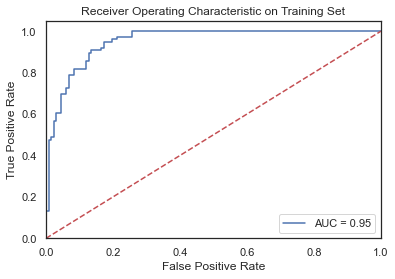

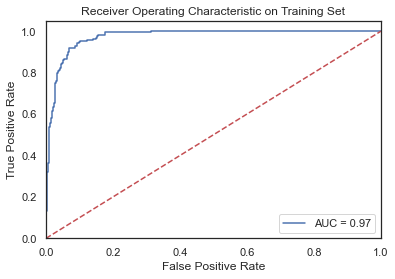

----------------------------------------------------------
Default XGB AUC on Testing Set: 0.9515235457063712
Default XGB AUC on Training Set: 0.9740385950298487
----------------------------------------------------------
Default XGB Accuracy on Testing Set: 0.8755980861244019
Default XGB Accuracy on Training Set: 0.9159663865546218
----------------------------------------------------------
Default XGB Confusion Matrix on Testing Set:
[[121  12]
 [ 14  62]]
Default XGB Confusion Matrix on Training Set:
[[556  32]
 [ 38 207]]
----------------------------------------------------------
Default XGB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       133
           1       0.84      0.82      0.83        76

    accuracy                           0.88       209
   macro avg       0.87      0.86      0.86       209
weighted avg       0.88      0.88      0.88       209

Default XGB Classification Reopor

In [175]:
XGB_for_Z_Features(X3, 0.2, 634)

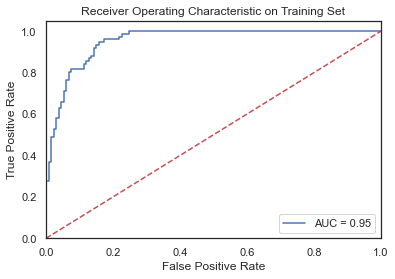

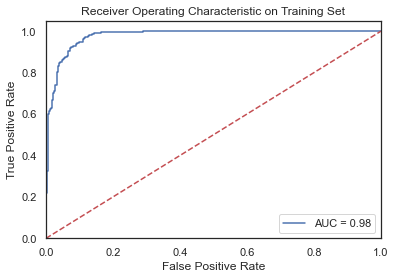

----------------------------------------------------------
Default XGB AUC on Testing Set: 0.9532053818757421
Default XGB AUC on Training Set: 0.9775718450645564
----------------------------------------------------------
Default XGB Accuracy on Testing Set: 0.861244019138756
Default XGB Accuracy on Training Set: 0.9195678271308524
----------------------------------------------------------
Default XGB Confusion Matrix on Testing Set:
[[118  15]
 [ 14  62]]
Default XGB Confusion Matrix on Training Set:
[[548  40]
 [ 27 218]]
----------------------------------------------------------
Default XGB Classification Reoport on Testing set:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       133
           1       0.81      0.82      0.81        76

    accuracy                           0.86       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.86      0.86      0.86       209

Default XGB Classification Reoport

In [176]:
XGB_for_Z_Features(X4, 0.2, 634)